In [252]:
 # Import all necessary libraries

In [253]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [254]:
 # Loading Previous Application data

In [255]:
pre_app=pd.read_csv('previous_application.csv')
pre_app.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   
5                        8  ...                  XNA         18.0   
6                       11  ...                  XNA          NaN   
7                        7  ...                  XNA          NaN   
8                       15  ...                  XNA          NaN   
9                       15  ...                  XNA          NaN   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   
5        low_normal          Cash X-Sell: low            365243.0   
6               XNA                      Cash                 NaN   
7               XNA                      Cash                 NaN   
8               XNA                      Cash                 NaN   
9               XNA                      Cash                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   
5         -654.0                    -144.0         -144.0           -137.0   
6            NaN                       NaN            NaN              NaN   
7            NaN                       NaN            NaN              NaN   
8            NaN                       NaN          

In [256]:
# check structure of all columns
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [257]:
pre_app.shape

(1670214, 37)

In [258]:
pre_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [259]:
# Checking Missing Values

In [260]:
pre_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [261]:
## checking percentage of missing values in each column 
missing_percentage_pre_app = 100*pre_app.isnull().sum()/len(pre_app)
missing_percentage_pre_app

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [262]:
##get the columns having missing value percentage more then 22 to a list
missing_percentage_pre_app_col=missing_percentage_pre_app[missing_percentage_pre_app>=22]
missing_percentage_pre_app_col

AMT_ANNUITY                  22.286665
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [263]:
#drop columns with percentage of missing value >22
pre_app=pre_app.drop(columns=missing_percentage_pre_app_col.index)

##validating the shape after dropping the columns
pre_app.shape

(1670214, 23)

In [264]:
##check the structure of the column
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

In [265]:
##observe the values of 'NAME_CASH_LOAN_PURPOSE' column
pre_app.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True) 

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

In [266]:
##observe the values of 'CODE_REJECT_REASON' column
pre_app.CODE_REJECT_REASON.value_counts(normalize=True)  


XAP       0.810132
HC        0.104915
LIMIT     0.033337
SCO       0.022432
CLIENT    0.015828
SCOFR     0.007670
XNA       0.003140
VERIF     0.002116
SYSTEM    0.000429
Name: CODE_REJECT_REASON, dtype: float64

In [267]:
##observe the values of 'NAME_GOODS_CATEGORY' column
pre_app.NAME_GOODS_CATEGORY.value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [268]:
## In above three columns percentage of XNA / XPA values is more than 50% so drop following columns

  ###NAME_CASH_LOAN_PURPOSE
  ###CODE_REJECT_REASON
  ###NAME_GOODS_CATEGORY

In [269]:
##drop the above columns
drop_columns_1 =['NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON','NAME_GOODS_CATEGORY']
pre_app=pre_app.drop(columns=drop_columns_1)
pre_app.shape

(1670214, 20)

In [270]:
## drop following columns as these are none of use

drop_columns_2 = [
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE',
    'CHANNEL_TYPE',
    'SELLERPLACE_AREA',
    'NAME_SELLER_INDUSTRY',
    'PRODUCT_COMBINATION']
pre_app=pre_app.drop(columns=drop_columns_2)
pre_app.shape

(1670214, 12)

In [271]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  \
0                           Y                       1             Approved   
1                           Y                       1             Approved   
2                           Y                       1             Approved   
3                           Y                       1             Approved   
4                           Y                       1              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE NAME_CLIENT_TYPE NAME_YIELD_GROUP  
0            -73  Cash through the bank         Repeater           middle  
1           -164                    XNA         Repeater       low_action  
2           -301  Cash through the bank         Repeater             high  
3           -512  Cash through the bank         Repeater           middle  
4           -781  Cash through the bank         Repeater             high

In [272]:
## check the value counts of each category / object column 
##validate the value counts of FLAG_LAST_APPL_PER_CONTRACT
pre_app.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [273]:
##validate the value counts of NAME_CONTRACT_TYPE
pre_app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [274]:
## XNA values are present in this column 
## remove the rows where category = XNA
pre_app = pre_app[(pre_app.NAME_CONTRACT_TYPE != 'XNA')]


In [275]:
##check the value counts of NAME_CONTRACT_TYPE again
pre_app.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [276]:
## observe the value counts of NAME_CLIENT_TYPE   
pre_app.NAME_CLIENT_TYPE.value_counts()

Repeater     1230960
New           301342
Refreshed     135625
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [277]:
## XNA values are present in this column 
## remove the rows where category = XNA

pre_app = pre_app[(pre_app.NAME_CLIENT_TYPE != 'XNA')]

##check the value counts of NAME_CLIENT_TYPE again

pre_app.NAME_CLIENT_TYPE.value_counts()

Repeater     1230960
New           301342
Refreshed     135625
Name: NAME_CLIENT_TYPE, dtype: int64

In [278]:
##observe the value counts of NAME_PAYMENT_TYPE  
pre_app["NAME_PAYMENT_TYPE"].value_counts(normalize=True)

Cash through the bank                        0.619248
XNA                                          0.375192
Non-cash from your account                   0.004909
Cashless from the account of the employer    0.000651
Name: NAME_PAYMENT_TYPE, dtype: float64

In [279]:
## drop this column for the further analysis
pre_app=pre_app.drop(columns=['NAME_PAYMENT_TYPE'])
pre_app.shape

(1667927, 11)

In [280]:
##observe the value counts of NAME_YIELD_GROUP   
pre_app.NAME_YIELD_GROUP.value_counts(normalize=True)

XNA           0.309201
middle        0.230957
high          0.211796
low_normal    0.192918
low_action    0.055127
Name: NAME_YIELD_GROUP, dtype: float64

In [281]:
## NAME_YIELD_GROUP column has around 30% XNA values 
## drop this column for the further analysis

pre_app=pre_app.drop(columns=['NAME_YIELD_GROUP'])
pre_app.shape

(1667927, 10)

In [282]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  \
0                           Y                       1             Approved   
1                           Y                       1             Approved   
2                           Y                       1             Approved   
3                           Y                       1             Approved   
4                           Y                       1              Refused   

   DAYS_DECISION NAME_CLIENT_TYPE  
0            -73         Repeater  
1           -164         Repeater  
2           -301         Repeater  
3           -512         Repeater  
4           -781         Repeater

In [283]:
###now we will analyse numerical columns 
pre_app.DAYS_DECISION

0           -73
1          -164
2          -301
3          -512
4          -781
           ... 
1670209    -544
1670210   -1694
1670211   -1488
1670212   -1185
1670213   -1193
Name: DAYS_DECISION, Length: 1667927, dtype: int64

In [284]:
## Days can not be negative so we will convert it to positive integer
## Also we will convert days to years for better understsnding

pre_app['DAYS_DECISION'] = pre_app['DAYS_DECISION'].abs()
pre_app['YEARS_DECISION']=pre_app.DAYS_DECISION/ 365


In [285]:
## According to the above observation we can ignore days decision columns 

pre_app=pre_app.drop(columns=['DAYS_DECISION'])
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667927 entries, 0 to 1670213
Data columns (total 10 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1667927 non-null  int64  
 1   SK_ID_CURR                   1667927 non-null  int64  
 2   NAME_CONTRACT_TYPE           1667927 non-null  object 
 3   AMT_APPLICATION              1667927 non-null  float64
 4   AMT_CREDIT                   1667926 non-null  float64
 5   FLAG_LAST_APPL_PER_CONTRACT  1667927 non-null  object 
 6   NFLAG_LAST_APPL_IN_DAY       1667927 non-null  int64  
 7   NAME_CONTRACT_STATUS         1667927 non-null  object 
 8   NAME_CLIENT_TYPE             1667927 non-null  object 
 9   YEARS_DECISION               1667927 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 140.0+ MB


In [286]:
##NFLAG_LAST_APPL_IN_DAY column can be ignored 

pre_app=pre_app.drop(columns=['NFLAG_LAST_APPL_IN_DAY'])
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667927 entries, 0 to 1670213
Data columns (total 9 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1667927 non-null  int64  
 1   SK_ID_CURR                   1667927 non-null  int64  
 2   NAME_CONTRACT_TYPE           1667927 non-null  object 
 3   AMT_APPLICATION              1667927 non-null  float64
 4   AMT_CREDIT                   1667926 non-null  float64
 5   FLAG_LAST_APPL_PER_CONTRACT  1667927 non-null  object 
 6   NAME_CONTRACT_STATUS         1667927 non-null  object 
 7   NAME_CLIENT_TYPE             1667927 non-null  object 
 8   YEARS_DECISION               1667927 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 127.3+ MB


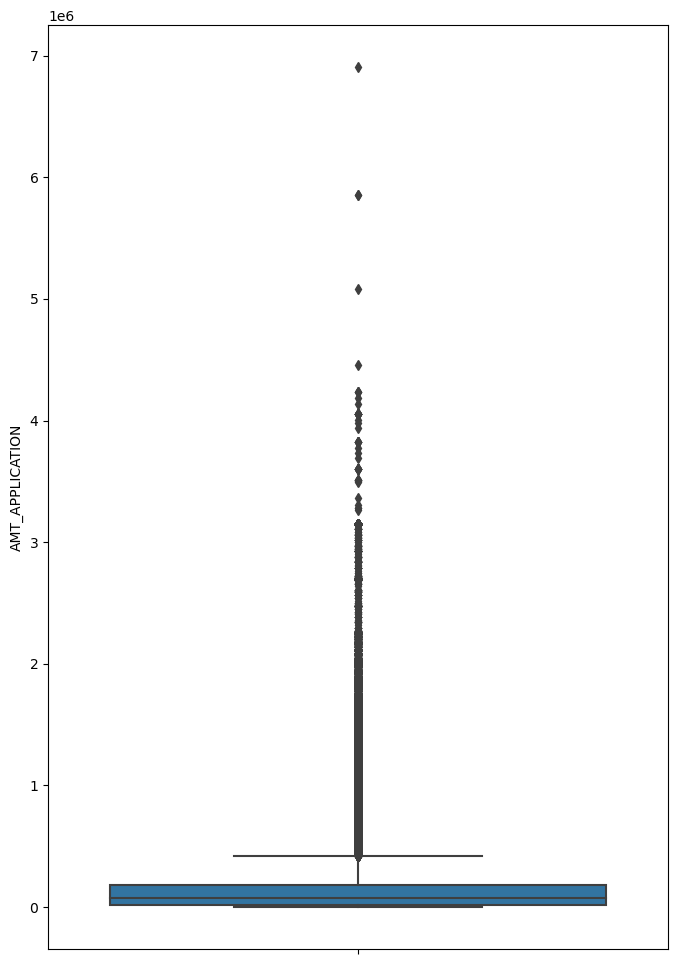

In [287]:
# Now We will check outliers

## plot box plot of AMT_APPLICATION to check outliers

plt.figure(figsize = (8,12))
sns.boxplot( y=pre_app['AMT_APPLICATION'])
plt.show()

In [288]:
## According to the above grapg there are many customers having AMT_APPLICATION <0 ,
## so we can drop rows where AMT_APPLICATION value is less than zero

In [289]:
pre_app.shape

(1667927, 9)

In [290]:
## consider the values which are having AMT_APPLICATION>0

pre_app = pre_app[(pre_app.AMT_APPLICATION > 0)]
pre_app.shape

(1276876, 9)

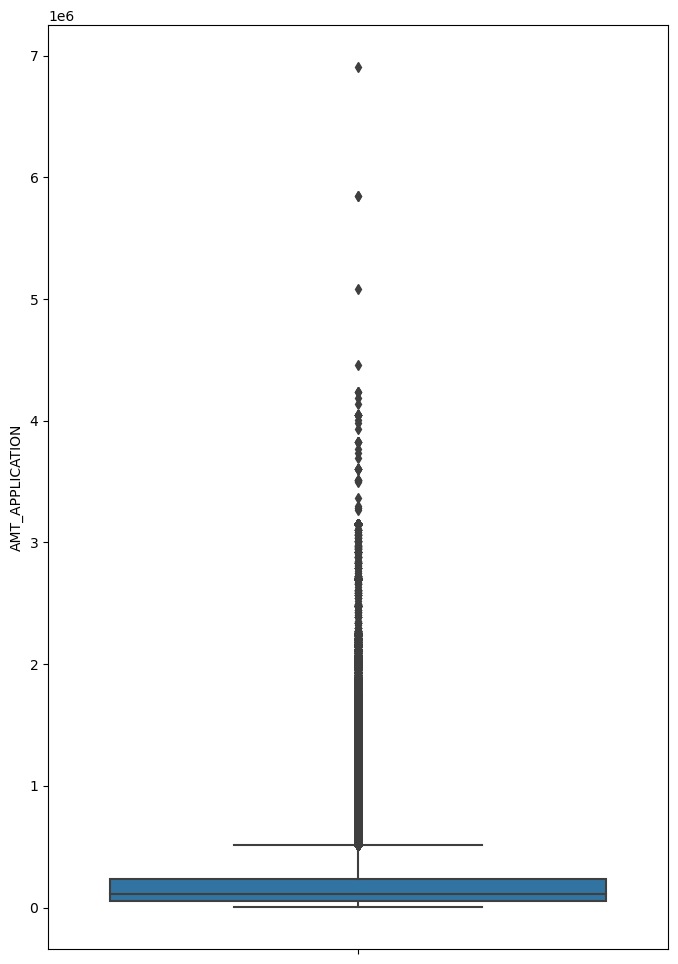

In [291]:
## plot box plot of AMT_APPLICATION to check outliers
plt.figure(figsize = (8,12))
sns.boxplot( y=pre_app['AMT_APPLICATION'])
plt.show()

In [292]:
## There are outliers present in the above box plot 
## we will remove these outliers and consider the values AMT_APPLICATION<=M (3 million)

pre_app = pre_app[(pre_app.AMT_APPLICATION < 3*pow(10,6))]
pre_app.shape

(1276392, 9)

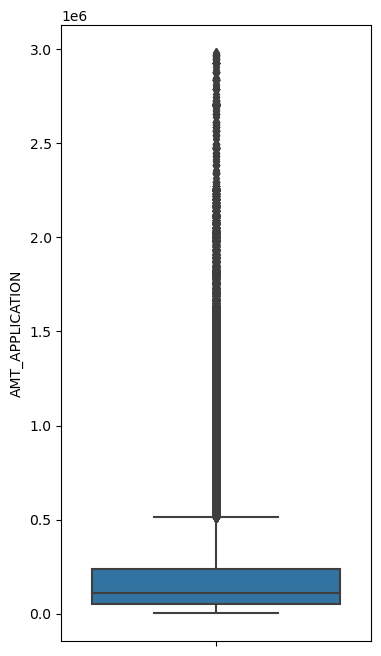

In [293]:
## Again boxplot to validate outliers

plt.figure(figsize = (4,8))
sns.boxplot( y=pre_app['AMT_APPLICATION'])
plt.show()

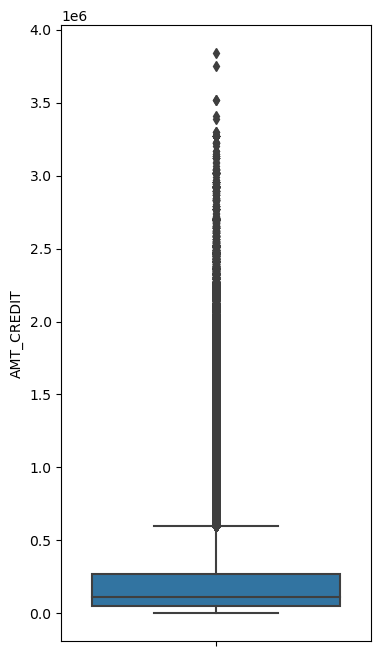

In [294]:
## plot box plot of AMT_CREDIT to check outliers

plt.figure(figsize = (4,8))
sns.boxplot( y=pre_app['AMT_CREDIT'])
plt.show()

In [295]:
# There are outliers present in the above box plot 
## we will remove these outliers and consider the values AMT_CREDIT<=3M (million)

pre_app = pre_app[(pre_app.AMT_CREDIT < 3*pow(10,6))]
pre_app.shape

(1276221, 9)

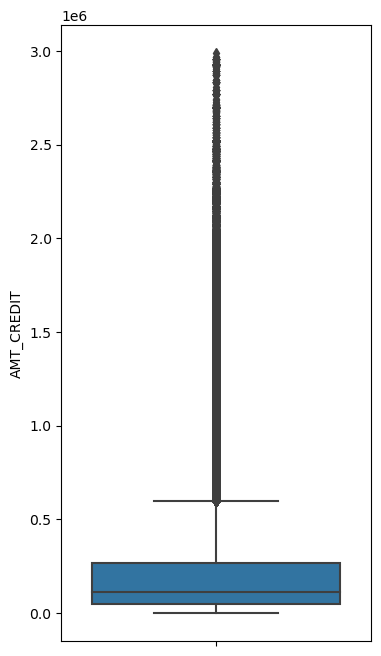

In [296]:
## plot box plot of AMT_CREDIT to check outliers

plt.figure(figsize = (4,8))
sns.boxplot( y=pre_app['AMT_CREDIT'])
plt.show()

In [297]:
# Univariate Analysis

## We wiil start with Analysis of Categorical Variables

In [298]:
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276221 entries, 0 to 1670213
Data columns (total 9 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1276221 non-null  int64  
 1   SK_ID_CURR                   1276221 non-null  int64  
 2   NAME_CONTRACT_TYPE           1276221 non-null  object 
 3   AMT_APPLICATION              1276221 non-null  float64
 4   AMT_CREDIT                   1276221 non-null  float64
 5   FLAG_LAST_APPL_PER_CONTRACT  1276221 non-null  object 
 6   NAME_CONTRACT_STATUS         1276221 non-null  object 
 7   NAME_CLIENT_TYPE             1276221 non-null  object 
 8   YEARS_DECISION               1276221 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 97.4+ MB


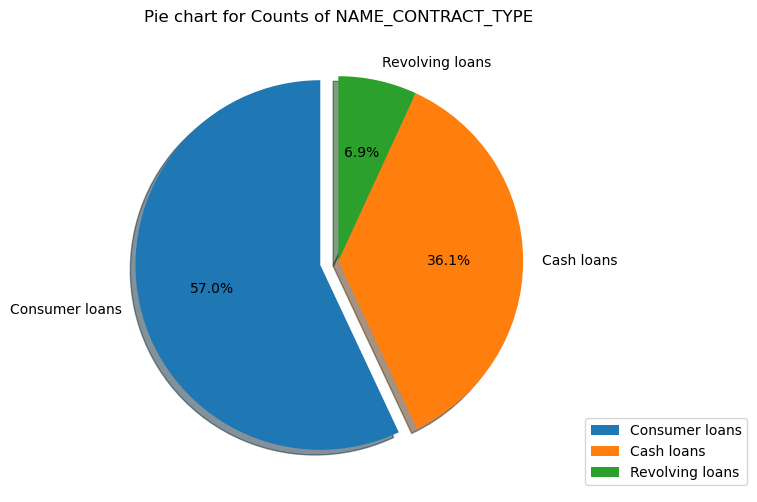

In [299]:
## plot the pie chart of NAME_CONTRACT_TYPE

plt.figure(figsize=[8,6])

contract_type = pre_app["NAME_CONTRACT_TYPE"].value_counts()

explode = (0.1, 0, 0)
contract_type.plot.pie( explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90 ,title='Pie chart for Counts of NAME_CONTRACT_TYPE')

#plt.set_title('Pie chart for Counts of NAME_CONTRACT_TYPE')

plt.ylabel('')
plt.legend(loc='lower right',bbox_to_anchor=(1.4,0));

In [300]:
## Observation of NAME_CONTRACT_TYPE column from above distribution
   ### 36 % of clients demanding for cash loans heighest percentage of contract type
     ### Only 7 % clients having Revolving loans lowest percentage of contract type
       ### 21% of difference is there between Cash loans and Consumer loans

In [301]:
## Analysis of NAME_CONTRACT_STATUS column

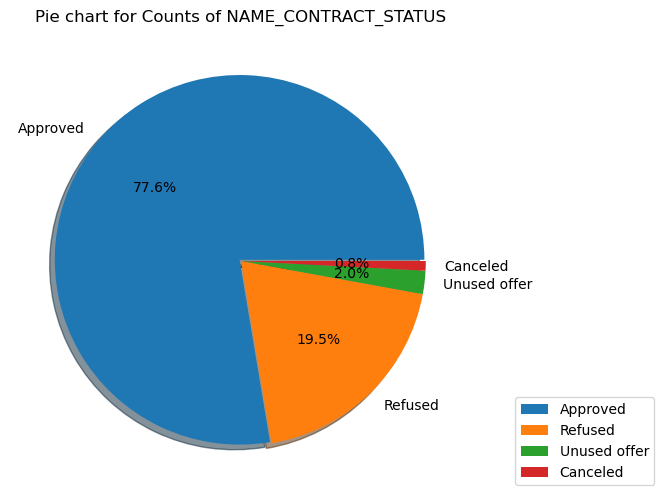

In [302]:
##plot the pie chart of NAME_CONTRACT_STATUS
plt.figure(figsize=[8,6])


contract_status = pre_app["NAME_CONTRACT_STATUS"].value_counts()

explode = (0.01, 0, 0,0)
contract_status.plot.pie( explode=explode,autopct='%1.1f%%',
        shadow=True ,title='Pie chart for Counts of NAME_CONTRACT_STATUS')

#plt.set_title('Pie chart for Counts of NAME_CONTRACT_TYPE')

plt.ylabel('')
plt.legend(loc='lower right',bbox_to_anchor=(1.41,0));

In [303]:
## observation of NAME_CONTRACT_STATUS column from above distribution
  ###From the available data 77.6 % loans has been approved
    ###2 % of clients consists of unused offer
      ###There is very less i.e 1.2% difference between the clients who canceled and refused loans

In [304]:
# Analysis of NAME_CLIENT_TYPE column

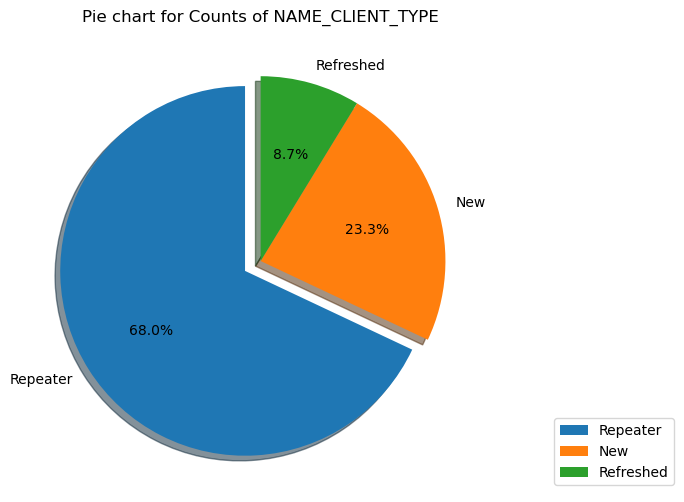

In [305]:
##plot the pie chart of NAME_CLIENT_TYPE
client_type = pre_app["NAME_CLIENT_TYPE"].value_counts()
plt.figure(figsize=[8,6])

explode = (0.1, 0, 0)
client_type.plot.pie( explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90 ,title='Pie chart for Counts of NAME_CLIENT_TYPE')
#plt.set_title('Pie chart for Counts of NAME_CONTRACT_TYPE')
plt.ylabel('')
plt.legend(loc='lower right',bbox_to_anchor=(1.41,0))
plt.show()

In [306]:
# Observation of NAME_CLIENT_TYPE column from above distribution
   ##Highest percentage of clients are repeater clients which is 68%
     ##8.7% of clients are refresher, lowest percentage of the data
       ##23.3% of new clients are available according to data

In [307]:
# Analysis of Numerical Variables

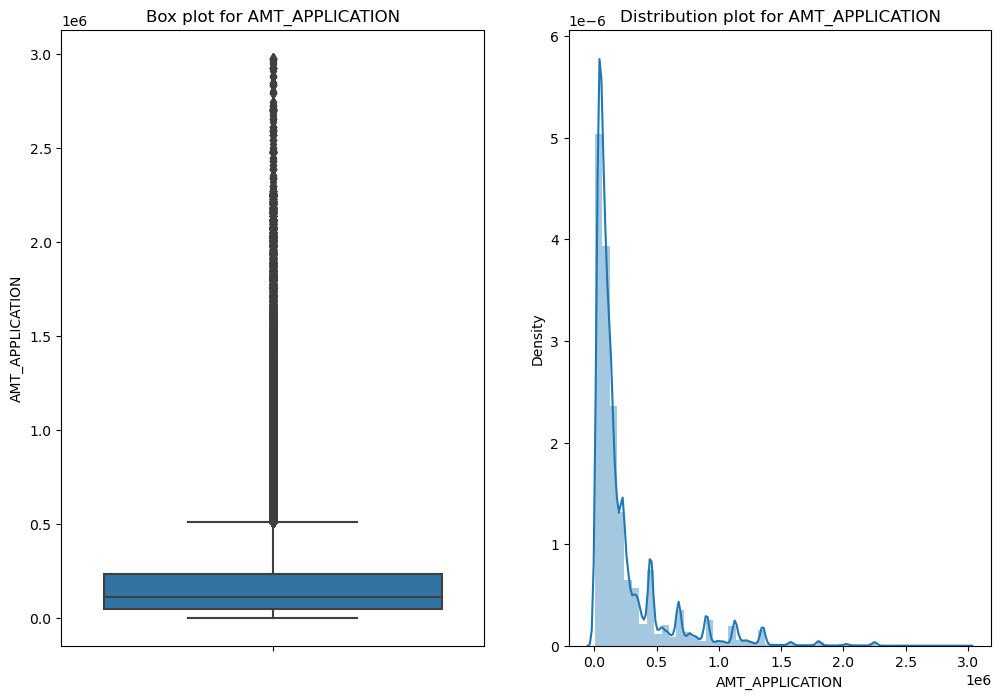

In [308]:
##plot box plot of AMT_ANNUITY column to check if any outlier is present

fig, ax = plt.subplots(1, 2, figsize=(12,8))
sns.boxplot( y=pre_app['AMT_APPLICATION'],ax=ax[0])
ax[0].set_title('Box plot for AMT_APPLICATION')

sns.distplot(pre_app.AMT_APPLICATION,ax=ax[1])
ax[1].set_title('Distribution plot for AMT_APPLICATION')
plt.show()

In [309]:
# observation of AMT_APPLICATION column from above distribution
## In the box plot quartile is present at 0.1M
## Majority value lies between 0.1 to 0.3 M

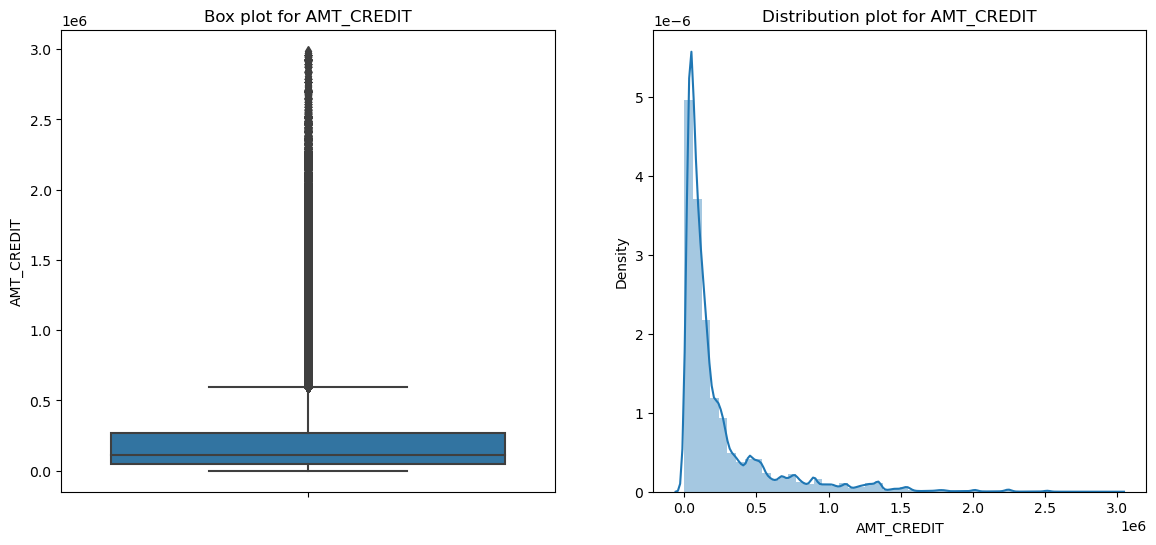

In [310]:
##plot box plot of AMT_CREDIT column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot( y=pre_app['AMT_CREDIT'],ax=ax[0])
ax[0].set_title('Box plot for AMT_CREDIT')

sns.distplot(pre_app.AMT_CREDIT,ax=ax[1])
ax[1].set_title('Distribution plot for AMT_CREDIT')
plt.show()

In [311]:
#Observation of AMT_CREDIT column from above distribution
##In the box plot quartile is present at 0.1 million
##Majority value lies between 0.1 to 0.3 million

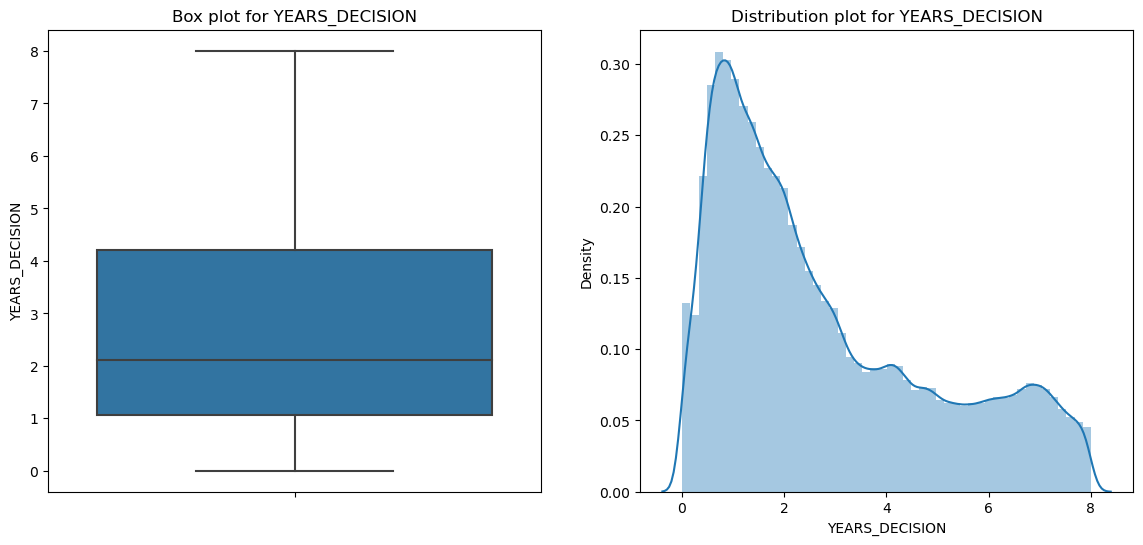

In [312]:
##plot box plot of YEARS_DECISION column to check if any outlier is present

fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot( y=pre_app['YEARS_DECISION'],ax=ax[0])
ax[0].set_title('Box plot for YEARS_DECISION')

sns.distplot(pre_app.YEARS_DECISION,ax=ax[1])
ax[1].set_title('Distribution plot for YEARS_DECISION')
plt.show()


In [313]:
# Observation of YEARS_DECISION column from above distribution
#Maximun clients take 1 to 4.3 years to take decision
#In box plot quartile is present at 2.1 years
#75% of data is covered between 0 to 4 years

In [314]:
# Bivariate Analysis

In [315]:
##get all numerical columns in a list

num_columns1= ['AMT_APPLICATION','AMT_CREDIT', 'YEARS_DECISION']
num_columns1

['AMT_APPLICATION', 'AMT_CREDIT', 'YEARS_DECISION']

<Figure size 800x600 with 0 Axes>

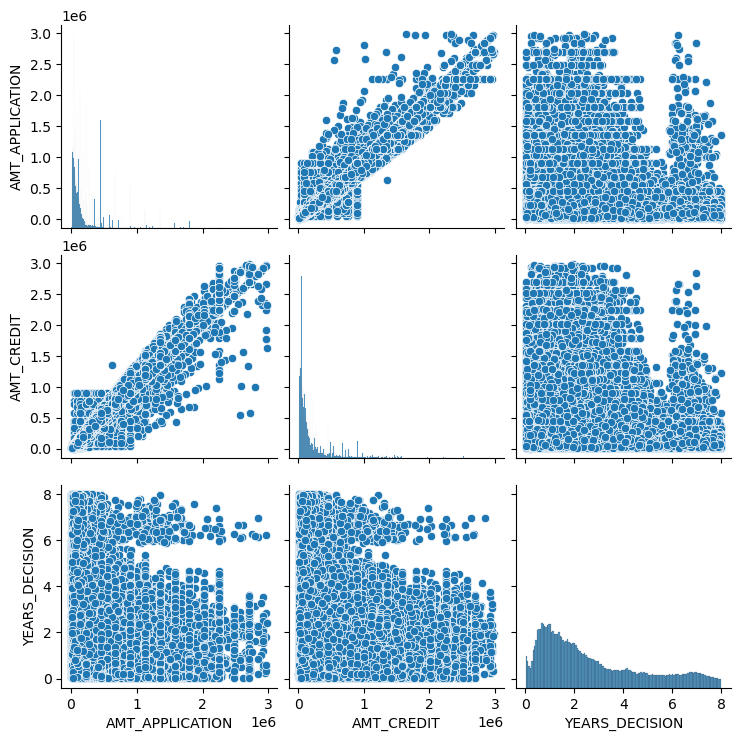

In [316]:
### pair plot of all numerical columns that mentioned above

plt.figure(figsize=[8,6])
plot_pair=pre_app[num_columns1]
sns.pairplot(plot_pair)
plt.show()

In [317]:
##Observation of YEARS_DECISION column from above distribution
   ## application amount and credit amount is showing linear relationship
    ##There is no correlation is observed from above distribution

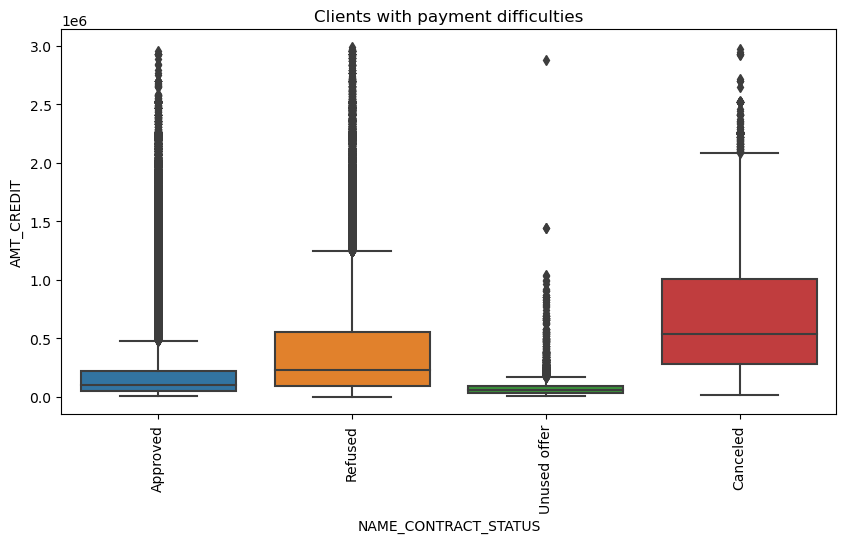

In [318]:
###plot the Distributions for 'AMT_CREDIT' vs 'NAME_CONTRACT_STATUS'

plt.figure(figsize=(10,5)) 

ax = sns.boxplot(data=pre_app,y='AMT_CREDIT',x='NAME_CONTRACT_STATUS')
plt.title('Clients with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [319]:
##Observations of above Distribution:
   ##Cancelled category have heighest quartile
     ##Outliers are present in each category
      ##Quartile of category Unused offer is lowest

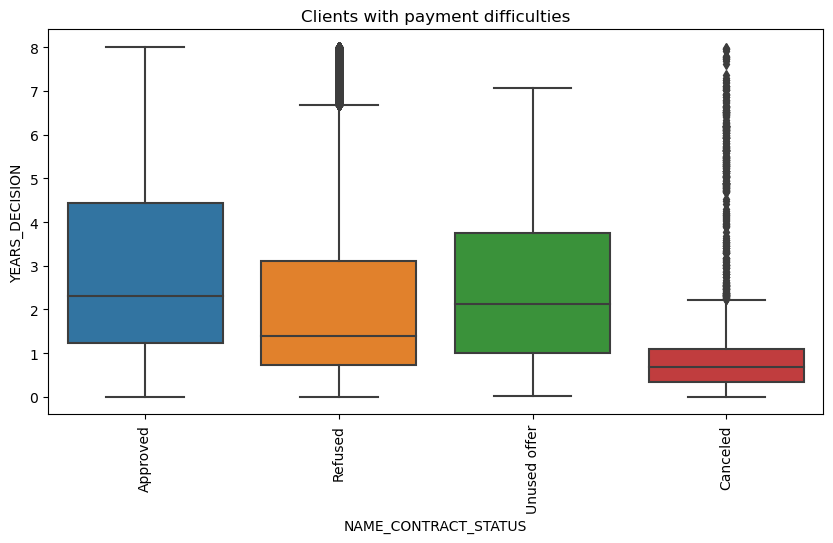

In [320]:
###plot the Distributions for ''YEARS_DECISION' vs 'NAME_CONTRACT_STATUS'

plt.figure(figsize=(10,5)) 

ax = sns.boxplot(data=pre_app,y='YEARS_DECISION',x='NAME_CONTRACT_STATUS')
plt.title('Clients with payment difficulties')
plt.xticks(rotation=90)
plt.show()

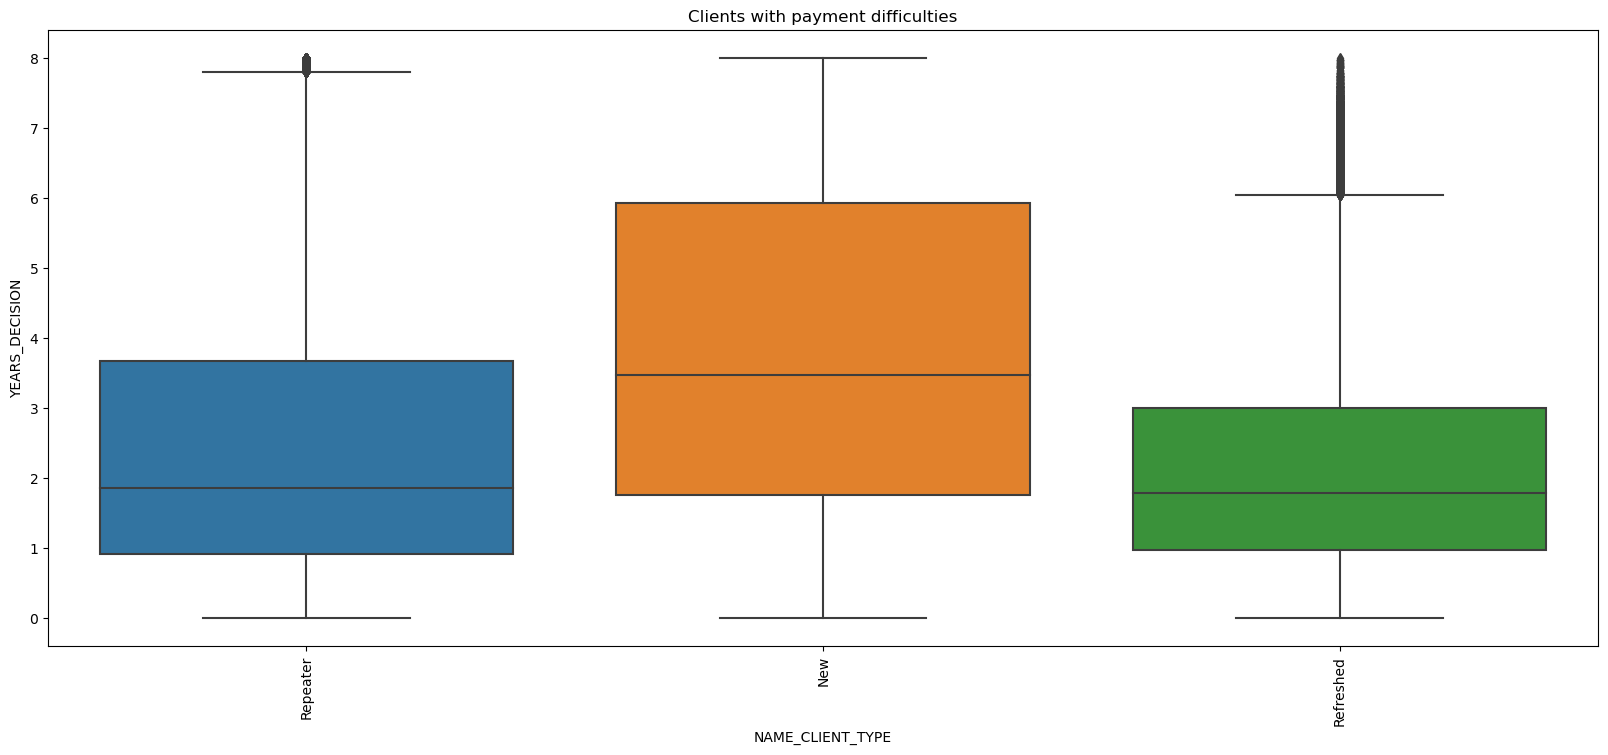

In [321]:
###plot the Distributions for ''YEARS_DECISION' vs 'NAME_CLIENT_TYPE'
plt.figure(figsize=(20,8)) 

ax = sns.boxplot(data=pre_app,y='YEARS_DECISION',x='NAME_CLIENT_TYPE')
plt.title('Clients with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [322]:
##Observation of above Distribution
    ###Outliers are not present for new clients
      ### median for Repeater and Refreshed clients is approximately same
        ### Average years to take decision is more for new clients as compared with refreshed and repeater clients

In [323]:
## Analysis for Categorical- Categorical Variables


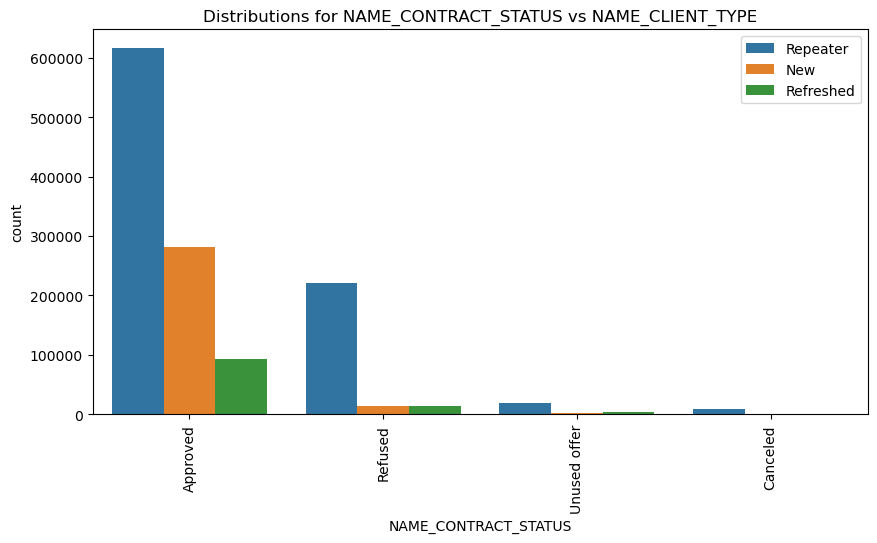

In [324]:
##plot the distribution for 'NAME_CLIENT_TYPE' vs 'NAME_CONTRACT_STATUS'
plt.figure(figsize=(10,5)) 

ax = sns.countplot(data=pre_app,x='NAME_CONTRACT_STATUS',hue='NAME_CLIENT_TYPE')
plt.title('Distributions for NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE')
plt.xticks(rotation=90)
plt.legend(loc='best');

In [325]:
## Observation of above Distribution
      
        ### New and Refreshed clients has not cancelled loan as value count is not present for unused and cancelled category
          ### Value counts of New and Refreshed clients is same for Refused category
            ### Approved rate is much higher in Repeater clients as compared to New and Refreshed clients

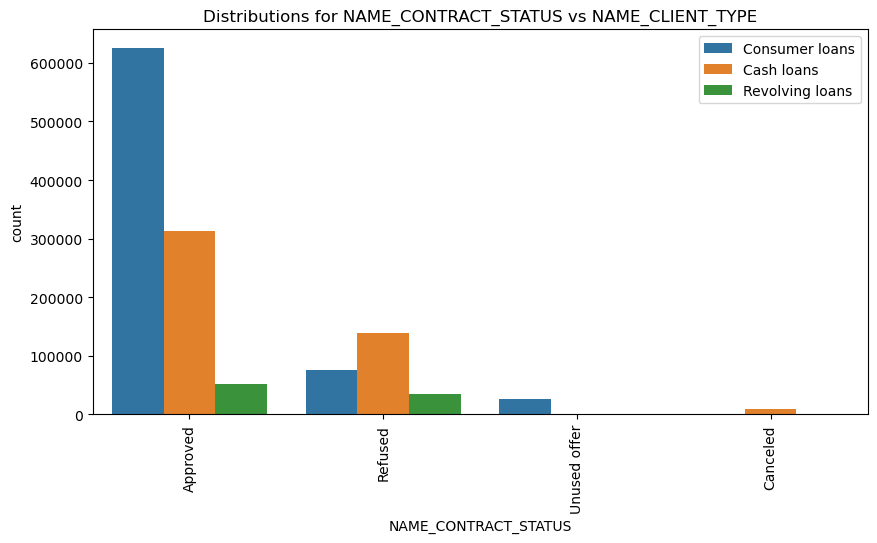

In [326]:
##plot the distribution for 'NAME_CONTRACT_TYPE' vs 'NAME_CONTRACT_STATUS'
plt.figure(figsize=(10,5)) 
ax = sns.countplot(data=pre_app,x='NAME_CONTRACT_STATUS',hue='NAME_CONTRACT_TYPE')
plt.title('Distributions for NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE')
plt.xticks(rotation=90)
plt.legend(loc='best');

In [327]:
##Observation of above Distribution
   ###There is no correlation between Cancelled category vs Consumer loan and Cancelled category vs Revolving loans
    ###Highest number of consumer loans has been apporved
     ###There is no correlation between Unused offer vs Cash loan and Unused offer vs Revolving loans
      ###More number of clients Refused cash loans as compared with Revolving and Consumer loans



In [328]:
#Now Loading Application Data & Cleaning It


In [329]:
app_data = pd.read_csv("application_data.csv")
app_data.head(10)



SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
6  ...                 0                0                0                0   
7  ...                 0                0                0                0   
8  ...                 0                0                0                0   
9  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                        0.0                       0.0   
8                        0.0                       0.0   
9                        NaN                       NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0         

In [330]:
#Invistigating input file i.e Checking structure and metadata of data

In [331]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [332]:
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [333]:
# Checking Misssing Values

In [334]:
app_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [335]:
## checking percentage of missing values for each column 
app_data_missing_percentage = 100*app_data.isnull().sum()/len(app_data)


In [336]:
##get the columns having missing value percentage more then 40 to a list
app_data_missing_percentage[app_data_missing_percentage>=40]

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [337]:
## create list of columns with missing value percentage >40
app_data_missing_percentage_col=app_data_missing_percentage[app_data_missing_percentage>=45]
app_data_missing_percentage_col

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [338]:
#drop columns with percentage of missing value >40
app_data_1=app_data.drop(columns=app_data_missing_percentage_col.index)


In [339]:
##validating the shape after dropping the columns
app_data_1.shape

(307511, 73)

In [340]:
## again check for missing data and its percentage
app_data_1.isna().sum()
app_data_missing_percentage_1=100*app_data_1.isnull().sum()/len(app_data)
app_data_missing_percentage_1[app_data_missing_percentage_1>=40] 

Series([], dtype: float64)

In [341]:
##validate missing value percentage
100*app_data_1.isnull().sum()/len(app_data)

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

In [342]:
# observe columns having missing value percentage >30
app_data_missing_percentage_1[app_data_missing_percentage_1>=30] 

OCCUPATION_TYPE    31.345545
dtype: float64

In [343]:
# Since occupation_type is imp fatcor to find out customer
# will be able to repay the loan or not. Hence analysing it and handling missing values for the same is also imp


In [344]:
## Observe value counts of OCCUPATION_TYPE column
app_data_1.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [345]:
##Checking missing values of Occupation type column
app_data_1.OCCUPATION_TYPE.isna().sum()

96391

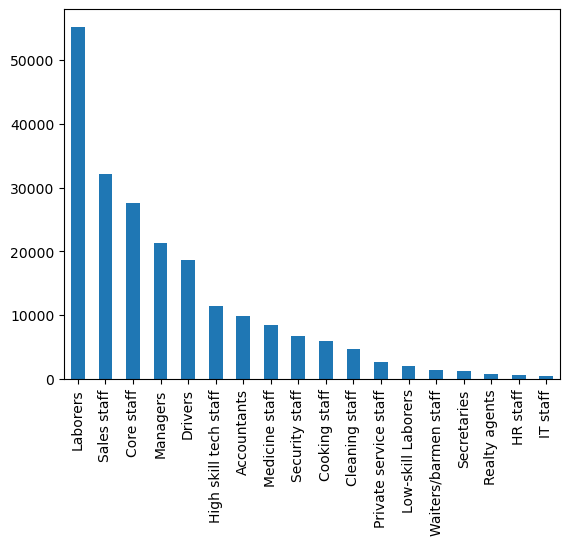

In [346]:
## plot the bar plot for all the occupation and observe the graph
app_data_1['OCCUPATION_TYPE'].value_counts().plot(kind='bar');

In [347]:
# Observation:
    
     ##Reality agents, HR staff, IT staff are the lowest among all occupation types
        ##Laborers is having heighest categaory for occupation.

In [348]:
# As we can see, missing value is so high, but we can not drop it as it will impact on our analysis. 
# so we are creating new column as 'unknown' for storing the missing value.


In [349]:
app_data_1['OCCUPATION_TYPE']=app_data_1['OCCUPATION_TYPE'].fillna('Unknown')
app_data_2=app_data_1
app_data_2.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

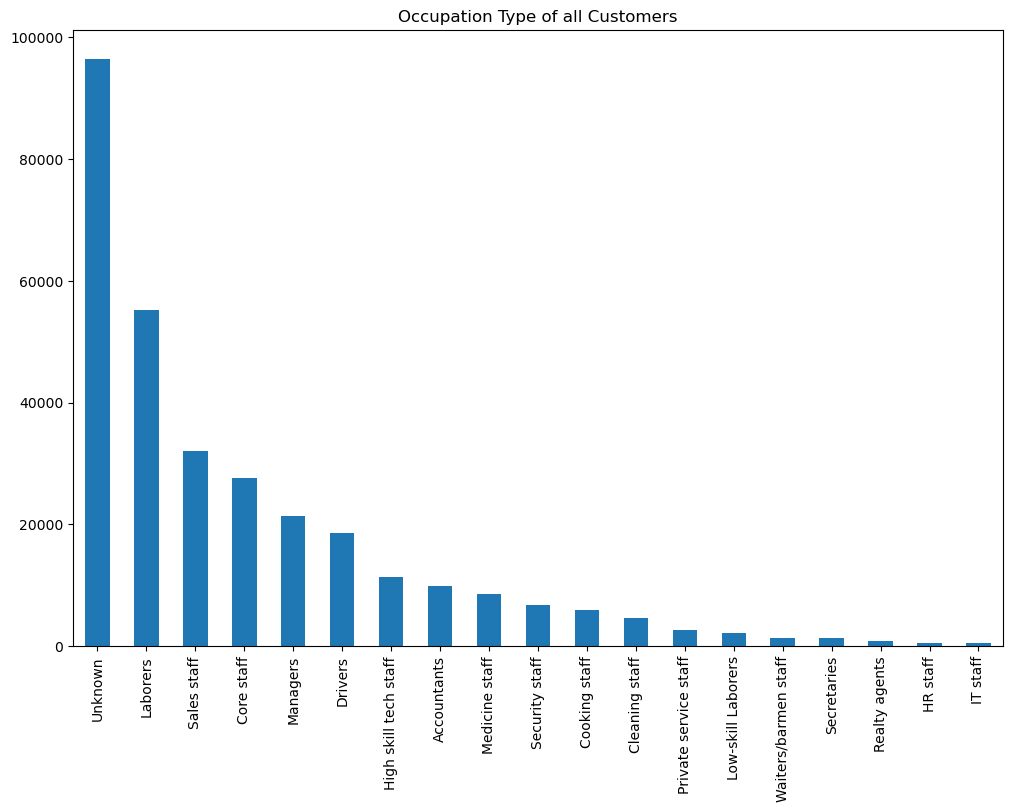

In [350]:
# Ploting occupation type 
plt.figure(figsize=[12,8])
OCCUPATION_TYPE1 = app_data_2.OCCUPATION_TYPE.value_counts()
graph = OCCUPATION_TYPE1.plot.bar()
graph.set_title("Occupation Type of all Customers")
plt.show()


In [351]:
app_data_2.shape

(307511, 73)

In [352]:
# There are many columns which is of none use for our analysis. so find it out and drop it 
## check column names 

app_data_2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [353]:
# Generally it has been observed that flag_document column doesn't provide any imp information 
# regarding the type of the document and doesn't seems to be relevent with achive the business objective 
# hence dropping these columns to improve effectivness of the analysis

In [354]:
## making list of unwanted columns
drop_columns=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [355]:
## drop the above listed columns and storing it in new dataframes which will be used for further analysis
app_data_3=app_data_2.drop(columns=drop_columns)
app_data_3.shape

(307511, 53)

In [356]:
## Observing the column names of updated Application data
app_data_3.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [357]:
# There are still some columns which are irrelevent or no use of our analysis. so drop it

In [358]:
##dropping columns 
new_column_drop=['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE',
        'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE',
       'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY']
app_data_3=app_data_3.drop(columns=new_column_drop)
app_data_3.shape

(307511, 25)

In [359]:
# Now checking  for the data types of the column and change the data types if its is required

app_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   FLAG_OWN_REALTY      307511 non-null  object 
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   AMT_ANNUITY          307499 non-null  float64
 10  AMT_GOODS_PRICE      307233 non-null  float64
 11  NAME_INCOME_TYPE     307511 non-null  object 
 12  NAME_EDUCATION_TYPE  307511 non-null  object 
 13  NAME_FAMILY_STATUS   307511 non-null  object 
 14  NAME_HOUSING_TYPE    307511 non-null  object 
 15  DAYS_BIRTH       

In [360]:
## Columns DAYS_BIRTH , DAYS_EMPLOYED , DAYS_REGISTRATION , DAYS_ID_PUBLISH have data types int and float ; observe this columns and change the data type if requited

In [361]:
#### Handling data of DAYS_BIRTH , DAYS_EMPLOYED , DAYS_REGISTRATION , DAYS_ID_PUBLISH columns 
app_data_3[['DAYS_BIRTH' , 'DAYS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0            -9461           -637            -3648.0            -2120
1           -16765          -1188            -1186.0             -291
2           -19046           -225            -4260.0            -2531
3           -19005          -3039            -9833.0            -2437
4           -19932          -3038            -4311.0            -3458
...            ...            ...                ...              ...
307506       -9327           -236            -8456.0            -1982
307507      -20775         365243            -4388.0            -4090
307508      -14966          -7921            -6737.0            -5150
307509      -11961          -4786            -2562.0             -931
307510      -16856          -1262            -5128.0             -410

[307511 rows x 4 columns]

In [362]:
#data of 'DAYS_BIRTH' , 'DAYS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH' these columns is negative but days can not be negative. So convert the values of these column to positive integer.

In [363]:
## change negative interger to positive using abs() function
app_data_3[['DAYS_BIRTH' , 'DAYS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH']] = app_data_3[['DAYS_BIRTH' , 'DAYS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH']].abs()
app_data_3[['DAYS_BIRTH' , 'DAYS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH']]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0             9461            637             3648.0             2120
1            16765           1188             1186.0              291
2            19046            225             4260.0             2531
3            19005           3039             9833.0             2437
4            19932           3038             4311.0             3458
...            ...            ...                ...              ...
307506        9327            236             8456.0             1982
307507       20775         365243             4388.0             4090
307508       14966           7921             6737.0             5150
307509       11961           4786             2562.0              931
307510       16856           1262             5128.0              410

[307511 rows x 4 columns]

In [364]:
# Convert days_birth and DAYS_EMPLOYED to years for easy understanding

In [365]:
#### convert days_birth column to age (age in years = age in days / 365)
app_data_3['YEARS_BIRTH']= (app_data_3['DAYS_BIRTH']/365).astype('int64')

##drop DAYS_BIRTH column as it is not required for further analysis
app_data_3.drop(['DAYS_BIRTH'], inplace=True, axis=1)

app_data_3['YEARS_BIRTH']

0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: YEARS_BIRTH, Length: 307511, dtype: int64

In [366]:
app_data_3['YEARS_EMPLOYED']= (app_data_3['DAYS_EMPLOYED']/365).astype('int64')

##drop DAYS_EMPLOYED column as it is not required for further analysis
app_data_3.drop(['DAYS_EMPLOYED'], inplace=True, axis=1)

app_data_3['YEARS_EMPLOYED']

0            1
1            3
2            0
3            8
4            8
          ... 
307506       0
307507    1000
307508      21
307509      13
307510       3
Name: YEARS_EMPLOYED, Length: 307511, dtype: int64

In [367]:
##check datatype and change it to int
app_data_3[['YEARS_BIRTH' , 'YEARS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH']] =app_data_3[['YEARS_BIRTH' , 'YEARS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH']].astype('int64')
app_data_3[['YEARS_BIRTH' , 'YEARS_EMPLOYED', 'DAYS_REGISTRATION' , 'DAYS_ID_PUBLISH']]

YEARS_BIRTH  YEARS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0                25               1               3648             2120
1                45               3               1186              291
2                52               0               4260             2531
3                52               8               9833             2437
4                54               8               4311             3458
...             ...             ...                ...              ...
307506           25               0               8456             1982
307507           56            1000               4388             4090
307508           41              21               6737             5150
307509           32              13               2562              931
307510           46               3               5128              410

[307511 rows x 4 columns]

In [368]:
##observe the data of gender column
app_data_3.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [369]:
##Analyzing gender code for XNA
app_data_3[app_data_3['CODE_GENDER']=='XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  ...  DAYS_REGISTRATION DAYS_ID_PUBLISH FLAG_MOBIL  \
35657       19125.0  ...              10024            3537          1   
38566       13500.0  ...               2241            4659          1   
83382       20250.0  ...                183            1671          1   
189640      27000.0  ...               4099            2326          1   

           OCCUPATION_TYPE CNT_FAM_MEMBERS       ORGANIZATION_TYPE  \
35657              Unknown             2.0  Business Entity Type 1   
38566   Low-skill Laborers             4.0        Industry: type 3   
83382           Core staff             3.0            Kindergarten   
189640             Unknown             2.0                Medicine   

        EXT_SOURCE_2  EXT_SOURCE_3 YEARS_BIRTH  YEARS_EMPLOYED  
35657       0.295998      0.461482          55              27  
38566       0.709205      0.310818          37               7  
83382       0.659185      0.076984          29               3  
189640      0.658620      0.360613          26               6  

[4 rows x 25 columns]

In [370]:
## find Mode of Gender Code
gender_code_mode=app_data_3.mode()['CODE_GENDER'][0]

In [371]:
## now impute the 'XNA' value with its mode i.e. 'F'
app_data_3['CODE_GENDER']=app_data_3['CODE_GENDER'].apply(lambda x: gender_code_mode if x=='XNA' else x) 
app_data_3['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [372]:
##Analyzing the values of ORGANIZATION_TYPE column
app_data_3.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [373]:
# There are many 'XNA' values are present in above column. 
# Imputing XNA values with new category 'Unknown'


In [374]:
app_data_3['ORGANIZATION_TYPE']=app_data_3.ORGANIZATION_TYPE.apply(lambda x: 'Unknown' if x=="XNA" else x )

In [375]:
##Handling the unstructured values in organizaztion type
app_data_3['ORGANIZATION_TYPE']=app_data_3.ORGANIZATION_TYPE.apply(lambda x: x.split()[0] + ' ' + x.split()[1] if 'Type'in x else x )

In [376]:
##Handling the unstructured values in organizaztion type
app_data_3['ORGANIZATION_TYPE']=app_data_3.ORGANIZATION_TYPE.apply(lambda x: x.split(':')[0] if 'type'in x else x )

In [377]:
##check structure of ORGANIZATION_TYPE
app_data_3.ORGANIZATION_TYPE.value_counts()

Business Entity        84529
Unknown                55374
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14311
Medicine               11193
Government             10404
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion      

In [378]:
# Checking Outliers

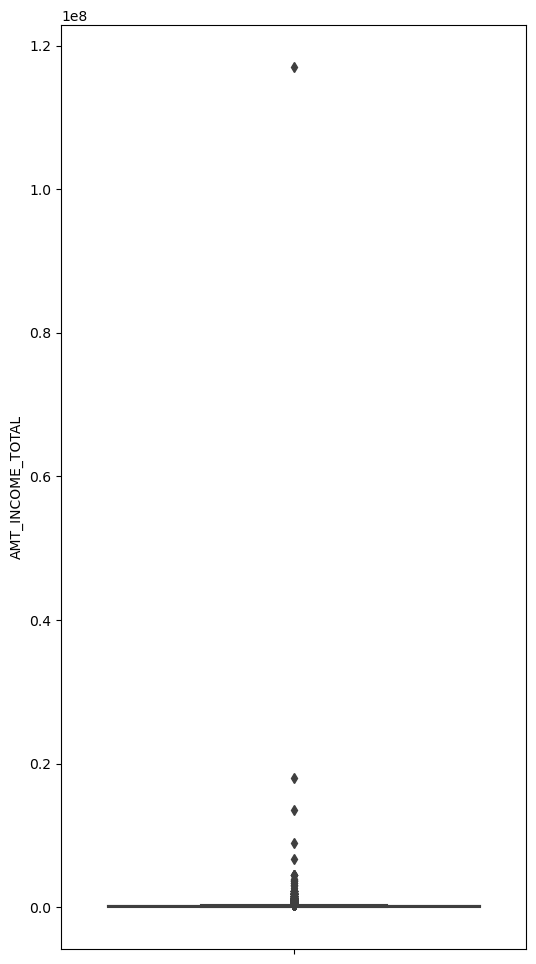

In [379]:
## plot box plot of AMT_INCOME_TOTAL column to check if any outlier is present
plt.figure(figsize = (6,12))
sns.boxplot( y=app_data_3['AMT_INCOME_TOTAL'])
plt.show()

In [380]:
# Observation : Outliers are present in AMT_INCOME_TOTAL column
# we'll b removing this since the value is huge

In [381]:
##Remove the outliers
app_data_3=app_data_3[app_data_3['AMT_INCOME_TOTAL'] <= 5*pow(10,6)]

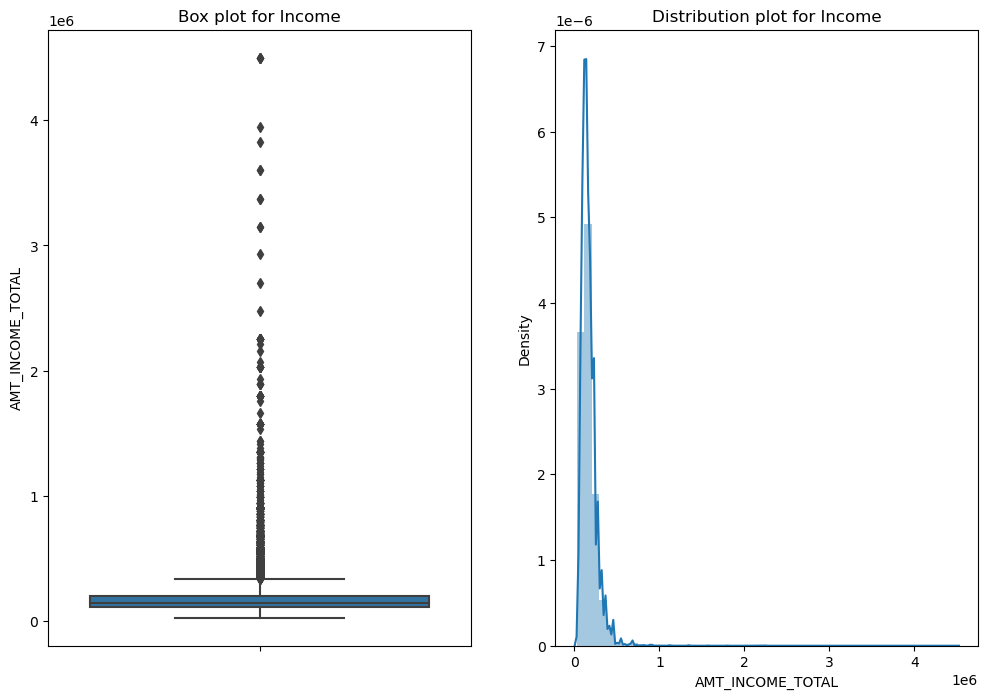

In [382]:
##plot box plot of AMT_INCOME_TOTAL column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(12,8))
sns.boxplot( y=app_data_3['AMT_INCOME_TOTAL'],ax=ax[0])
ax[0].set_title('Box plot for Income')

sns.distplot(app_data_3.AMT_INCOME_TOTAL,ax=ax[1])
ax[1].set_title('Distribution plot for Income')
plt.show()

<AxesSubplot:ylabel='AMT_CREDIT'>

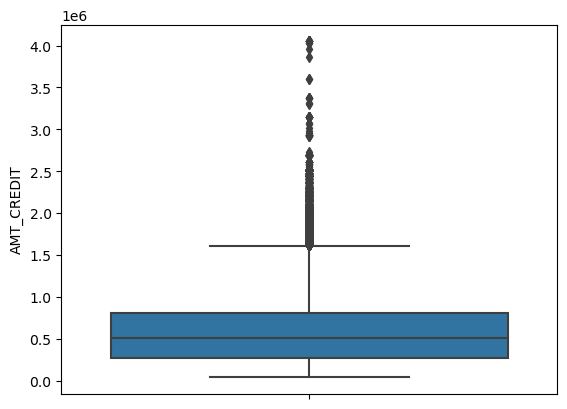

In [383]:
##check for outlier in AMT_CREDIT column
app_data_3.AMT_CREDIT.mean()
sns.boxplot(y=app_data_3['AMT_CREDIT']) 

In [384]:
### observe statistical values of AMT_CREDIT column
app_data_3['AMT_CREDIT'].describe()

count    3.075060e+05
mean     5.990199e+05
std      4.024885e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [385]:
##Remove the outliers
app_data_3=app_data_3[app_data_3['AMT_CREDIT'] <= 2.7*pow(10,6)]

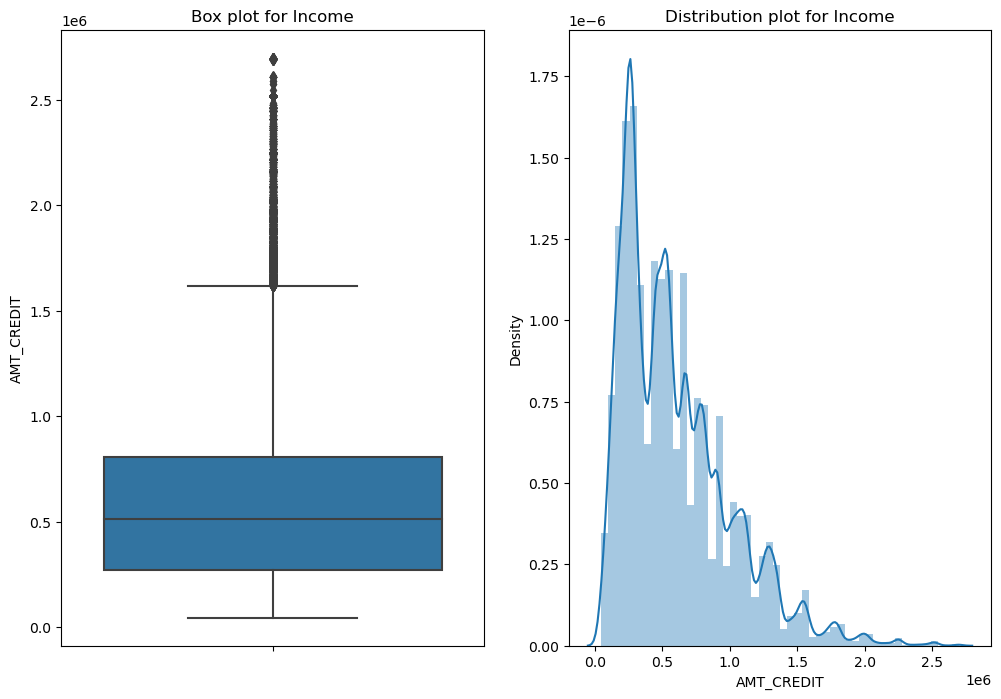

In [386]:
##plot box plot of AMT_CREDIT column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(12,8))
sns.boxplot( y=app_data_3['AMT_CREDIT'],ax=ax[0])
ax[0].set_title('Box plot for Income')

sns.distplot(app_data_3.AMT_CREDIT,ax=ax[1])
ax[1].set_title('Distribution plot for Income')
plt.show()

In [387]:
##check for outlier in AMT_ANNUITY column
app_data_3.AMT_ANNUITY.describe()


count    307450.000000
mean      27097.221384
std       14459.192842
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      230161.500000
Name: AMT_ANNUITY, dtype: float64

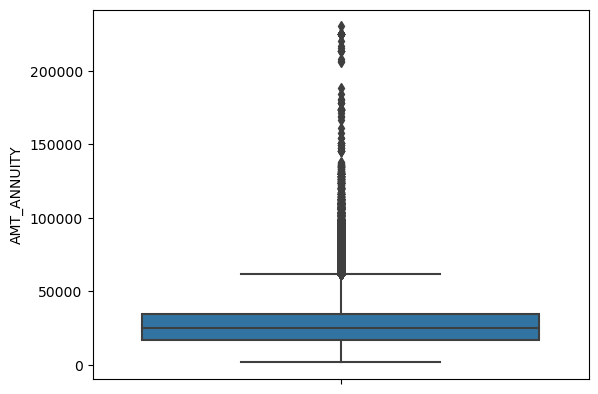

In [388]:
##box plot to check ouliers
sns.boxplot(y=app_data_3['AMT_ANNUITY']);

In [389]:
# Ouliers are present in AMT_ANNUITY column, we will remove these ouliers for better analysis

In [390]:
## Remove the outliers
app_data_3=app_data_3[app_data_3['AMT_ANNUITY'] <= 200000]

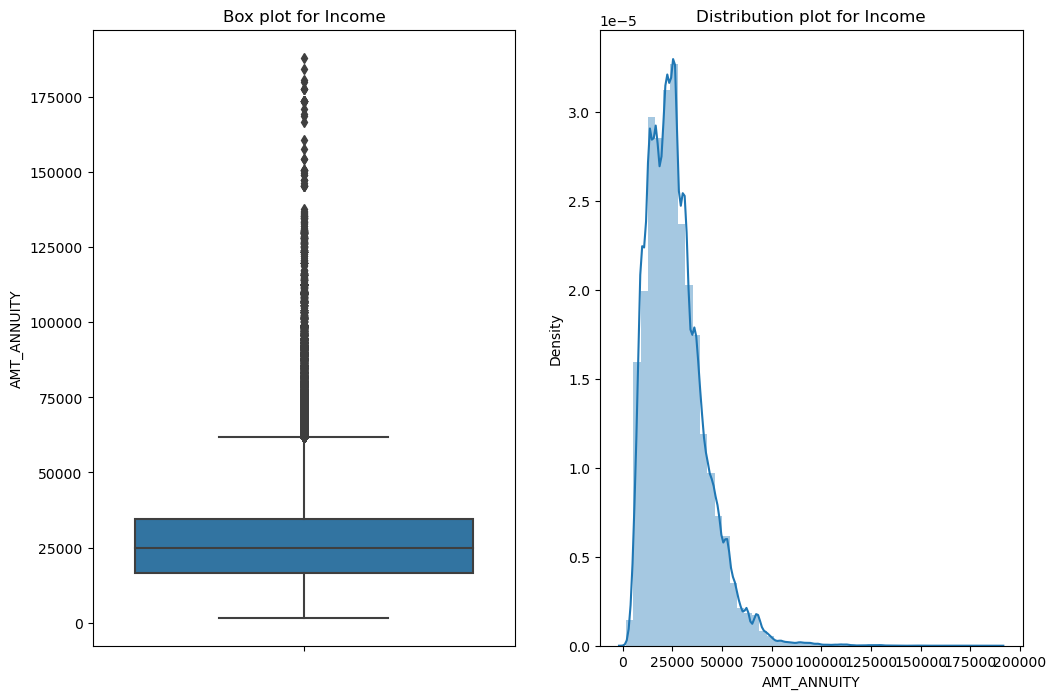

In [391]:
##plot box plot of AMT_ANNUITY column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(12,8))
sns.boxplot( y=app_data_3['AMT_ANNUITY'],ax=ax[0])
ax[0].set_title('Box plot for Income')

sns.distplot(app_data_3.AMT_ANNUITY,ax=ax[1])
ax[1].set_title('Distribution plot for Income')
plt.show()


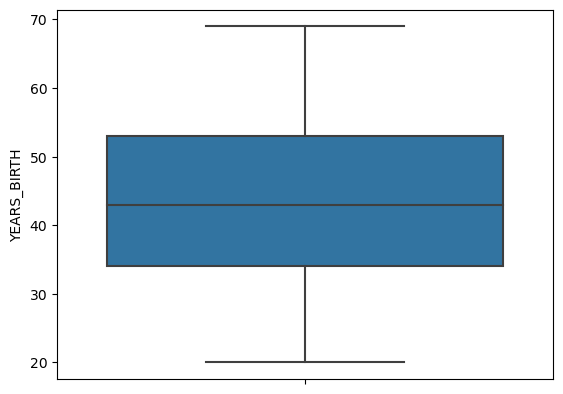

In [392]:
sns.boxplot(y=app_data_3['YEARS_BIRTH']);

In [393]:
# Observation: Outliers are not present in the YEARS_BIRTH column

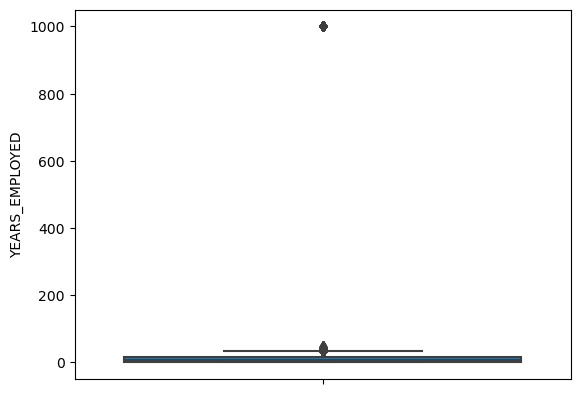

In [394]:
##plot values of YEARS_EMPLOYED column
sns.boxplot(y=app_data_3['YEARS_EMPLOYED']); 

In [395]:
#Outliers are present in the YEARS_EMPLOYED columns and we will handle this outlier by removing the rows

In [396]:
##Remove the outliers
app_data_3=app_data_3[app_data_3['YEARS_EMPLOYED'] <= 800]

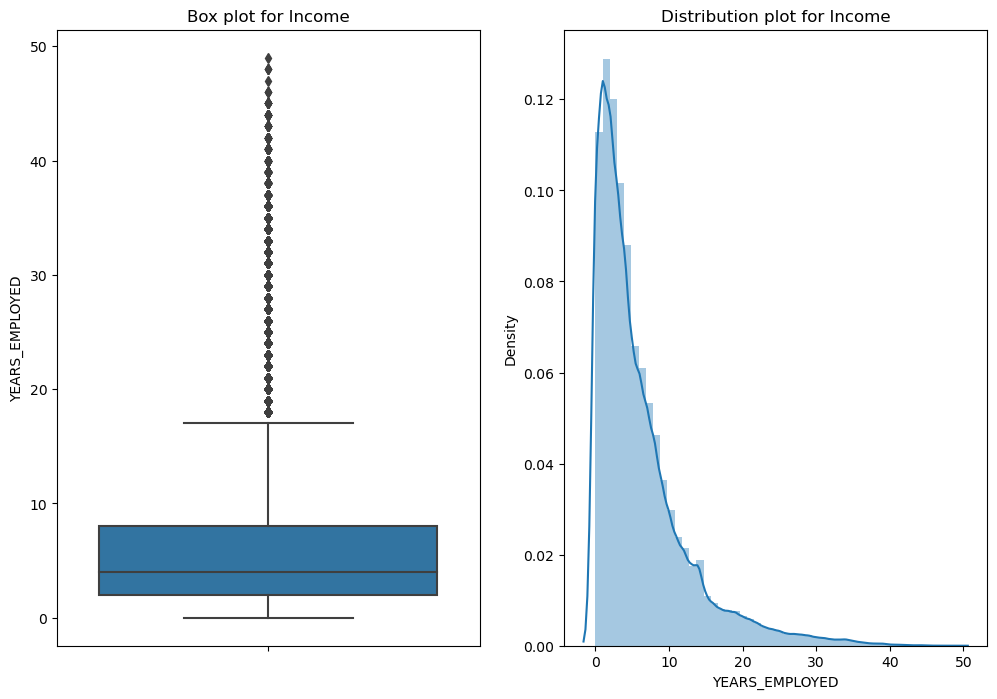

In [397]:
##plot box plot of YEARS_EMPLOYED column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(12,8))
sns.boxplot( y=app_data_3['YEARS_EMPLOYED'],ax=ax[0])
ax[0].set_title('Box plot for Income')

sns.distplot(app_data_3.YEARS_EMPLOYED,ax=ax[1])
ax[1].set_title('Distribution plot for Income')
plt.show()

In [398]:
# Observation 1: In the box plot qurtile is present at 4 years of employment
# Observation 2: bolde 75% people employed years/experience lies between 0-18
# Observation 3: Majority value lies between 0 to 12 years

<AxesSubplot:ylabel='DAYS_REGISTRATION'>

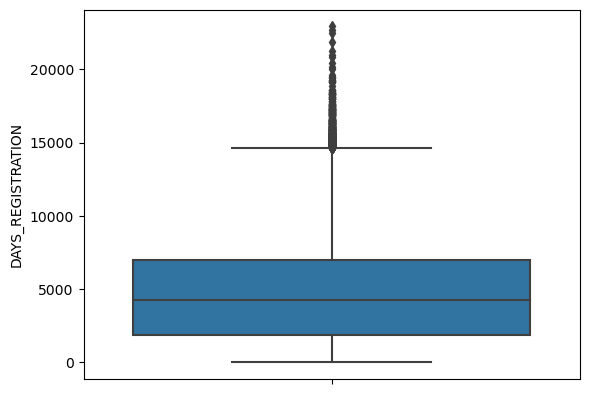

In [399]:
## check outliers for DAYS_REGISTRATION column
app_data_3.DAYS_REGISTRATION
sns.boxplot(y=app_data_3['DAYS_REGISTRATION'])

<AxesSubplot:ylabel='CNT_CHILDREN'>

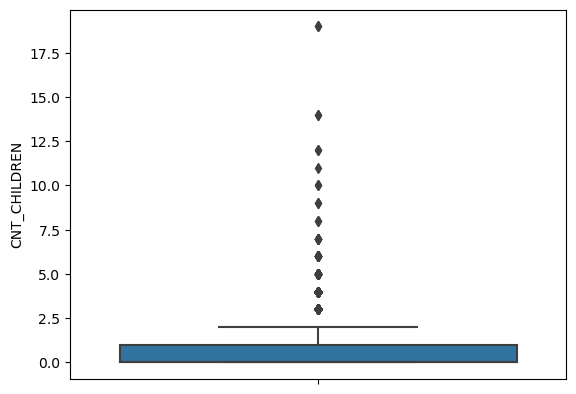

In [400]:
##plot graph to check outliers in CNT_CHILDREN
sns.boxplot(y=app_data_3['CNT_CHILDREN'])

In [401]:
# Outliers are present in CNT_CHILDREN column so removing it

In [402]:
##Remove the outliers
app_data_3=app_data_3[app_data_3['CNT_CHILDREN'] <= 6]

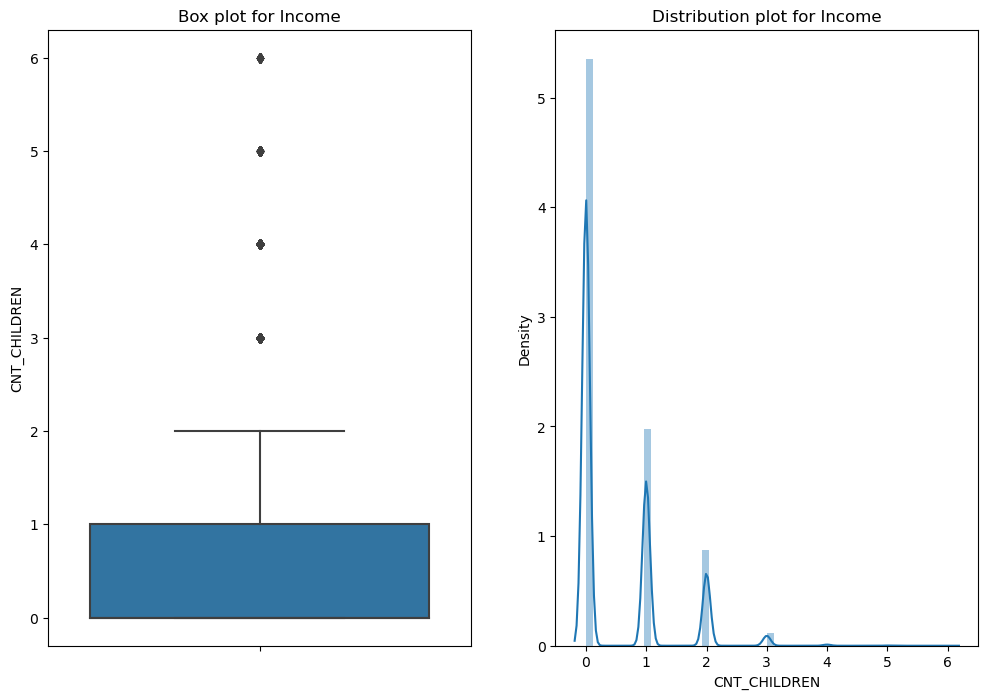

In [403]:
##plot box plot of CNT_CHILDREN column to check if any outlier is present
fig, ax = plt.subplots(1, 2, figsize=(12,8))
sns.boxplot( y=app_data_3['CNT_CHILDREN'],ax=ax[0])
ax[0].set_title('Box plot for Income')

sns.distplot(app_data_3.CNT_CHILDREN,ax=ax[1])
ax[1].set_title('Distribution plot for Income')
plt.show()

In [404]:
# Checking imbalance percentage

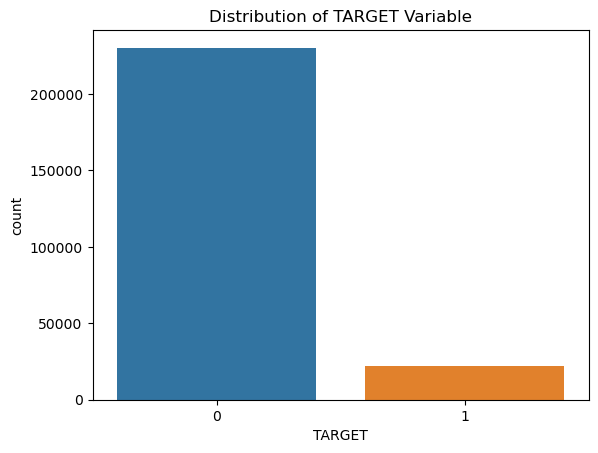

In [405]:
### plot to check imblance percentage of target column
sns.countplot(app_data_3['TARGET'])
plt.title("Distribution of TARGET Variable")
plt.show()

In [406]:
# Observation 1 :percentage of customer being defaulter is imbalanced as compare to not being defaulter
# Observation 2: The gap between the perecentage of taget values are significant

In [407]:
##check the value counts 
app_data_3['TARGET'].value_counts(normalize= 2)

0    0.91339
1    0.08661
Name: TARGET, dtype: float64

In [408]:
# For correlation identify categorical columns and convert datatype of that column to category

In [409]:
#getting unique value count of all columns
app_data_3.nunique().sort_values()

TARGET                      2
NAME_CONTRACT_TYPE          2
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
FLAG_MOBIL                  2
NAME_EDUCATION_TYPE         5
NAME_HOUSING_TYPE           6
NAME_FAMILY_STATUS          6
CNT_CHILDREN                7
NAME_INCOME_TYPE            7
CNT_FAM_MEMBERS             8
OCCUPATION_TYPE            19
ORGANIZATION_TYPE          34
YEARS_EMPLOYED             50
YEARS_BIRTH                50
EXT_SOURCE_3              810
AMT_GOODS_PRICE           882
AMT_INCOME_TOTAL         2235
AMT_CREDIT               5310
DAYS_ID_PUBLISH          6140
AMT_ANNUITY             13152
DAYS_REGISTRATION       14418
EXT_SOURCE_2           110535
SK_ID_CURR             252025
dtype: int64

In [410]:
### get column names to list to apply for loop over a list
column_names=app_data_3.columns.to_list()
column_names

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED']

In [411]:
## identify the categorical column names according to nunique() function
category_column_names=['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
 'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS',
 'ORGANIZATION_TYPE',]

In [412]:
## change the data type of all these columns to category 
for i in range (0,len(column_names)):
    if column_names[i] in category_column_names:
        col_name=column_names[i]
        app_data_3[col_name]=app_data_3[col_name].astype('category')      
app_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252025 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   SK_ID_CURR           252025 non-null  int64   
 1   TARGET               252025 non-null  category
 2   NAME_CONTRACT_TYPE   252025 non-null  category
 3   CODE_GENDER          252025 non-null  category
 4   FLAG_OWN_CAR         252025 non-null  category
 5   FLAG_OWN_REALTY      252025 non-null  category
 6   CNT_CHILDREN         252025 non-null  category
 7   AMT_INCOME_TOTAL     252025 non-null  float64 
 8   AMT_CREDIT           252025 non-null  float64 
 9   AMT_ANNUITY          252025 non-null  float64 
 10  AMT_GOODS_PRICE      251769 non-null  float64 
 11  NAME_INCOME_TYPE     252025 non-null  category
 12  NAME_EDUCATION_TYPE  252025 non-null  category
 13  NAME_FAMILY_STATUS   252025 non-null  category
 14  NAME_HOUSING_TYPE    252025 non-null  category
 15  

In [413]:
# Now we will cerate two different dataframe for target value =1 and target value =0 to find correlation between numeric values

In [414]:
##create new dataframe for target=1
app_data_target_1=app_data_3[app_data_3['TARGET']==1]
app_data_target_1.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002      1         Cash loans           M            N   
26      100031      1         Cash loans           F            N   
40      100047      1         Cash loans           M            N   
42      100049      1         Cash loans           F            N   
94      100112      1         Cash loans           M            Y   

   FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y            0          202500.0    406597.5      24700.5   
26               Y            0          112500.0    979992.0      27076.5   
40               Y            0          202500.0   1193580.0      35028.0   
42               N            0          135000.0    288873.0      16258.5   
94               Y            0          315000.0    953460.0      64107.0   

    ...  DAYS_REGISTRATION DAYS_ID_PUBLISH FLAG_MOBIL OCCUPATION_TYPE  \
0   ...               3648            2120          1        Laborers   
26  ...               6573            1827          1   Cooking staff   
40  ...               1182            1029          1        Laborers   
42  ...                 45            4409          1     Sales staff   
94  ...               4802            1038          1         Unknown   

   CNT_FAM_MEMBERS  ORGANIZATION_TYPE  EXT_SOURCE_2 EXT_SOURCE_3 YEARS_BIRTH  \
0              1.0    Business Entity      0.262949     0.139376          25   
26             1.0    Business Entity      0.548477     0.190706          51   
40             2.0    Business Entity      0.306841     0.320163          47   
42             2.0      Self-employed      0.674203     0.399676          36   
94             1.0           Industry      0.432340     0.077499          27   

   YEARS_EMPLOYED  
0               1  
26              7  
40              3  
42              9  
94              5  

[5 rows x 25 columns]

In [415]:
app_data_target_1.shape

(21828, 25)

In [416]:
## create new dataframe for target=0

app_data_target_0=app_data_3[app_data_3['TARGET']==0]
app_data_target_0.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003      0         Cash loans           F            N   
2      100004      0    Revolving loans           M            Y   
3      100006      0         Cash loans           F            N   
4      100007      0         Cash loans           M            N   
5      100008      0         Cash loans           M            N   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N            0          270000.0   1293502.5      35698.5   
2               Y            0           67500.0    135000.0       6750.0   
3               Y            0          135000.0    312682.5      29686.5   
4               Y            0          121500.0    513000.0      21865.5   
5               Y            0           99000.0    490495.5      27517.5   

   ...  DAYS_REGISTRATION DAYS_ID_PUBLISH FLAG_MOBIL OCCUPATION_TYPE  \
1  ...               1186             291          1      Core staff   
2  ...               4260            2531          1        Laborers   
3  ...               9833            2437          1        Laborers   
4  ...               4311            3458          1      Core staff   
5  ...               4970             477          1        Laborers   

  CNT_FAM_MEMBERS  ORGANIZATION_TYPE  EXT_SOURCE_2 EXT_SOURCE_3 YEARS_BIRTH  \
1             2.0             School      0.622246          NaN          45   
2             1.0         Government      0.555912     0.729567          52   
3             2.0    Business Entity      0.650442          NaN          52   
4             1.0           Religion      0.322738          NaN          54   
5             2.0              Other      0.354225     0.621226          46   

  YEARS_EMPLOYED  
1              3  
2              0  
3              8  
4              8  
5              4  

[5 rows x 25 columns]

In [417]:
app_data_target_0.shape

(230197, 25)

In [418]:
# Correlation
## Finding correlation for all numerical variable

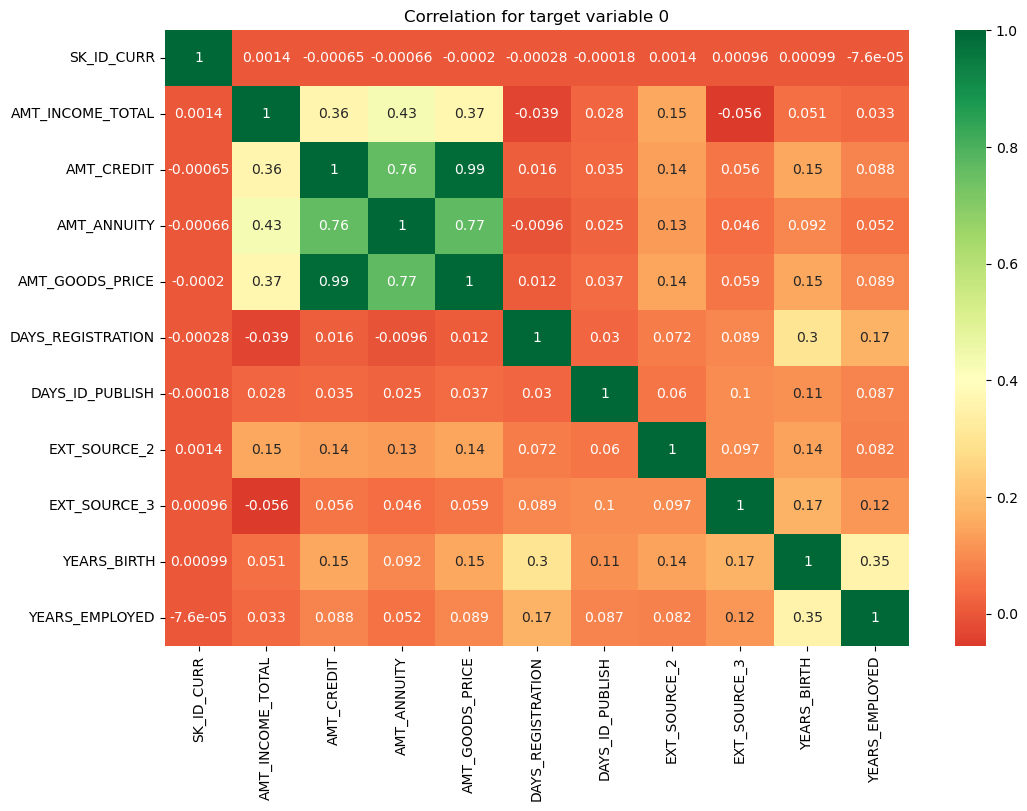

In [419]:
## plot heatmap to find correlation between all numerical variables when target variable is 0
plt.figure(figsize=(12,8)) 
sns.heatmap(app_data_target_0.corr(), annot=True , cmap="RdYlGn",center=0.4)
plt.title('Correlation for target variable 0')
plt.show()

In [420]:
# Observation 1 : AMT_GOODS_PRICE and AMT_CREDIT have heighest correlation around 0.99
# Observation 2 : AMT_GOODS_PRICE and AMT_ANNUITY is also showing better correlation
# Observation 3 : Days Registration is having negative correlation with AMT_INCOME_TOTAL

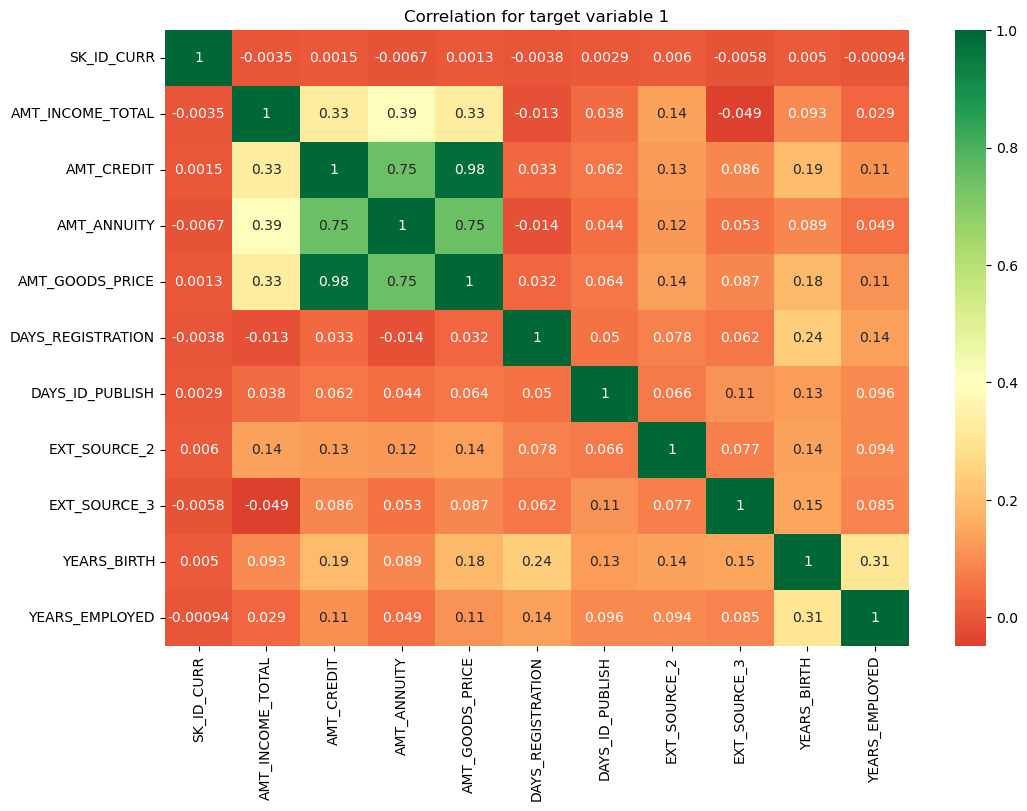

In [421]:
## plot heatmap to find correlation between all numerical variables when target variable is 1

plt.figure(figsize=(12,8)) 
sns.heatmap(app_data_target_1.corr(), annot=True, cmap="RdYlGn",center=0.4)
plt.title('Correlation for target variable 1')
plt.show()

In [422]:
# Observation 1 : AMT_CREDIT and AMT_GOODS_PRICE have heighest correlation around 0.98

In [423]:
# Now Moving Towards Univariate Analysis

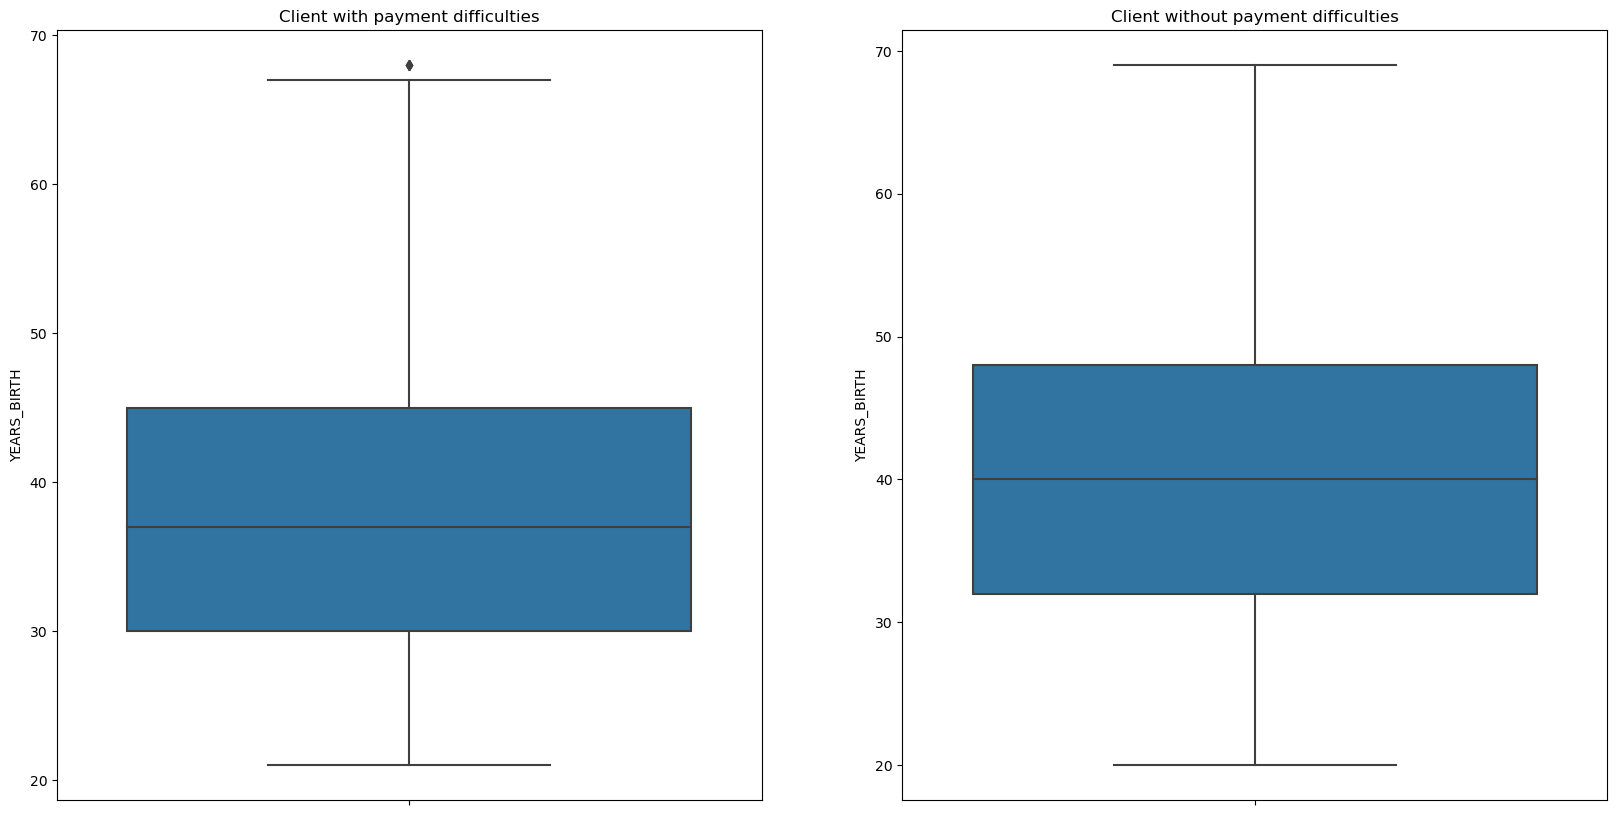

In [424]:
##plot graph for Days_birth column for analysis
plt.figure(figsize=(20,10)) 

plt.subplot(1,2,1)
ax = sns.boxplot(y=app_data_target_1['YEARS_BIRTH'])
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=app_data_target_0['YEARS_BIRTH'])
plt.title('Client without payment difficulties')
plt.show()

In [425]:
# Observation :
 ## clients between age group of 30-45 are facing payment difficulties
  ## clients are not facing any payment difficulities between age group of 33-48

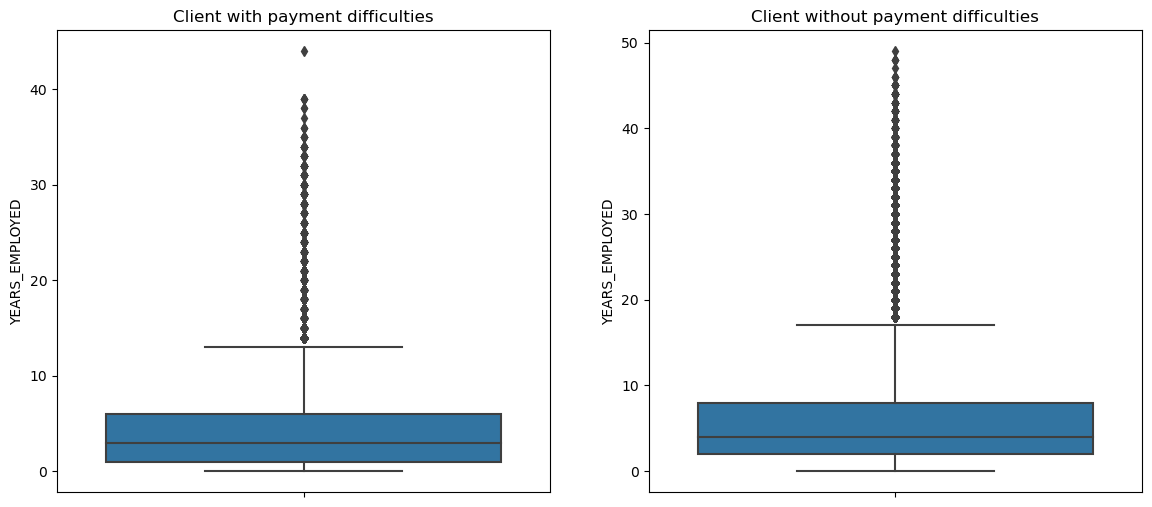

In [426]:
## plot graph for Days_birth column for analysis
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(y=app_data_target_1['YEARS_EMPLOYED'])
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=app_data_target_0['YEARS_EMPLOYED'])
plt.title('Client without payment difficulties')
plt.show()

In [427]:
# Observation :
  ## Outliers are Present for the clients with payment difficuities. Range is 1 year to 7 year
  ## Range of Employed years for clients without payment difficulities is high than clients with payment difficulities i.e betn 2 to 8 years

In [428]:
# Distribution for AMT_INCOME_TOTAL Column

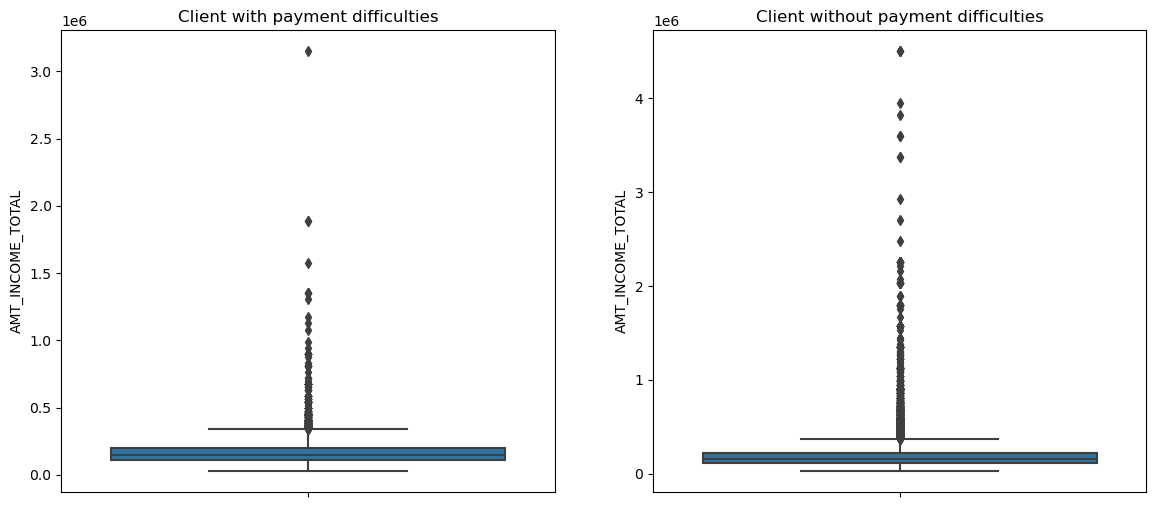

In [429]:
## plot graph for AMT_INCOME_TOTAL column for analysis
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(y=app_data_target_1['AMT_INCOME_TOTAL'])
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=app_data_target_0['AMT_INCOME_TOTAL'])
plt.title('Client without payment difficulties')
plt.show()

In [430]:
## Observation :
    ##More Ouliers present in Clients without payment difficulities
      ##Average Income total is higher for the Clients with payment difficulities than Clients without payment difficulities

In [431]:
# Distribution for AMT_CREDIT Column

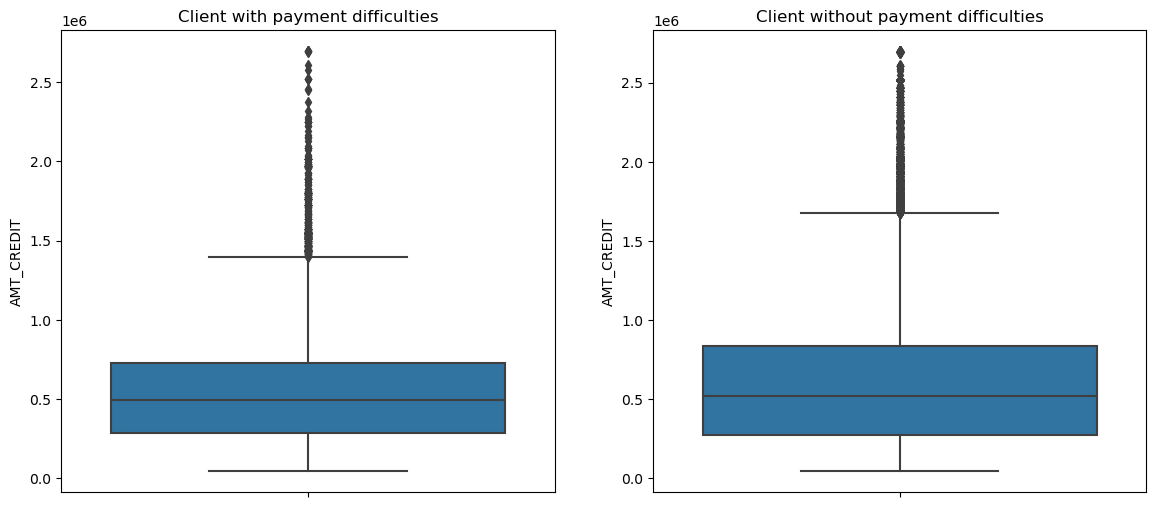

In [432]:
###plot graph for AMT_CREDIT column for analysis
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(y=app_data_target_1['AMT_CREDIT'])
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=app_data_target_0['AMT_CREDIT'])
plt.title('Client without payment difficulties')
plt.show()

In [433]:
# Observation :
   ##Qurtile for Client without payment difficulities is slightly greater than Client with payment difficulities
    ##More outliers are present Clients with payment difficulities as compared with client without payment difficulities

In [434]:
# Distribution for AMT_GOODS_PRICE Column

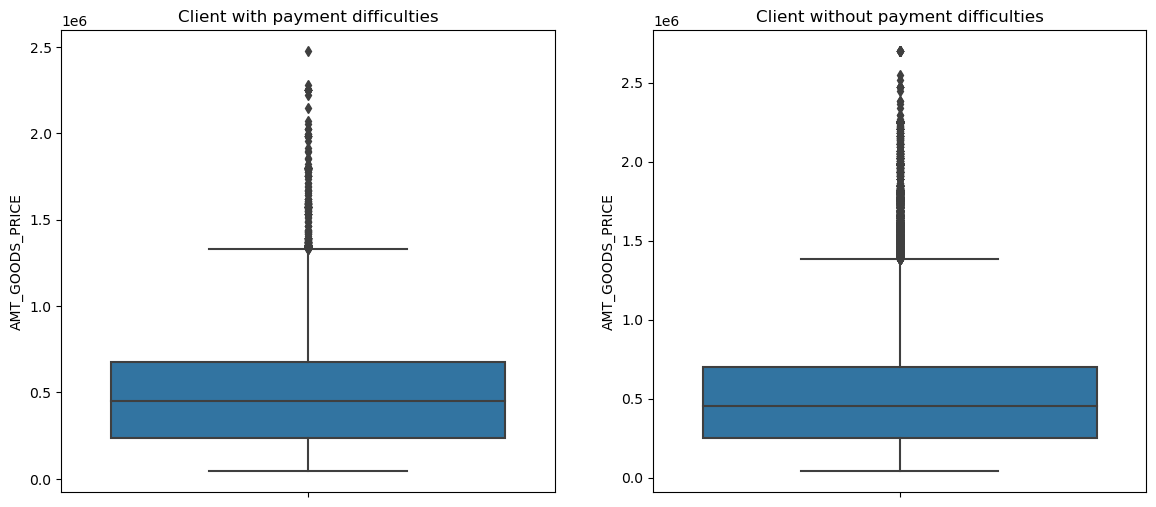

In [435]:
## plot graph for AMT_GOODS_PRICE column for analysis
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(y=app_data_target_1['AMT_GOODS_PRICE'])
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=app_data_target_0['AMT_GOODS_PRICE'])
plt.title('Client without payment difficulties')
plt.show()

In [436]:
# Observation:
  ## AMT_GOODS_PRICE if almost same for Clients with payment dfficulities as well as clients without payment difficulities

In [437]:
#Distribution for DAYS_REGISTRATION Column

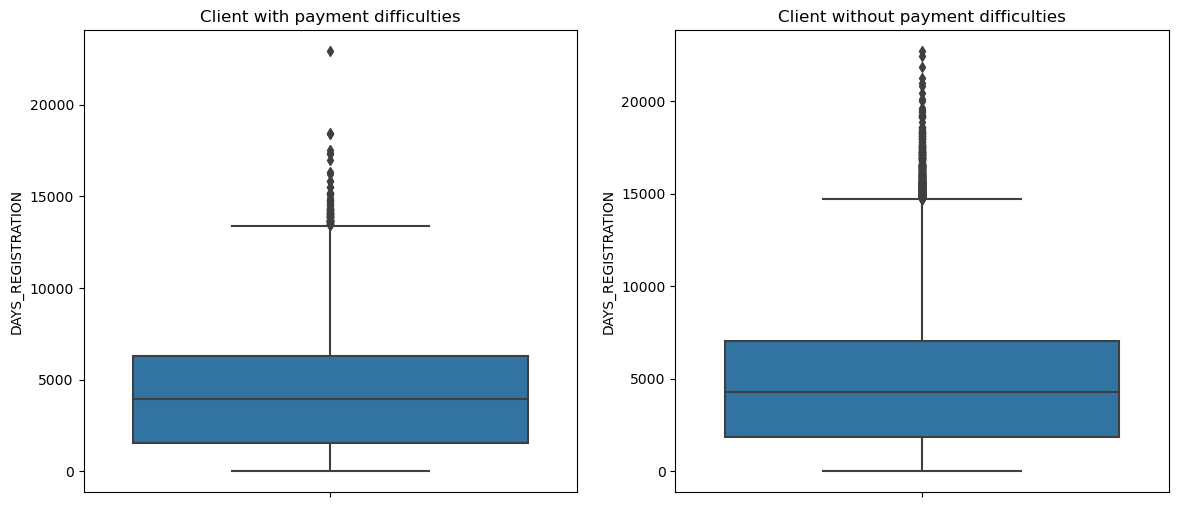

In [438]:
###plot graph for DAYS_REGISTRATION column for analysis
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
ax = sns.boxplot(y=app_data_target_1['DAYS_REGISTRATION'])
plt.title('Client with payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=app_data_target_0['DAYS_REGISTRATION'])
plt.title('Client without payment difficulties')
plt.show()


In [439]:
#Univariate analysis for categorical columns

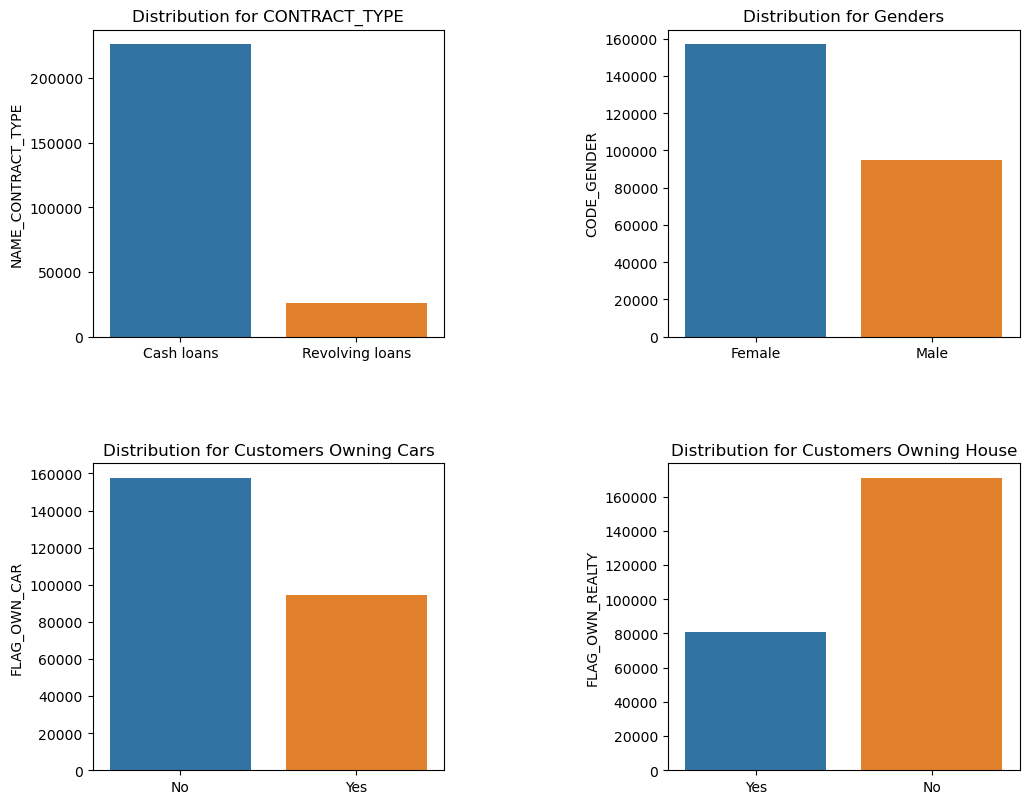

In [440]:
# plot NAME_CONTRACT_TYPE, CODE_GENDER, Owning Cars and FLAG_OWN_REALTY columns for analysis
 
fig, ax = plt.subplots(2, 2, figsize=(10,8))
# Making a plot with 2 subplots

contract_type = app_data_3.NAME_CONTRACT_TYPE.value_counts()

code_genders = app_data_3.CODE_GENDER.value_counts()

owns_cars_flag = app_data_3.FLAG_OWN_CAR.value_counts()

own_reality_flag = app_data_3.FLAG_OWN_REALTY.value_counts()

fig.tight_layout(h_pad=7,w_pad=13)

sns.barplot(x=contract_type.index, y=contract_type, ax=ax[0][0])
ax[0][0].set_title("Distribution for CONTRACT_TYPE", fontsize=12)
ax[0][0].set_xticklabels(['Cash loans','Revolving loans'])

sns.barplot(x=code_genders.index, y=code_genders, ax=ax[0][1])
ax[0][1].set_title("Distribution for Genders", fontsize=12)
ax[0][1].set_xticklabels(['Female','Male'])

sns.barplot(x=owns_cars_flag.index, y=owns_cars_flag, ax=ax[1][0])
ax[1][0].set_title("Distribution for Customers Owning Cars", fontsize=12)
ax[1][0].set_xticklabels(['No','Yes'])

sns.barplot(x=own_reality_flag.index, y=own_reality_flag, ax=ax[1][1])
ax[1][1].set_title("Distribution for Customers Owning House", fontsize=12)
ax[1][1].set_xticklabels(['Yes','No'])

plt.show()


In [441]:
# Observation from above distribution
   ##Number of Cash loan is more than Revolving loans it means more clients are opting for cash loans
     ##Number of female clients is more than male clients
        ##Clients who owns a car is less than clients who does not owns a car
            ##Clients who owns reality is around 50 % less than clients who does not owns a reality

In [442]:
# Distribution of NAME_INCOME_TYPE, NAME_EDUCATION_TYPE

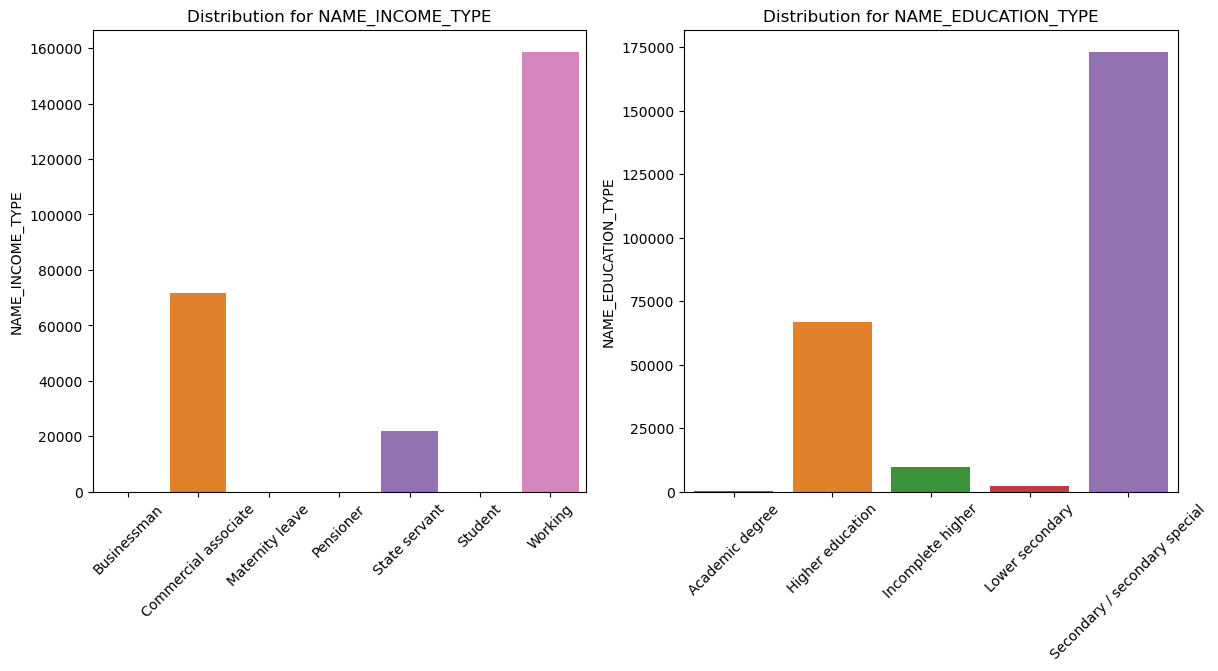

In [443]:
###plot for NAME_INCOME_TYPE and NAME_EDUCATION_TYPE
income_type = app_data_3.NAME_INCOME_TYPE.value_counts()
education_type = app_data_3.NAME_EDUCATION_TYPE.value_counts()

plt.figure(figsize=(14,6)) 


plt.subplot(1,2,1)
ax = sns.barplot(x=income_type.index, y=income_type,)
plt.title("Distribution for NAME_INCOME_TYPE")
plt.xticks(rotation=45)

plt.subplot(1,2,2)                  
ax = sns.barplot(x=education_type.index, y=education_type)
plt.title("Distribution for NAME_EDUCATION_TYPE")

plt.xticks(rotation=45)
plt.show()

In [444]:
# Observation :
   ##Clients with income type category from Businessman, Maternity leave , Pentioner and student is very less. 
      ##Clients with income type Working is highest in the data
         ##Vey few clients are present with education type Academic degree and lower Secondary
           ##Clients with education type secondary / secondary special is highest in data

In [445]:
# Distribution of NAME_FAMILY_STATUS ,NAME_HOUSING_TYPE

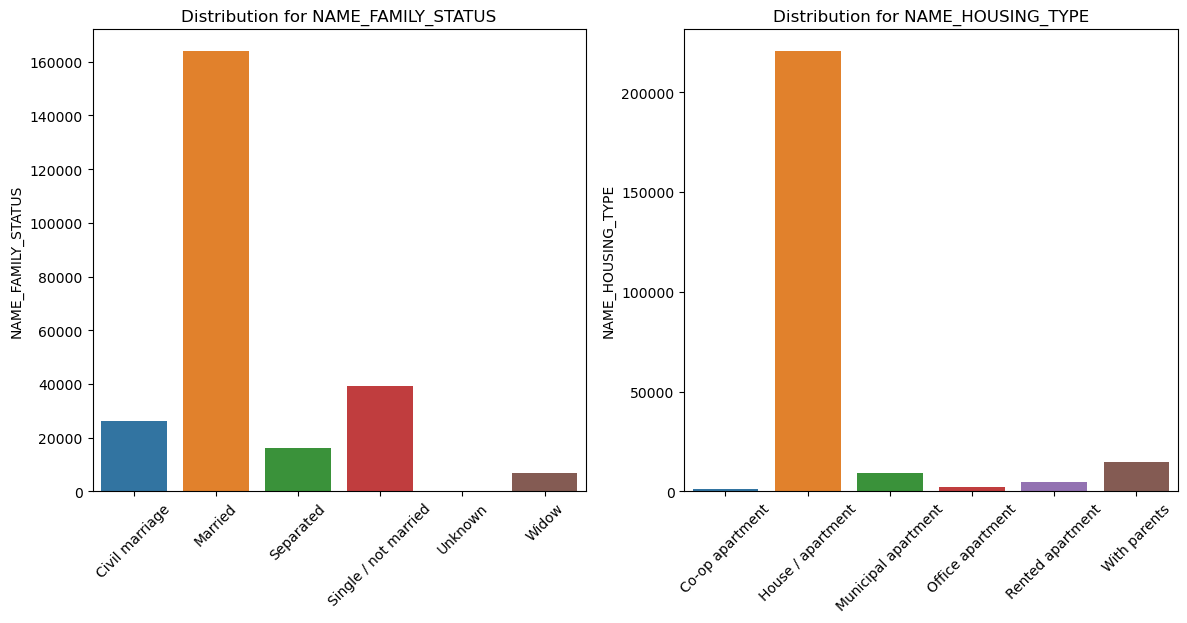

In [446]:
##plot for NAME_FAMILY_STATUS and NAME_HOUSING_TYPE for analysis
family_status = app_data_3.NAME_FAMILY_STATUS.value_counts()
houcing_type = app_data_3.NAME_HOUSING_TYPE.value_counts()

plt.figure(figsize=(14,6)) 


plt.subplot(1,2,1)
ax = sns.barplot(x=family_status.index, y=family_status)
plt.title("Distribution for NAME_FAMILY_STATUS")
plt.xticks(rotation=45)

plt.subplot(1,2,2)                  
ax = sns.barplot(x=houcing_type.index, y=houcing_type)
plt.title("Distribution for NAME_HOUSING_TYPE")
plt.xticks(rotation=45)
plt.show()

In [447]:
# Observation :
   ## Married client are present highest in data.
     ##Few number of Widow clients are available
           ##Clients with housing type House/ Appartment is very high

In [448]:
# Bivariate Analysis
   
   ## Bivariate Analysis of Numerical - Numerical Variables
   ##  Bivariate Analysis of Numerical- Categorical Variables
   ##   Bivariate Analysis of Categorical- Categorical Variables

In [449]:
# We have alredy created two dataframes

## 1) Client without payment difficulties : Target value =0
## 2) Client with payment difficulties : Target value =1
# Now we will analyse Bivariate Analysis on above two mentioned dataframes seperatoly

In [450]:
###get all numerical columns in a list
numerical_columns= ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                    'YEARS_BIRTH']
numerical_columns

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'YEARS_BIRTH']

<Figure size 1600x1000 with 0 Axes>

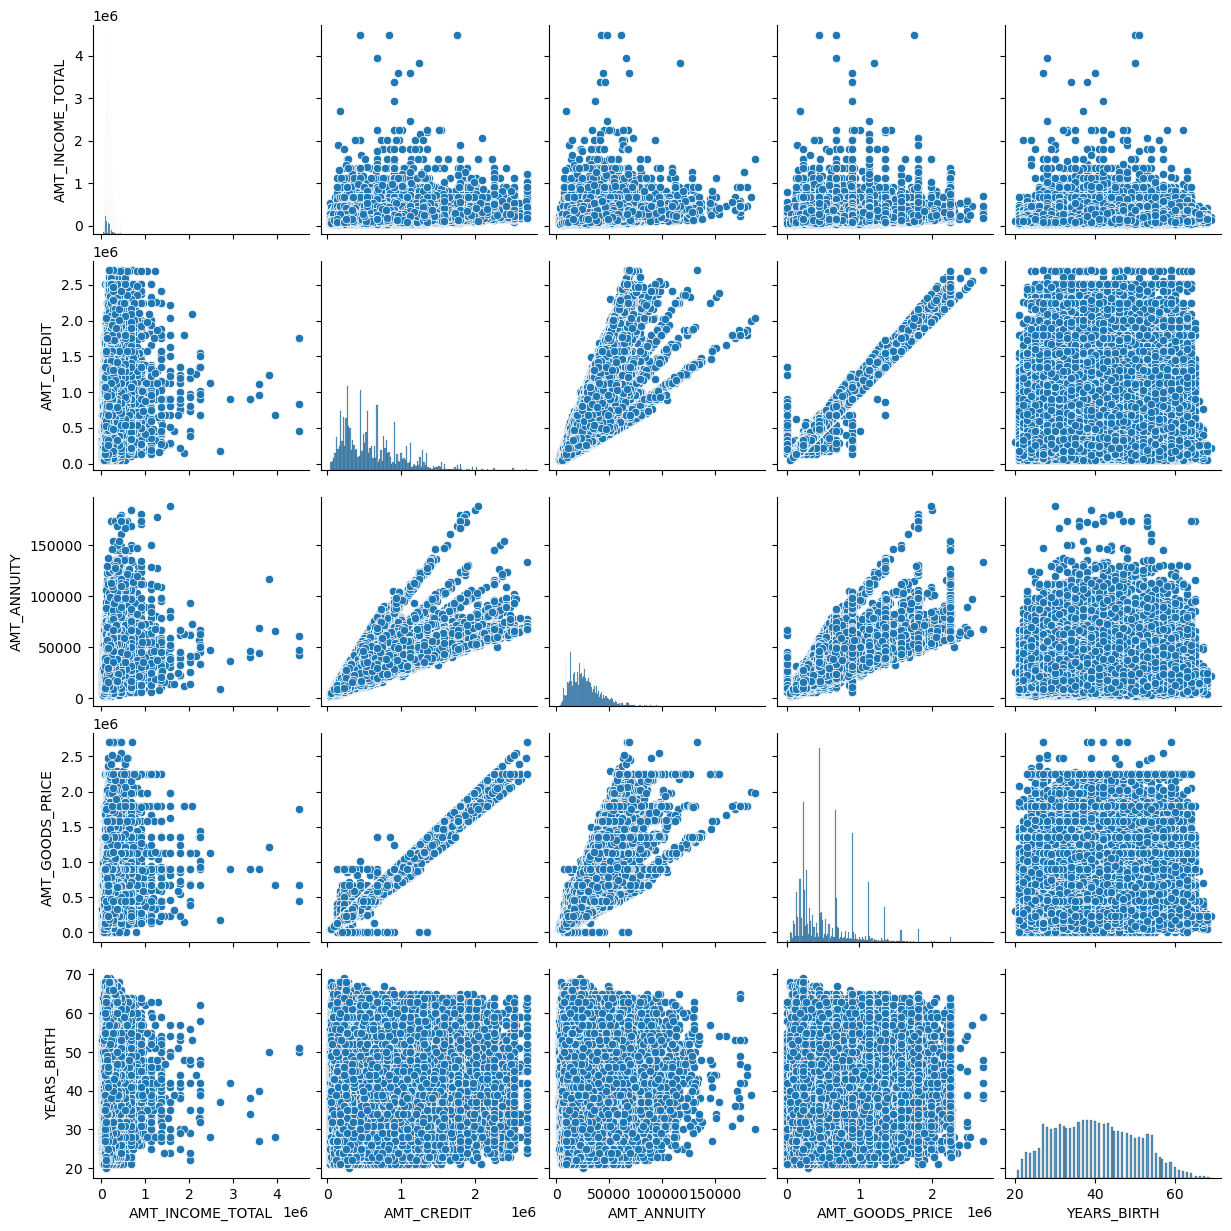

In [451]:
### pair plot of all numerical columns that mentioned above
##pairplott for target varible 0
plt.figure(figsize=[16,10])
plot_pair=app_data_target_0[numerical_columns].fillna(0)
sns.pairplot(plot_pair)
plt.show()

In [452]:
#Observation:
  #There is not such correlation can be observed from the above pairplot
    #Linear correlation present between AMT_GOODS_PRICE vs AMT_CREDIT , AMT_GOODS_PRICE vs AMT_ANNUITY

<Figure size 1800x1000 with 0 Axes>

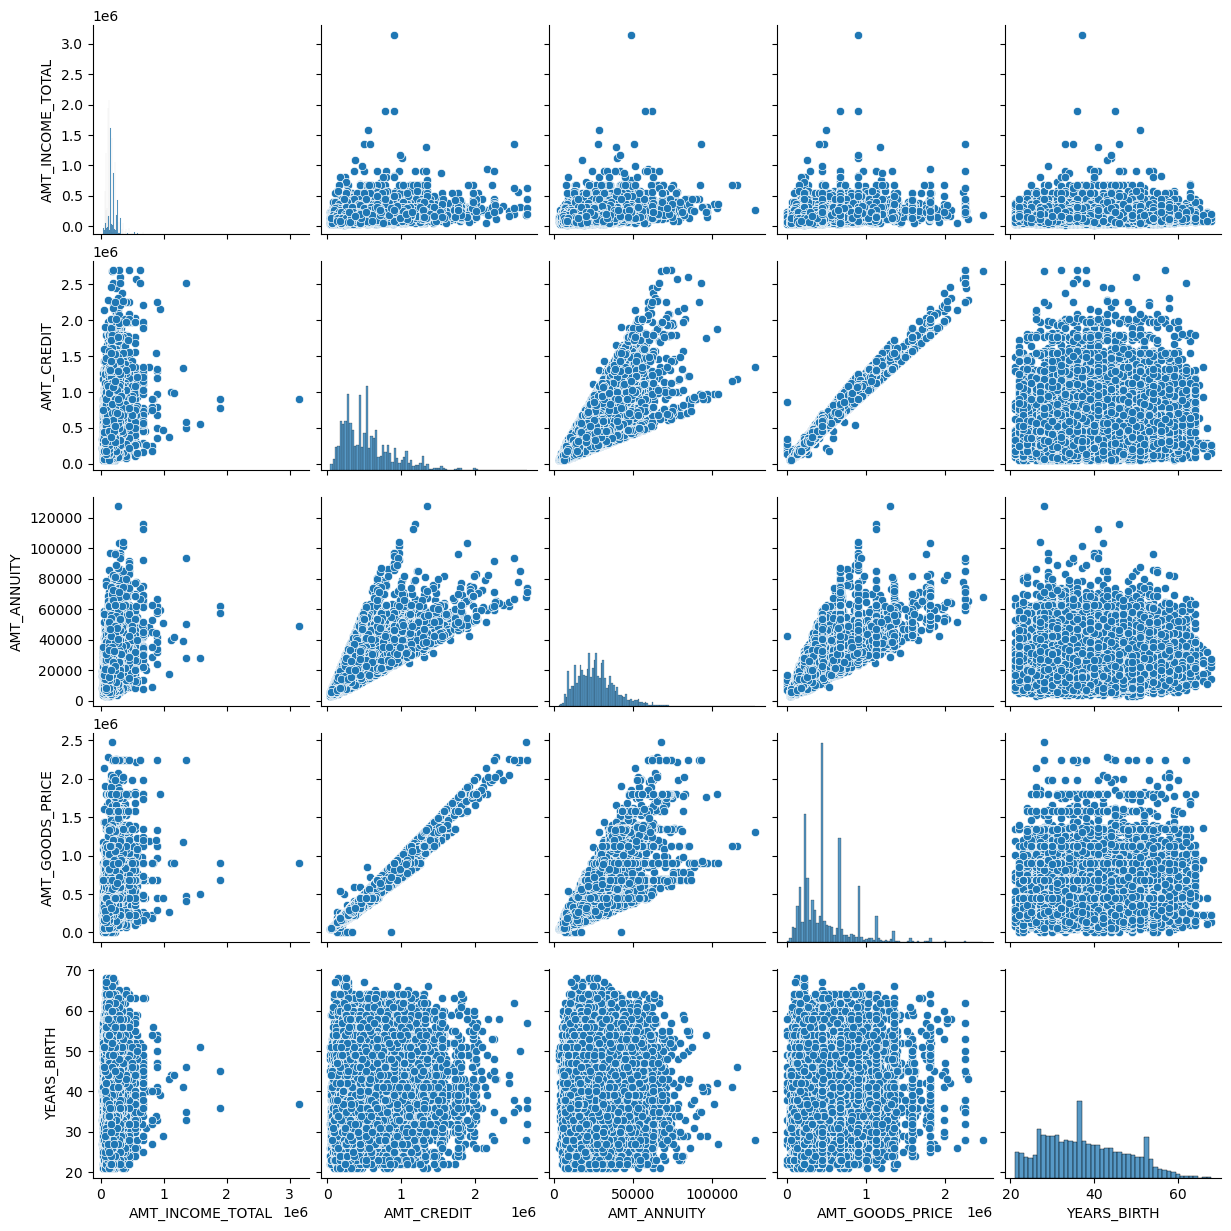

In [453]:
### pair plot of all numerical columns that mentioned above
###Pairplot for target varible 1
plt.figure(figsize=[18,10])
plot_pair=app_data_target_1[numerical_columns].fillna(0)
sns.pairplot(plot_pair)
plt.show()

In [454]:
#Observation:
  ##There is not such correlation can be observed from the above pairplot
  ##There is not such correlation can be observed from the above pairplot
     ##Linear correlation present between AMT_GOODS_PRICE vs AMT_CREDIT , AMT_GOODS_PRICE vs AMT_ANNUITY

In [455]:
# Numerical- Categorical Variables

In [456]:
### boxplot of Numerical vs Categorical variable
def box_plot_numerical_categorical(num_var,cat_var):
    plt.figure(figsize=(20,8)) 

    plt.subplot(1,2,1)
    ax = sns.boxplot(data=app_data_target_0,y=num_var,x=cat_var)
    plt.title('Clients without payment difficulties')
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    ax = sns.boxplot(data=app_data_target_1,y=num_var,x=cat_var)
    plt.title('Clients with payment difficulties')
    plt.xticks(rotation=90)
    plt.show()

In [457]:
 # distributions for 'AMT_CREDIT' vs 'NAME_CONTRACT_TYPE'

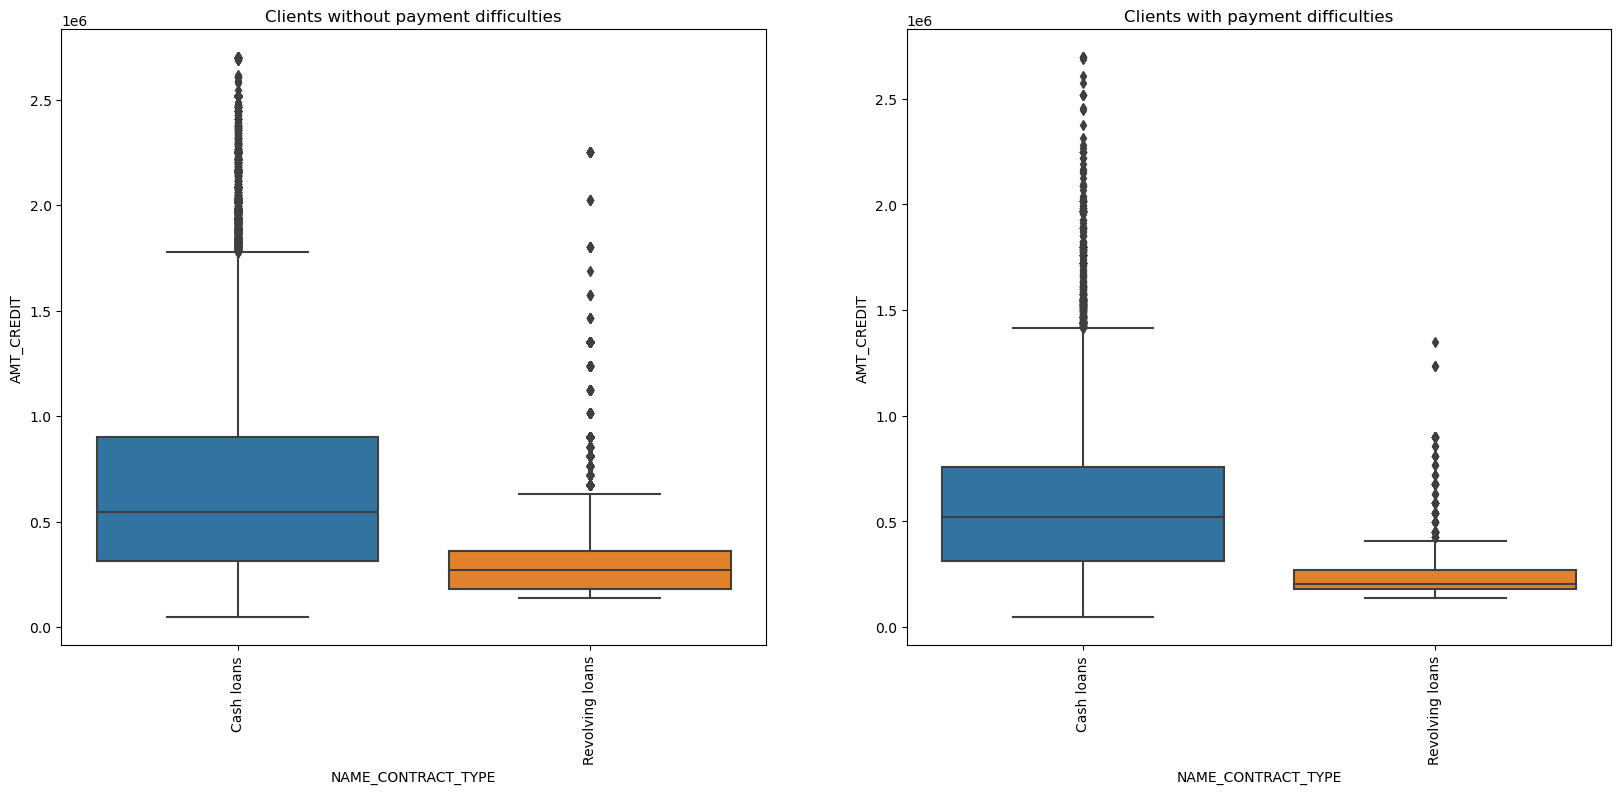

In [458]:
###plot the Distributions for 'AMT_CREDIT' vs 'NAME_CONTRACT_TYPE'
box_plot_numerical_categorical('AMT_CREDIT','NAME_CONTRACT_TYPE')

In [459]:
  ## Observation from above Distributions for 'AMT_CREDIT' vs 'NAME_CONTRACT_TYPE'
           ##Median for Customer without payment difficulties and Customer with payment difficulties is approximately same
            ##There is huge difference between 75th quartile of Customer without payment difficulties and Customer with payment difficulties
              ##There are some outliers resent in Customer with payment difficulties
                  ##Number of clients are very high for cash loans than revolving loan

In [460]:
# Distributions for 'AMT_CREDIT' vs 'NAME_EDUCATION_TYPE'

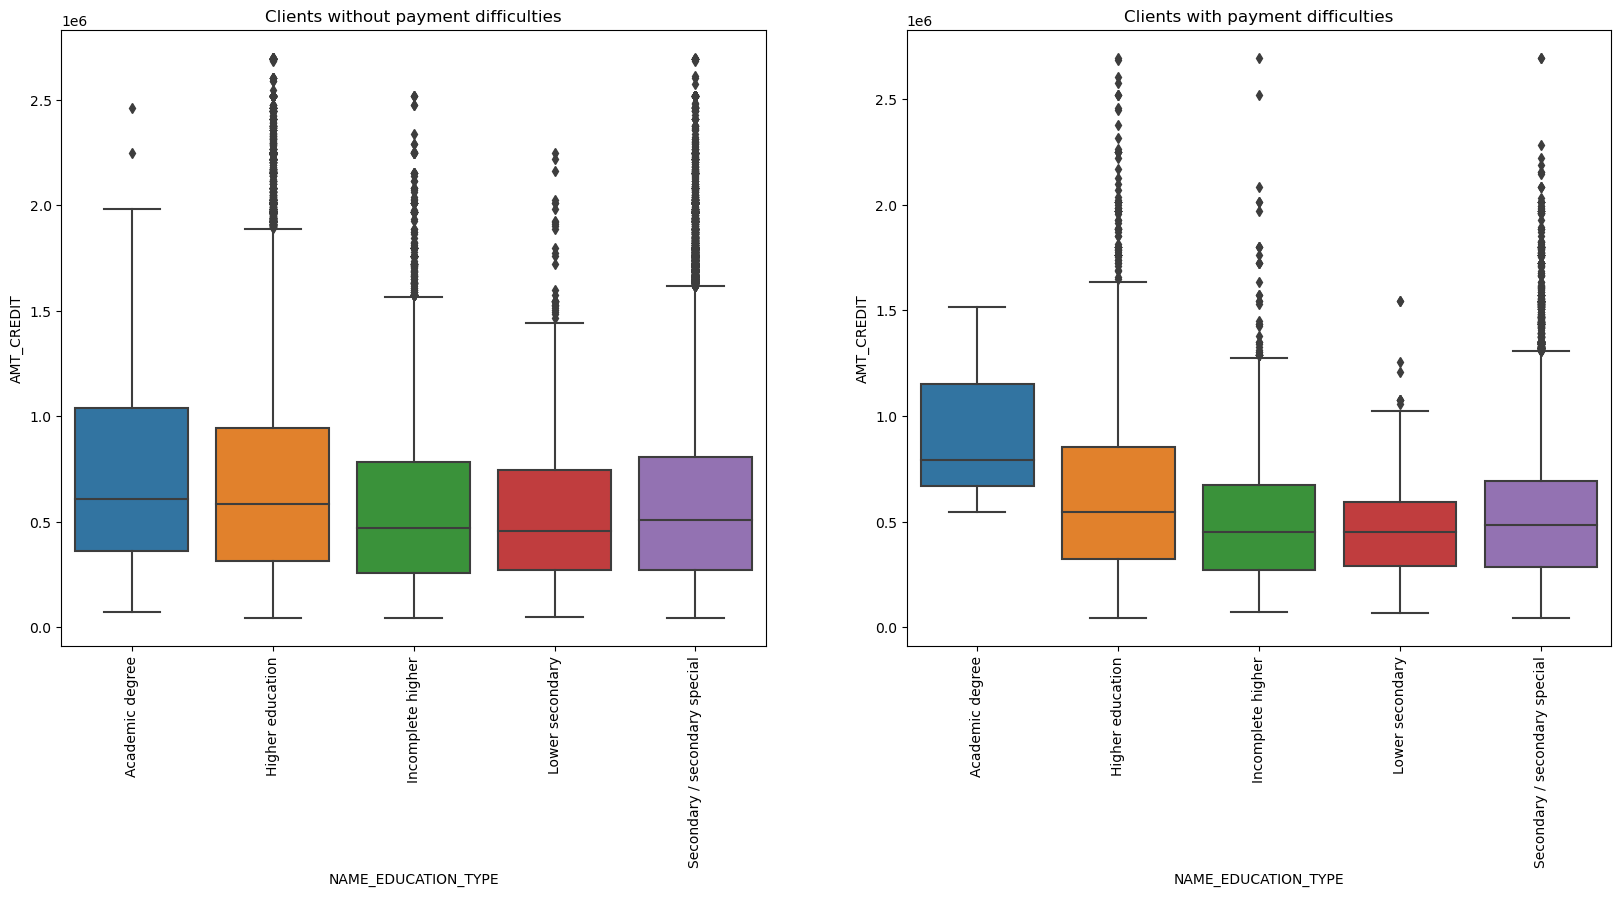

In [461]:
## plot the Distributions for 'AMT_CREDIT' vs 'NAME_EDUCATION_TYPE'
box_plot_numerical_categorical('AMT_CREDIT','NAME_EDUCATION_TYPE')

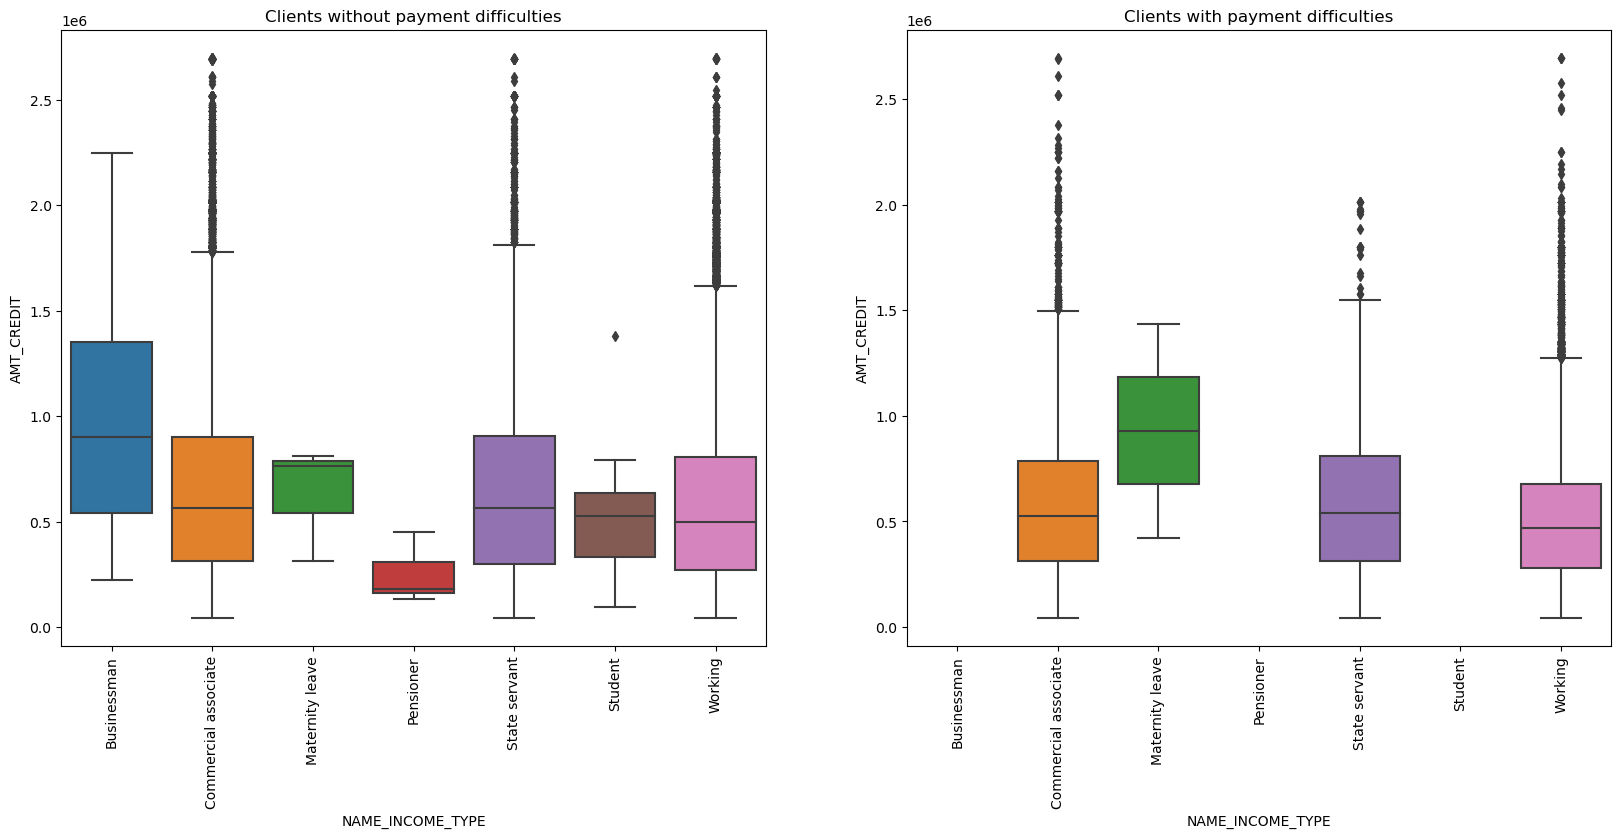

In [462]:
###plot the Distributions for 'AMT_CREDIT' vs 'NAME_INCOME_TYPE'
box_plot_numerical_categorical('AMT_CREDIT','NAME_INCOME_TYPE')


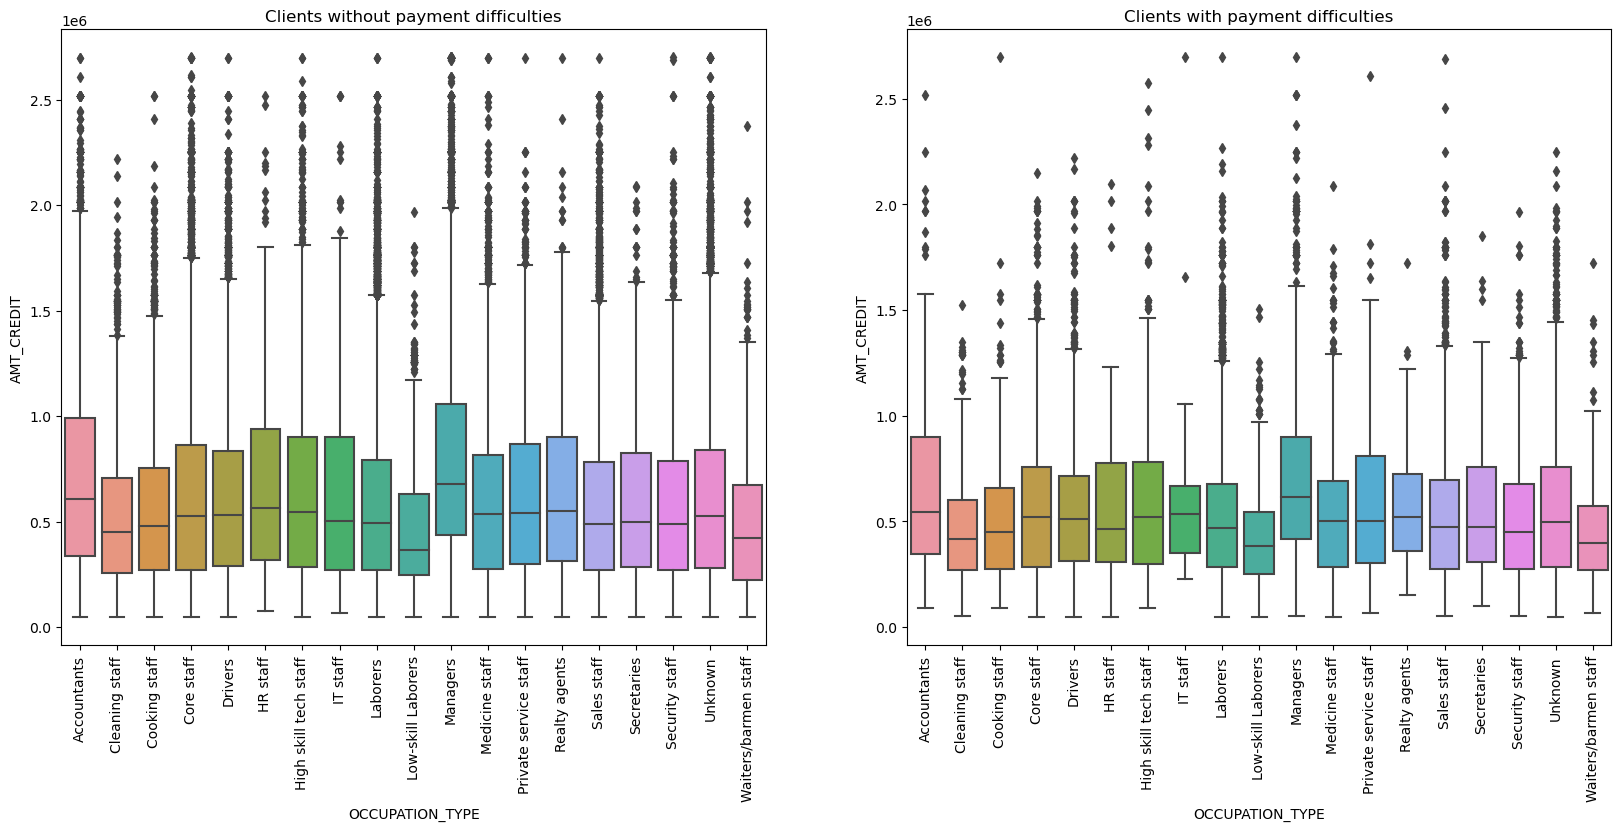

In [463]:
###plot the Distributions for 'AMT_CREDIT' vs 'OCCUPATION_TYPE'
box_plot_numerical_categorical('AMT_CREDIT','OCCUPATION_TYPE')

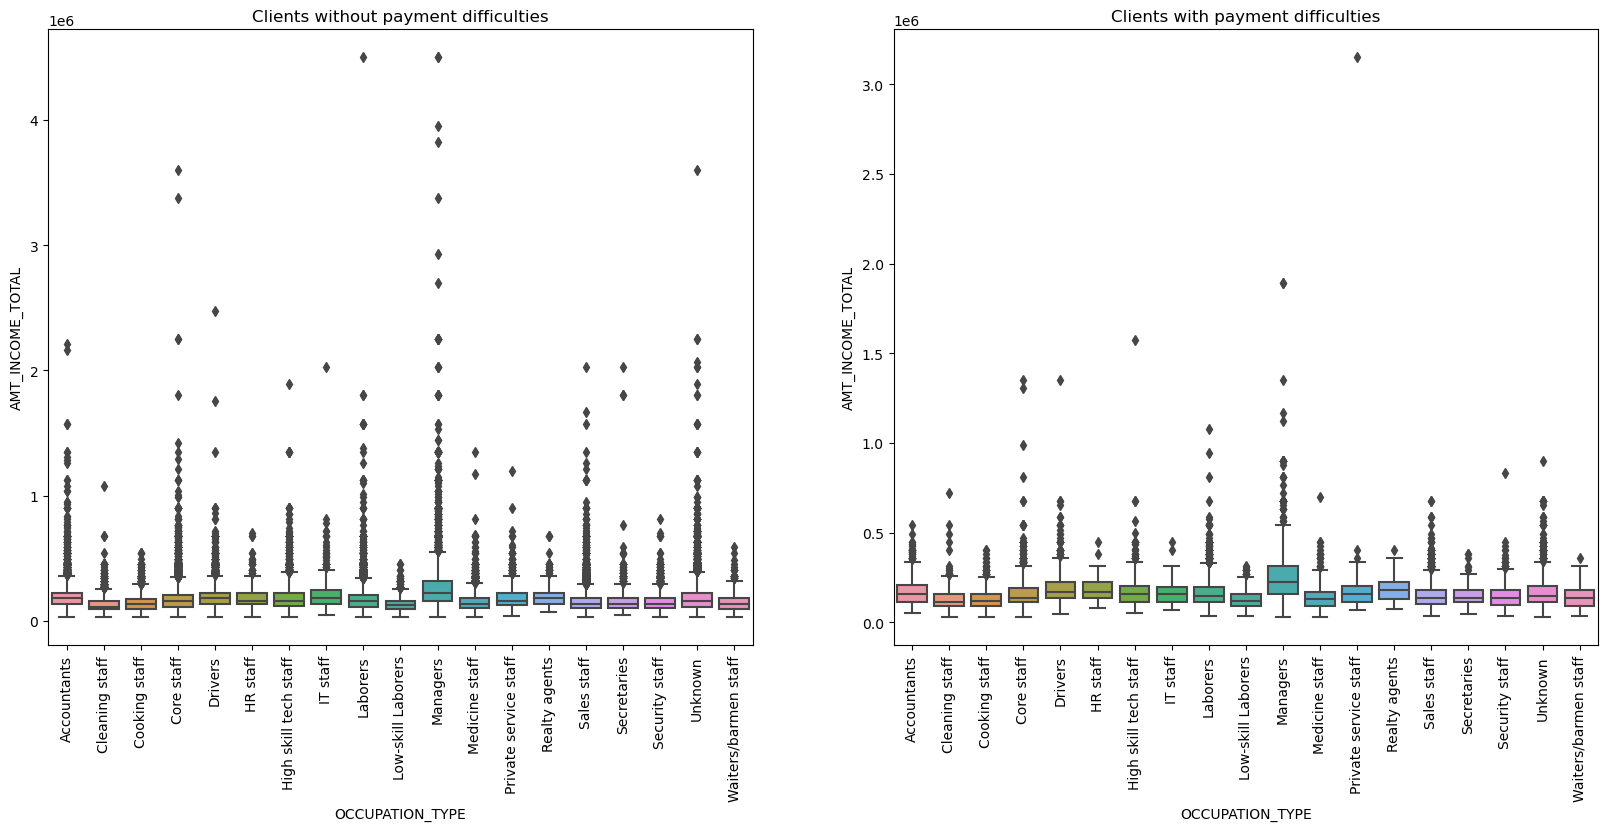

In [464]:
#### Distributions for 'AMT_INCOME_TOTAL' vs 'OCCUPATION_TYPE'
box_plot_numerical_categorical('AMT_INCOME_TOTAL','OCCUPATION_TYPE')

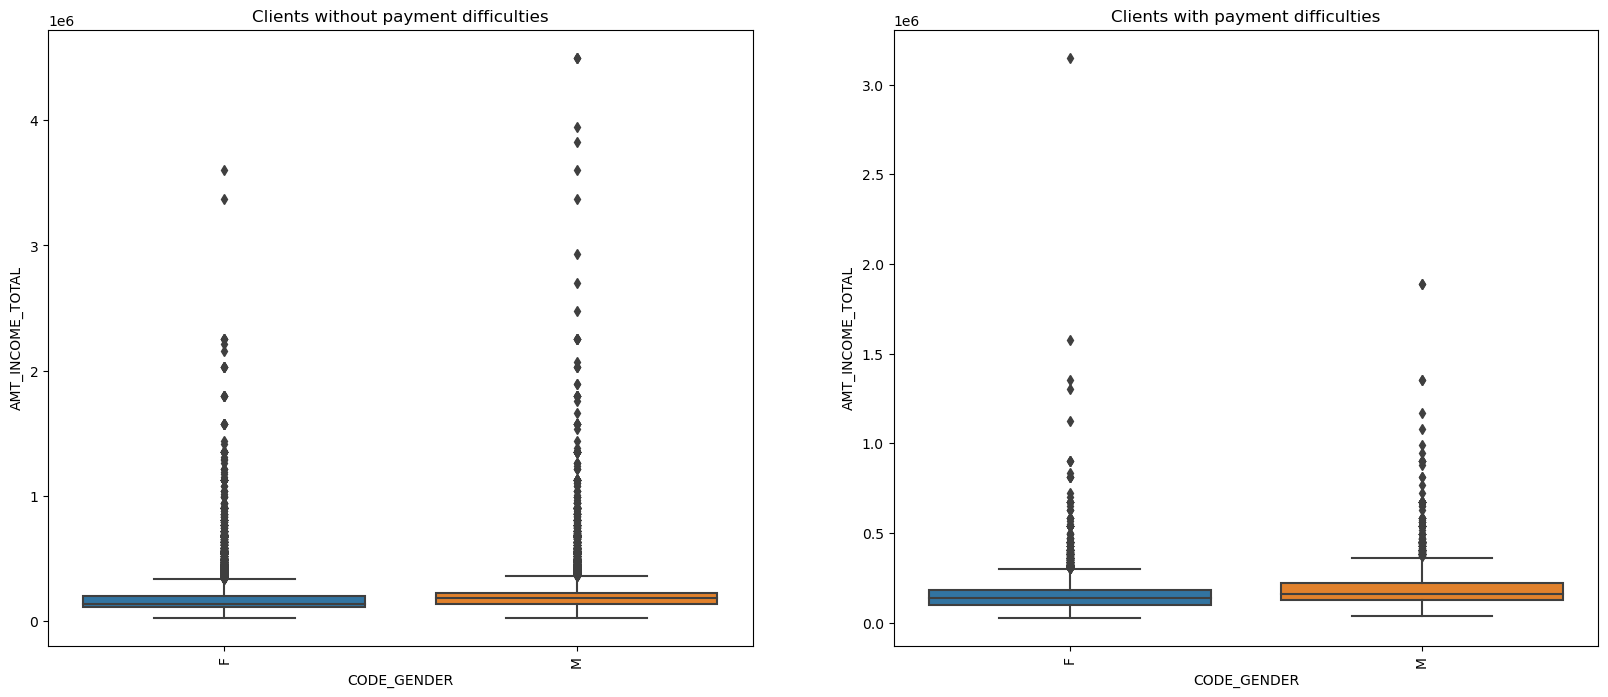

In [465]:
#### Distributions for 'AMT_INCOME_TOTAL' vs 'CODE_GENDER''
box_plot_numerical_categorical('AMT_INCOME_TOTAL','CODE_GENDER')

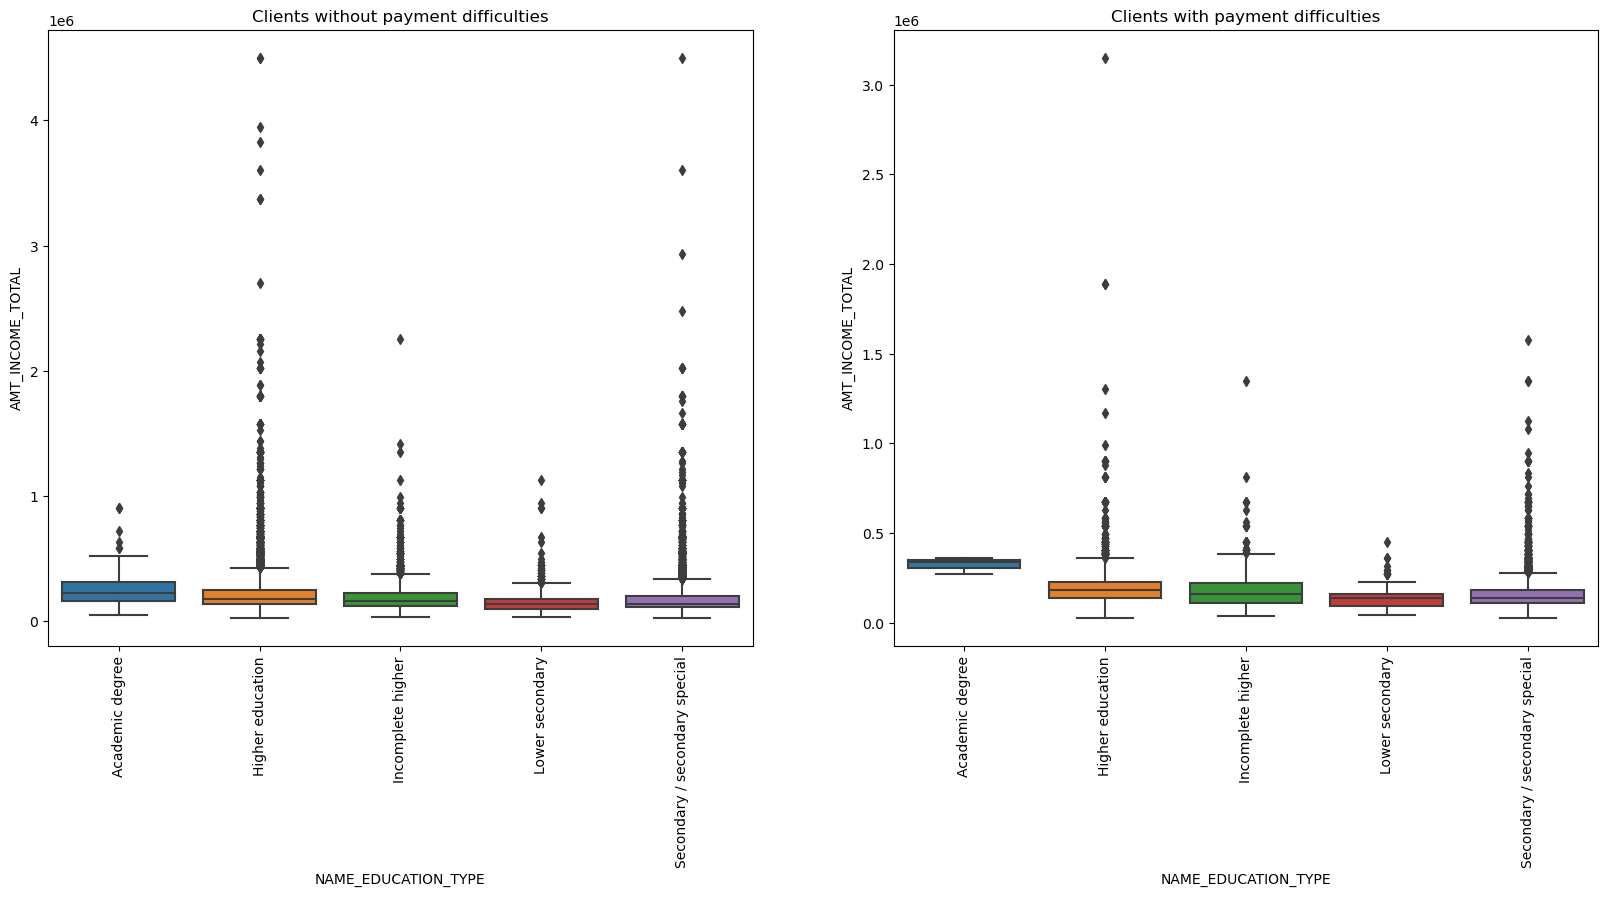

In [466]:
#### Distributions for 'AMT_INCOME_TOTAL' vs 'NAME_EDUCATION_TYPE'''
box_plot_numerical_categorical('AMT_INCOME_TOTAL','NAME_EDUCATION_TYPE')

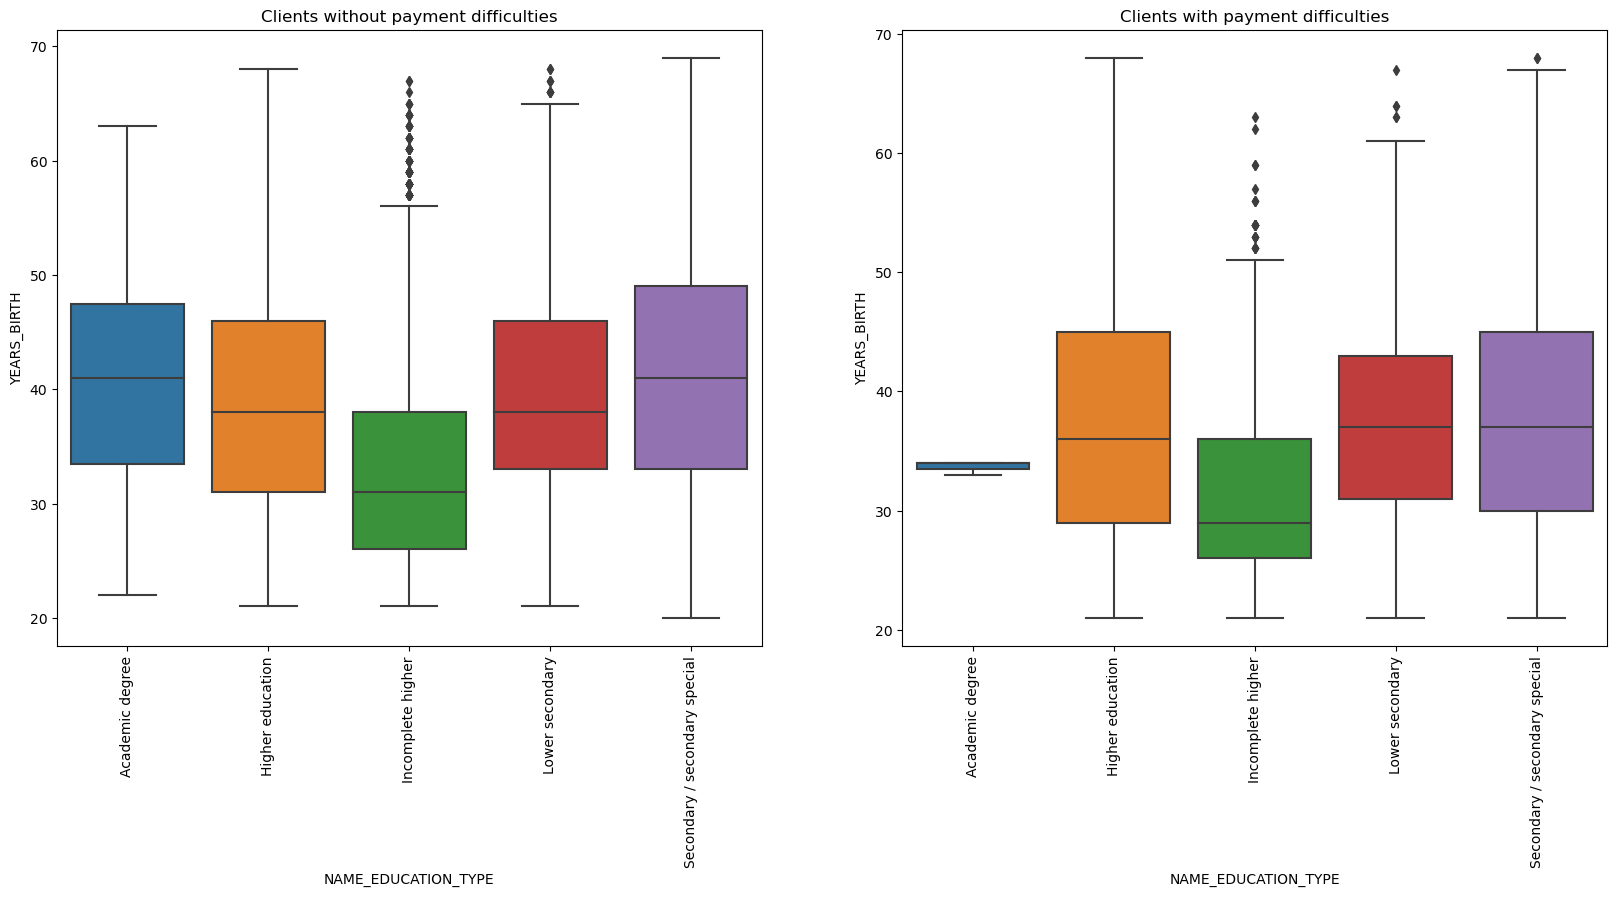

In [467]:
#### Distributions for 'YEARS_BIRTH' vs 'NAME_EDUCATION_TYPE'''
box_plot_numerical_categorical('YEARS_BIRTH','NAME_EDUCATION_TYPE')

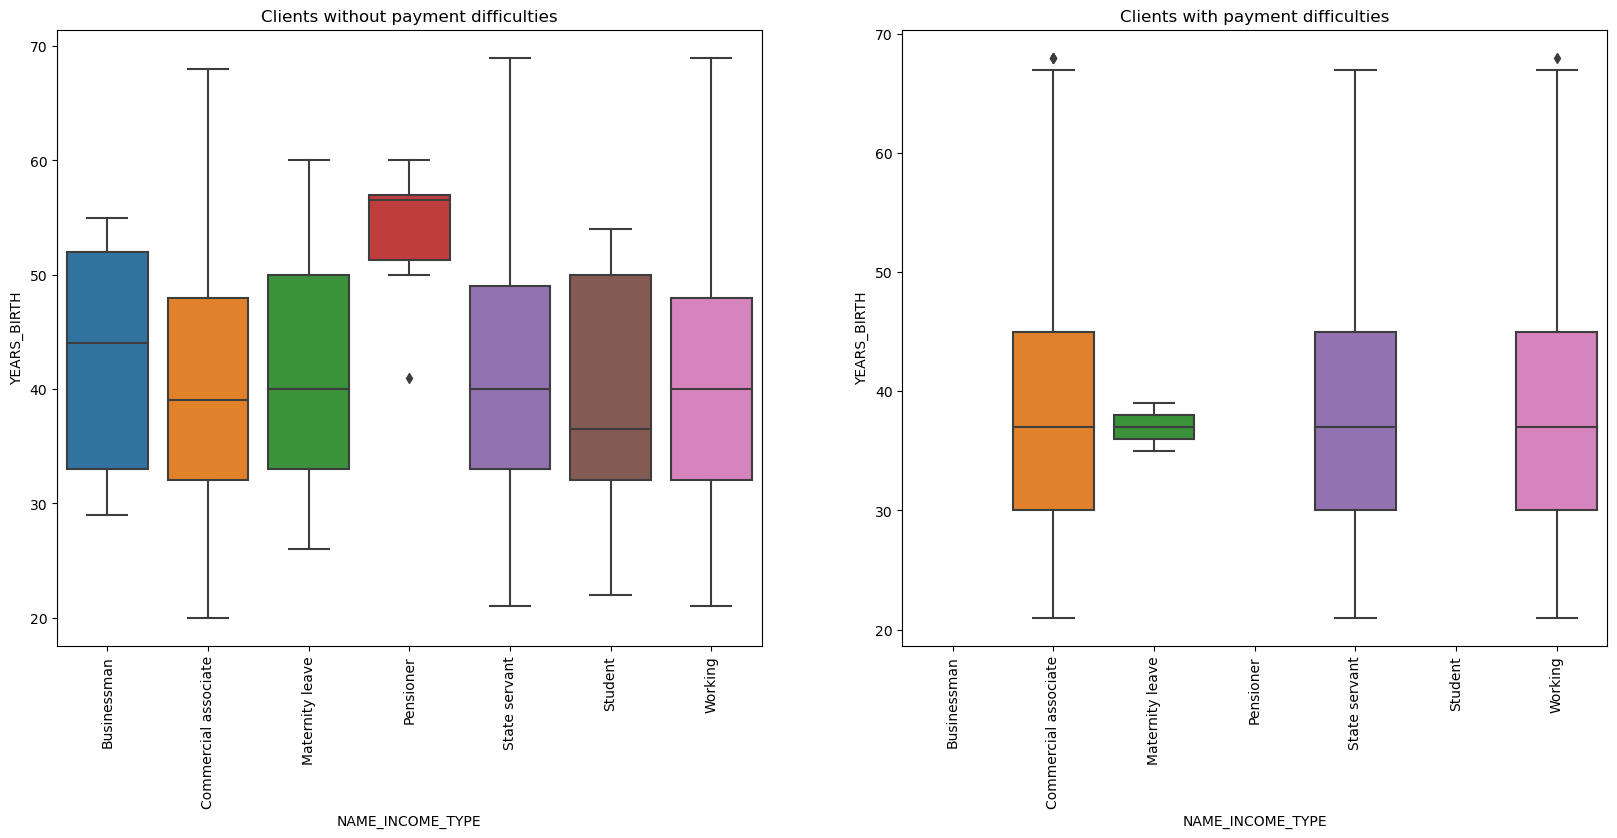

In [468]:
#### Distributions for 'YEARS_BIRTH' vs 'NAME_INCOME_TYPE'''
box_plot_numerical_categorical('YEARS_BIRTH','NAME_INCOME_TYPE')

In [469]:
## Categorical- Categorical Variables

In [470]:
#### make function to plot categorical- categorical variable
def plot_categorical_categorical(cat1,cat2):
    plt.figure(figsize=(18,8)) 

    plt.subplot(1,2,1)
    ax = sns.countplot(data=app_data_target_0,x=cat1,hue=cat2)
    plt.title('Client without payment difficulties')
    plt.xticks(rotation=90)
    plt.legend(loc='best')


    plt.subplot(1,2,2)
    ax = sns.countplot(data=app_data_target_1,x=cat1,hue=cat2)
    plt.title('Client with payment difficulties')
    plt.legend(loc='best')
    plt.xticks(rotation=90)
    plt.show()

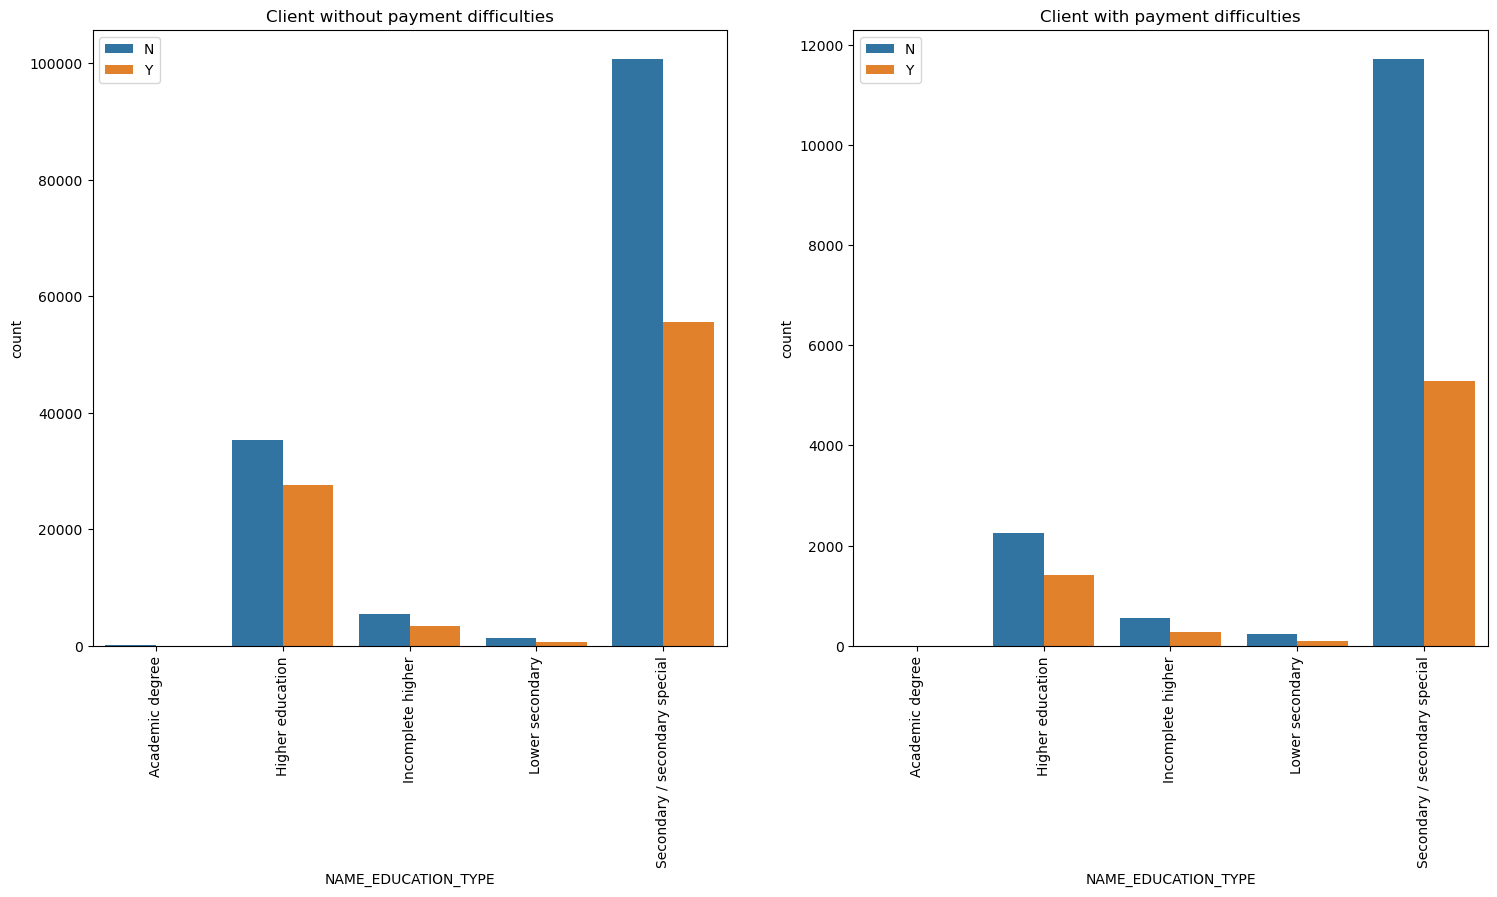

In [471]:
##plot distribution for 'FLAG_OWN_CAR' vs 'NAME_EDUCATION_TYPE'
plot_categorical_categorical('NAME_EDUCATION_TYPE','FLAG_OWN_CAR')

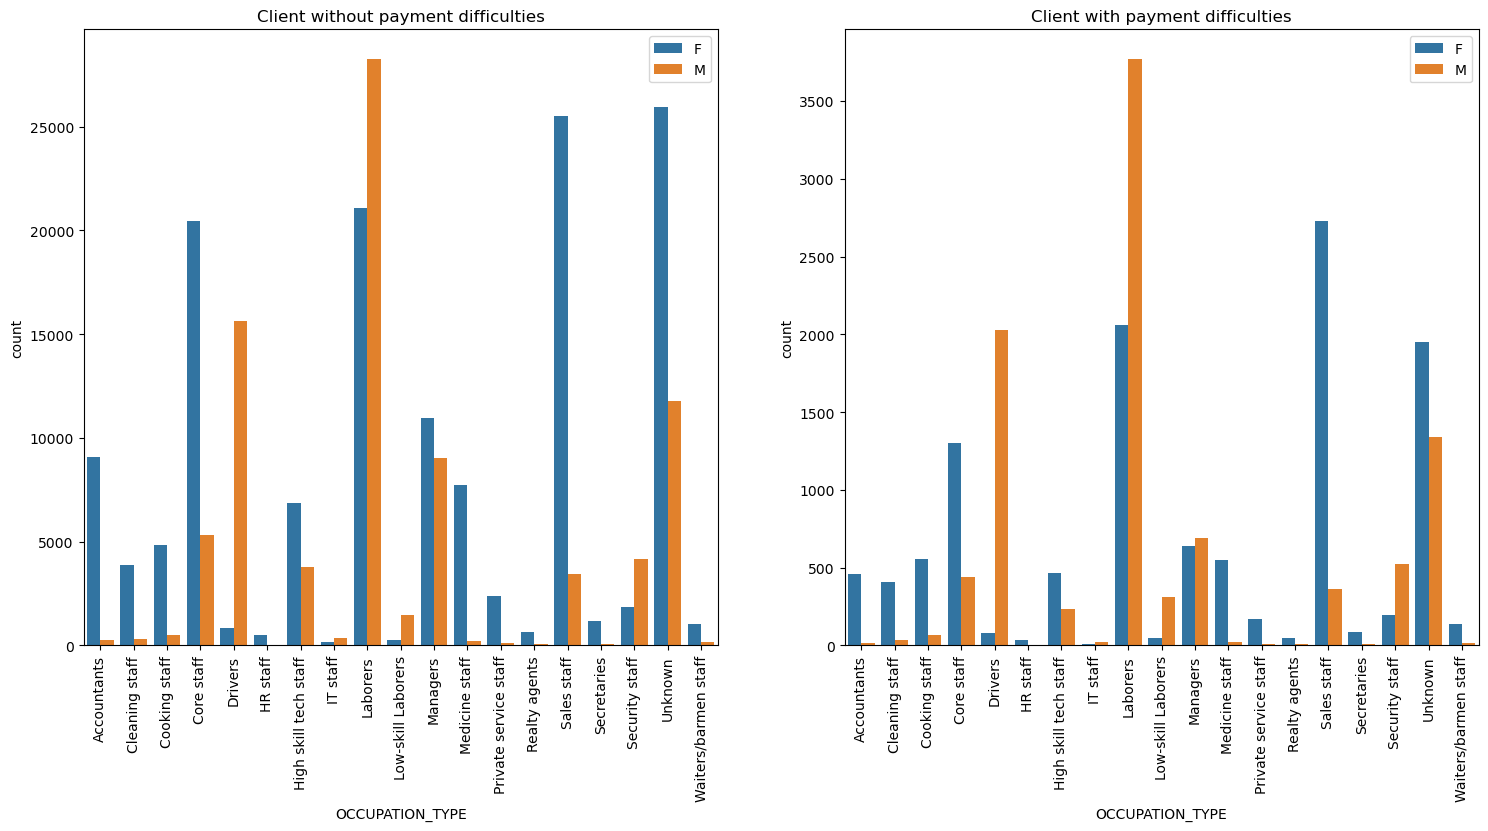

In [472]:
##plot distribution for 'OCCUPATION_TYPE' vs 'CODE_GENDER'
plot_categorical_categorical('OCCUPATION_TYPE','CODE_GENDER')

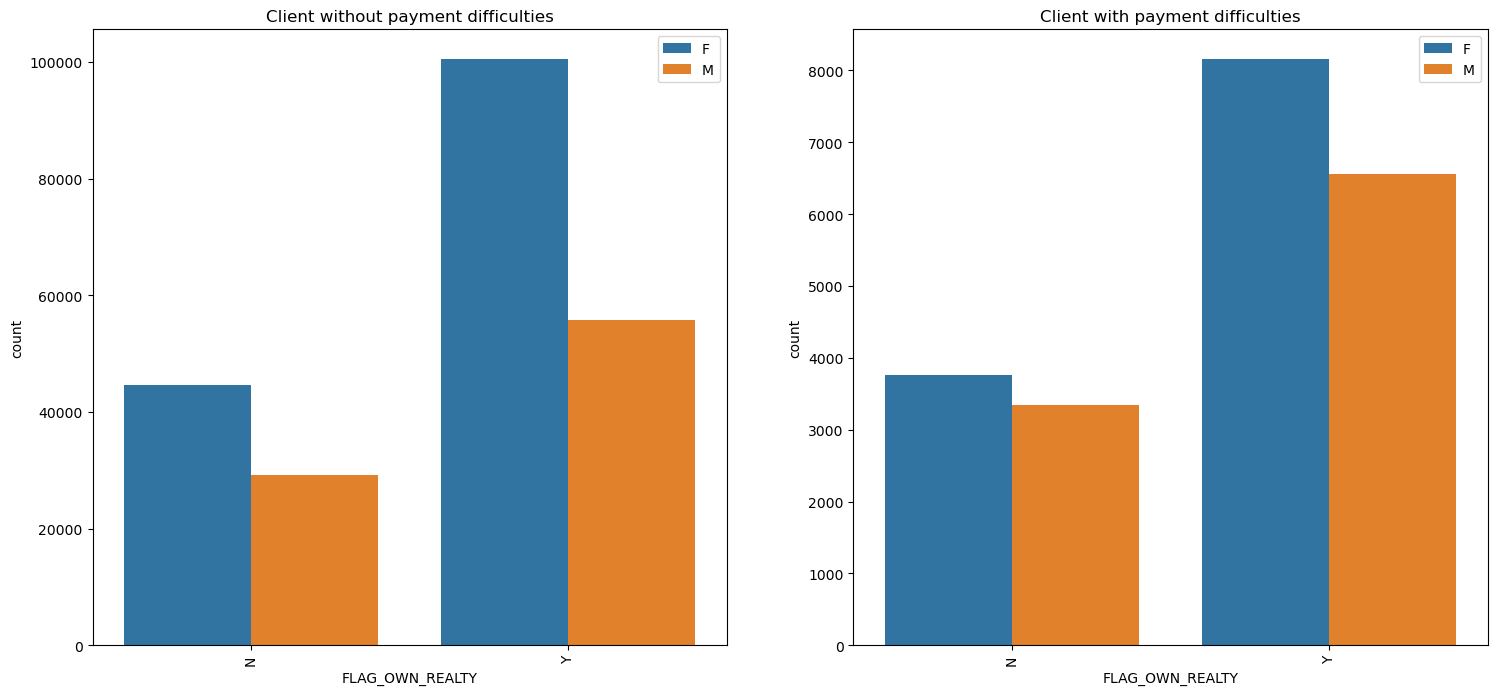

In [473]:
##plot distribution for 'FLAG_OWN_REALTY' vs 'CODE_GENDER'
plot_categorical_categorical('FLAG_OWN_REALTY','CODE_GENDER')

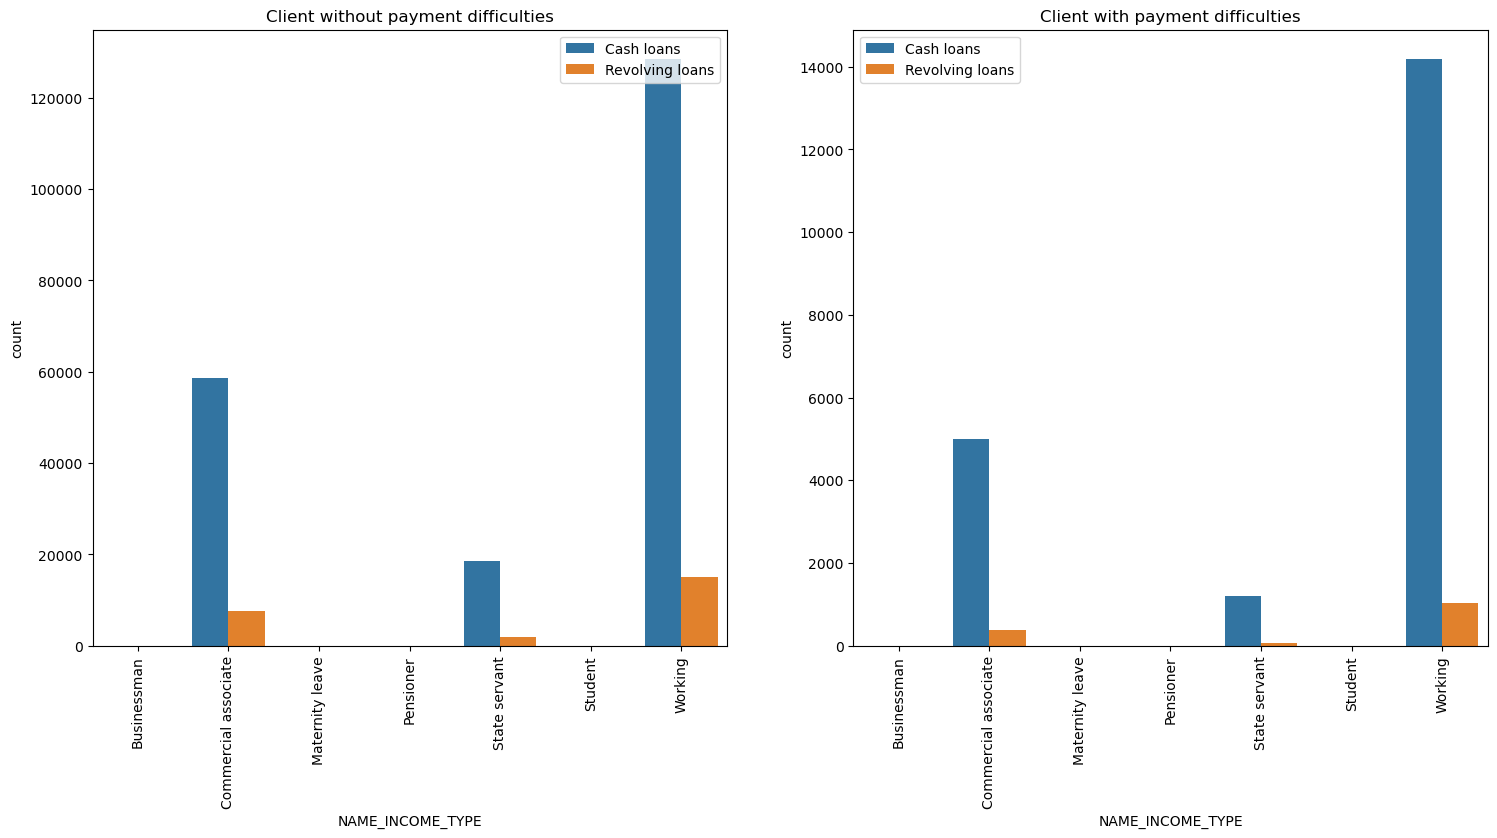

In [474]:
##plot distribution for 'NAME_INCOME_TYPE' vs 'NAME_CONTRACT_TYPE'
plot_categorical_categorical('NAME_INCOME_TYPE','NAME_CONTRACT_TYPE')

In [475]:
## Now we will merge the data from previous application data and application data

In [476]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  FLAG_LAST_APPL_PER_CONTRACT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE  \
0                           Y             Approved         Repeater   
1                           Y             Approved         Repeater   
2                           Y             Approved         Repeater   
3                           Y             Approved         Repeater   
4                           Y              Refused         Repeater   

   YEARS_DECISION  
0        0.200000  
1        0.449315  
2        0.824658  
3        1.402740  
4        2.139726

In [477]:
app_data_3.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002      1         Cash loans           M            N   
1      100003      0         Cash loans           F            N   
2      100004      0    Revolving loans           M            Y   
3      100006      0         Cash loans           F            N   
4      100007      0         Cash loans           M            N   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y            0          202500.0    406597.5      24700.5   
1               N            0          270000.0   1293502.5      35698.5   
2               Y            0           67500.0    135000.0       6750.0   
3               Y            0          135000.0    312682.5      29686.5   
4               Y            0          121500.0    513000.0      21865.5   

   ...  DAYS_REGISTRATION DAYS_ID_PUBLISH FLAG_MOBIL OCCUPATION_TYPE  \
0  ...               3648            2120          1        Laborers   
1  ...               1186             291          1      Core staff   
2  ...               4260            2531          1        Laborers   
3  ...               9833            2437          1        Laborers   
4  ...               4311            3458          1      Core staff   

  CNT_FAM_MEMBERS  ORGANIZATION_TYPE  EXT_SOURCE_2 EXT_SOURCE_3 YEARS_BIRTH  \
0             1.0    Business Entity      0.262949     0.139376          25   
1             2.0             School      0.622246          NaN          45   
2             1.0         Government      0.555912     0.729567          52   
3             2.0    Business Entity      0.650442          NaN          52   
4             1.0           Religion      0.322738          NaN          54   

  YEARS_EMPLOYED  
0              1  
1              3  
2              0  
3              8  
4              8  

[5 rows x 25 columns]

In [478]:
## SK_ID_CURR' is common column between Application data and Previous Application data , 
## so we will merge it and perform further analysis on the combined Dataframe

In [479]:

Merge_Df = pd.merge(left=pre_app, right=app_data_3,how='inner',
                    on='SK_ID_CURR',suffixes=['_PREV','_CURR'])

In [480]:
Merge_Df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE_PREV  AMT_APPLICATION  \
0     2030495      271877          Consumer loans          17145.0   
1     1696966      271877          Consumer loans        1800000.0   
2     2154916      271877          Consumer loans         108400.5   
3     2802425      108129              Cash loans         607500.0   
4     1536272      108129              Cash loans         450000.0   

   AMT_CREDIT_PREV FLAG_LAST_APPL_PER_CONTRACT NAME_CONTRACT_STATUS  \
0          17145.0                           Y             Approved   
1        1754721.0                           Y              Refused   
2         119848.5                           Y             Approved   
3         679671.0                           Y             Approved   
4         512370.0                           Y             Approved   

  NAME_CLIENT_TYPE  YEARS_DECISION TARGET  ... DAYS_REGISTRATION  \
0         Repeater        0.200000      0  ...              8447   
1         Repeater        1.293151      0  ...              8447   
2              New        1.501370      0  ...              8447   
3         Repeater        0.449315      0  ...              5455   
4         Repeater        1.410959      0  ...              5455   

  DAYS_ID_PUBLISH FLAG_MOBIL        OCCUPATION_TYPE CNT_FAM_MEMBERS  \
0            4120          1                Unknown             3.0   
1            4120          1                Unknown             3.0   
2            4120          1                Unknown             3.0   
3            4263          1  Private service staff             2.0   
4            4263          1  Private service staff             2.0   

   ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BIRTH YEARS_EMPLOYED  
0           Military      0.683797           NaN           39             20  
1           Military      0.683797           NaN           39             20  
2           Military      0.683797           NaN           39             20  
3      Self-employed      0.663524           NaN           58              3  
4      Self-employed      0.663524           NaN           58              3  

[5 rows x 33 columns]

In [481]:
Merge_Df.shape

(881416, 33)

In [482]:
##now devide the merge dateframe into two dataframes
  ##1) Merge_Df_target_1: Target variable=1
  ##2) Merge_Df_target_0: Target variable=0

In [483]:
##create two dataframes for further analysis
Merge_Df_target_0=Merge_Df[Merge_Df['TARGET']==0]
Merge_Df_target_1=Merge_Df[Merge_Df['TARGET']==1]

In [484]:
Merge_Df_target_0.shape

(802081, 33)

In [485]:
Merge_Df_target_1.shape

(79335, 33)

In [486]:
## Distributions for 'NAME_CONTRACT_STATUS' and 'NAME_CONTRACT_TYPE_PREV'

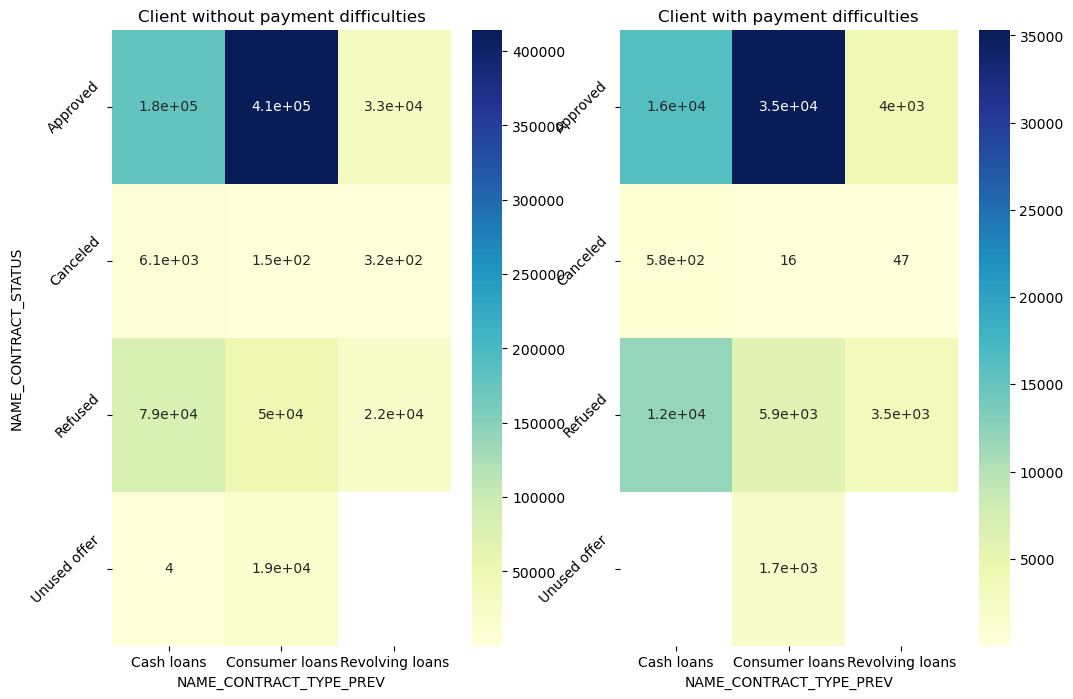

In [487]:
### Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'NAME_CONTRACT_TYPE_PREV'      
plt.figure(figsize=(12,8)) 

plt.subplot(1,2,1)
contract_type_wise_contarct_type = Merge_Df_target_0.groupby(['NAME_CONTRACT_STATUS'])['NAME_CONTRACT_TYPE_PREV'].value_counts().unstack()
sns.heatmap(data=contract_type_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client without payment difficulties')
plt.yticks(rotation=45)

plt.subplot(1,2,2)
contract_type_wise_contarct_type = Merge_Df_target_1.groupby(['NAME_CONTRACT_STATUS'])['NAME_CONTRACT_TYPE_PREV'].value_counts().unstack()
sns.heatmap(data=contract_type_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client with payment difficulties')
plt.yticks(rotation=45)
plt.ylabel('')
plt.show()

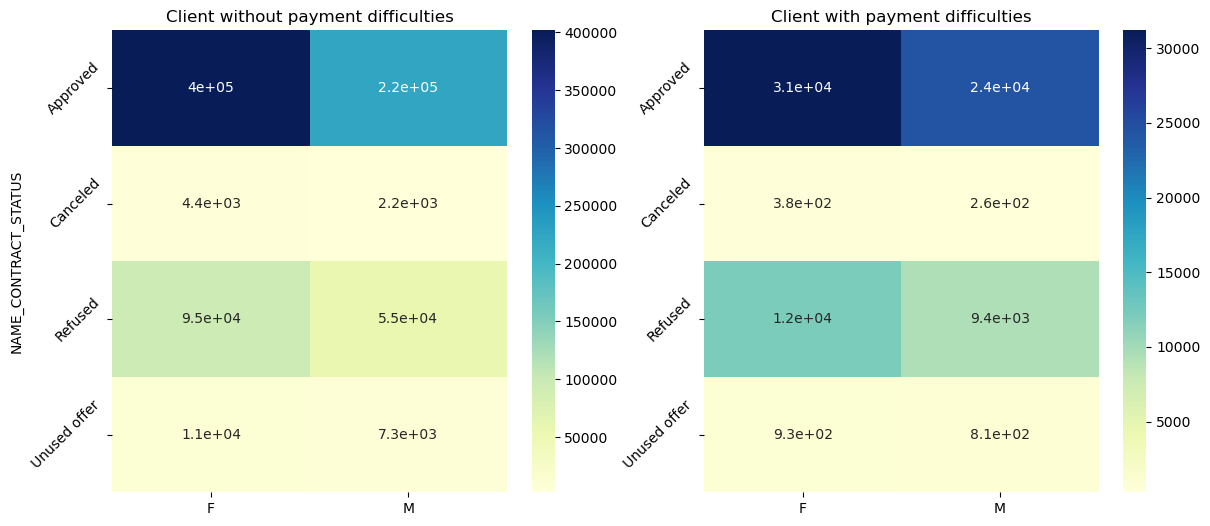

In [488]:
###Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'CODE_GENDER'      
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
income_wise_contarct_type = Merge_Df_target_0.groupby(['NAME_CONTRACT_STATUS'])['CODE_GENDER'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client without payment difficulties')
plt.yticks(rotation=45)

plt.subplot(1,2,2)
income_wise_contarct_type = Merge_Df_target_1.groupby(['NAME_CONTRACT_STATUS'])['CODE_GENDER'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client with payment difficulties')
plt.yticks(rotation=45)
plt.ylabel('')
plt.show()

In [489]:
## Observations from above Distribution
  ##Number of female clients is more who Refused loans as compared to male clients for 'Clients with payment difficulities'
   ##There is very less difference between male and female clients with approved loan for 'Clients with payment difficulities'

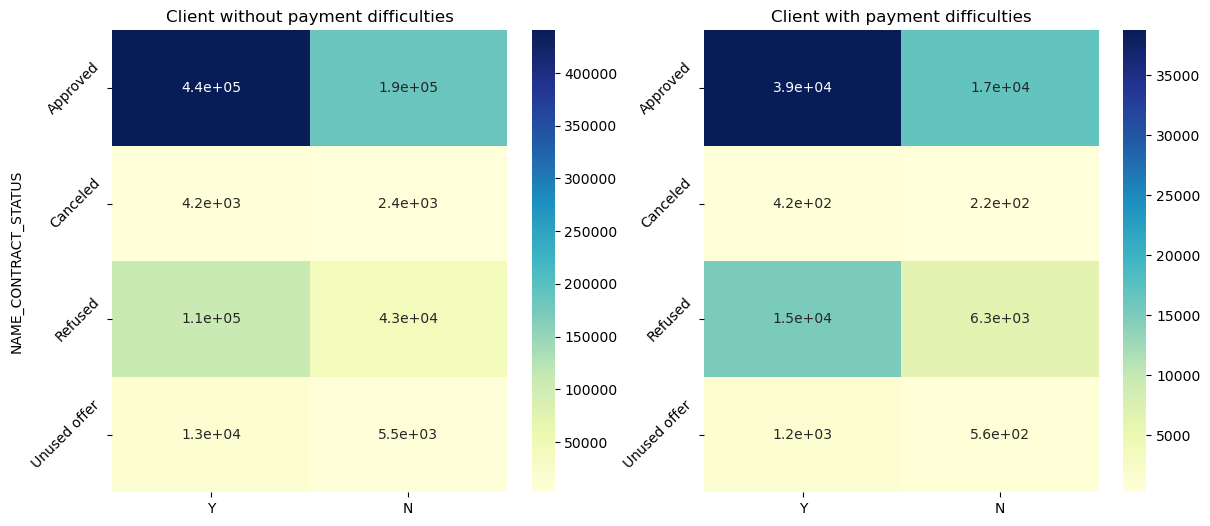

In [490]:
###Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'FLAG_OWN_REALTY'      
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
income_wise_contarct_type = Merge_Df_target_0.groupby(['NAME_CONTRACT_STATUS'])['FLAG_OWN_REALTY'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client without payment difficulties')
#plt.xticks(rotation=90)
plt.yticks(rotation=45)

plt.subplot(1,2,2)
income_wise_contarct_type = Merge_Df_target_1.groupby(['NAME_CONTRACT_STATUS'])['FLAG_OWN_REALTY'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client with payment difficulties')
#plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.ylabel('')
plt.show()

In [491]:
## Observations from above Distribution
  #Number of clients are more who owns a car and refused loans than the clients who does not owns a car
    ##Range of Clients without difficulities is more then clients with payment difficulities

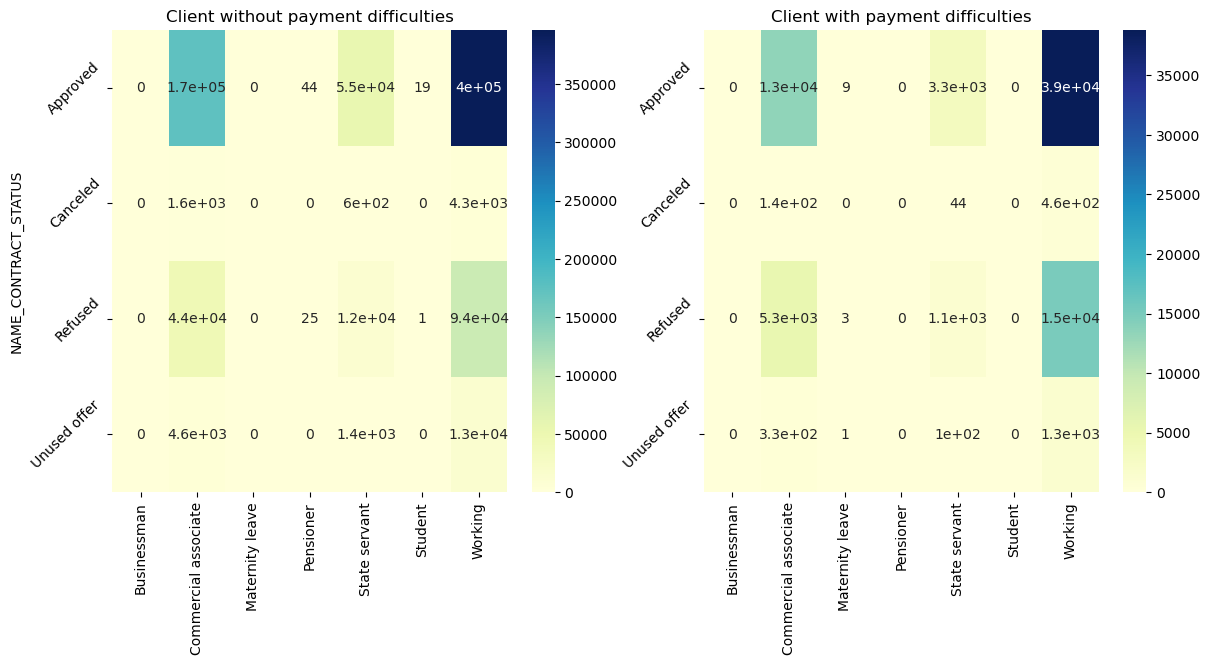

In [492]:
###Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'NAME_INCOME_TYPE'      
plt.figure(figsize=(14,6)) 

plt.subplot(1,2,1)
income_wise_contarct_type = Merge_Df_target_0.groupby(['NAME_CONTRACT_STATUS'])['NAME_INCOME_TYPE'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client without payment difficulties')
#plt.xticks(rotation=90)
plt.yticks(rotation=45)

plt.subplot(1,2,2)
income_wise_contarct_type = Merge_Df_target_1.groupby(['NAME_CONTRACT_STATUS'])['NAME_INCOME_TYPE'].value_counts().unstack()
sns.heatmap(data=income_wise_contarct_type, annot=True, cmap='YlGnBu')
plt.title('Client with payment difficulties')
#plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.ylabel('')
plt.show()



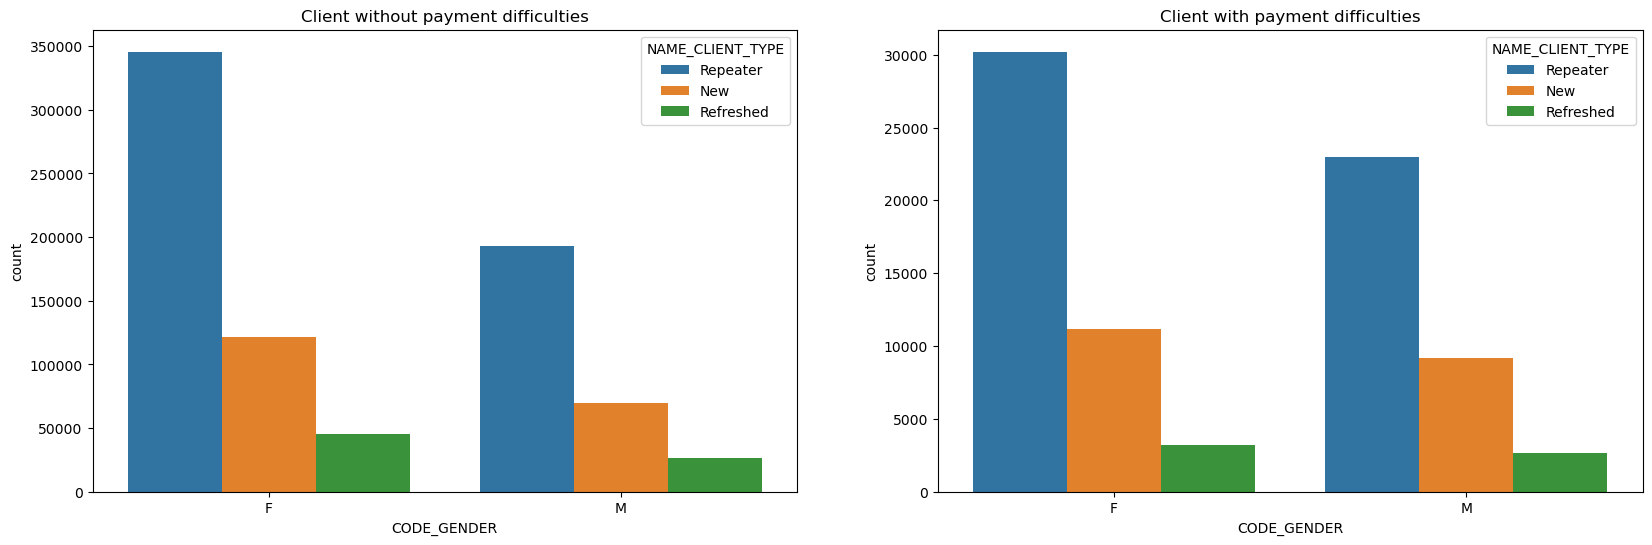

In [493]:
###Plot the graphs of Distribution of 'NAME_CLIENT_TYPE' with 'CODE_GENDER'
plt.figure(figsize=(20,6)) 

plt.subplot(1,2,1)
sns.countplot(data=Merge_Df_target_0,x='CODE_GENDER',hue='NAME_CLIENT_TYPE')
plt.title('Client without payment difficulties')

plt.subplot(1,2,2)
sns.countplot(data=Merge_Df_target_1,x='CODE_GENDER',hue='NAME_CLIENT_TYPE')
plt.title('Client with payment difficulties');


In [494]:
##Observation of above Distribution
 ##Repeater Female clients are heights among the data for Clients without payment difficulities
  ##Number of new clients is very less for both female and male categories in Clients without payment difficulities
 ##In Clients with payment difficulities, number of Repeater clients is heighest for both male and female category
 ##Number of Male and Female Refreshed clients is very less for Clients with payment difficulities as comparted to New and Repeater clients

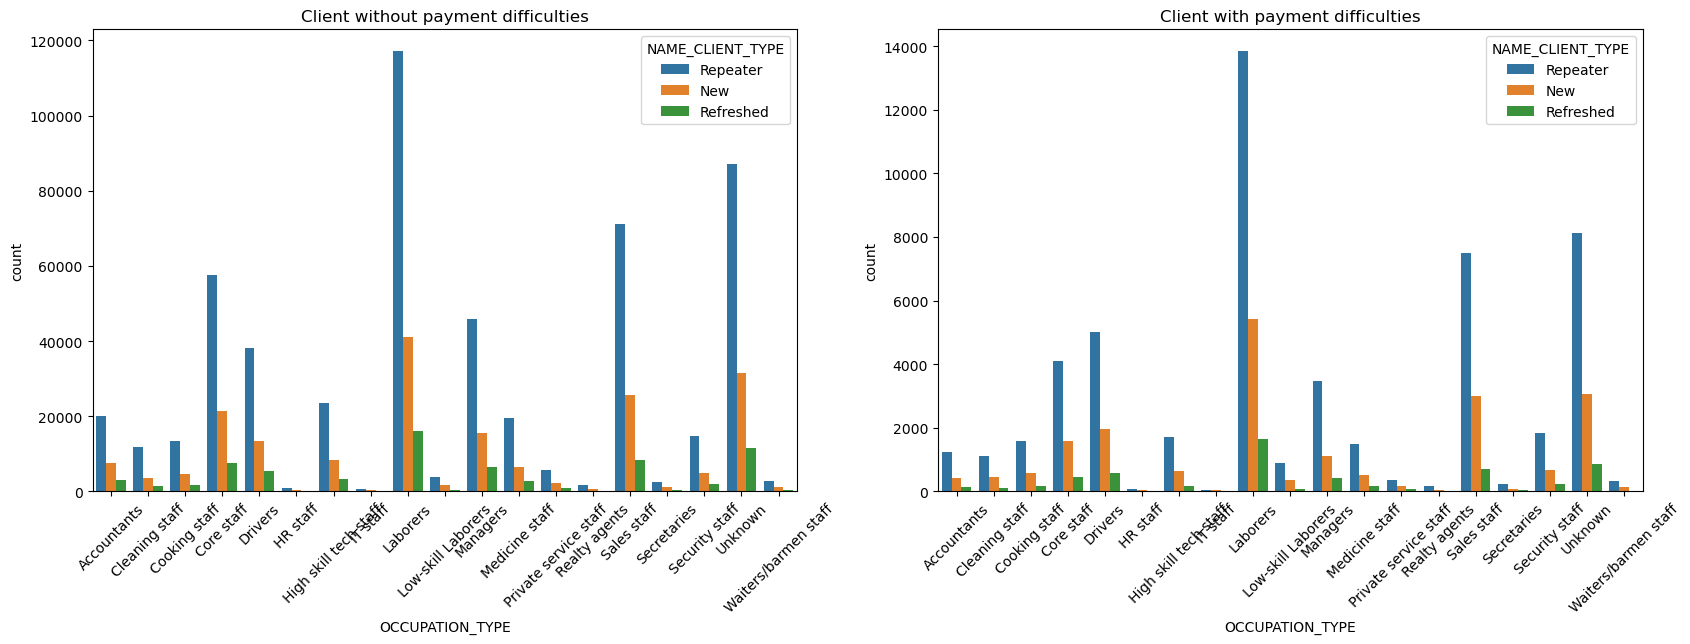

In [495]:
##Plot the distribution of OCCUPATION_TYPE and NAME_CLIENT_TYPE
plt.figure(figsize=(20,6)) 

plt.subplot(1,2,1)
sns.countplot(data=Merge_Df_target_0,x='OCCUPATION_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(data=Merge_Df_target_1,x='OCCUPATION_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=45)

plt.show()

In [496]:
##Observation of above Distribution
 ##Number of Repeated clients is more in every category for Clients with payment difficulities and Clients without Payment difficulities
 ##Very few clients are available in category HR staff, IT staff, Reality agents for Clients with payment difficulities and Clients without Payment difficulities
 ##More number of Repeater clients are facing payment difficulities as compared with New and Refreshed clients
 ##Number of New clients facing payment difficulities is more than Refreshed clients

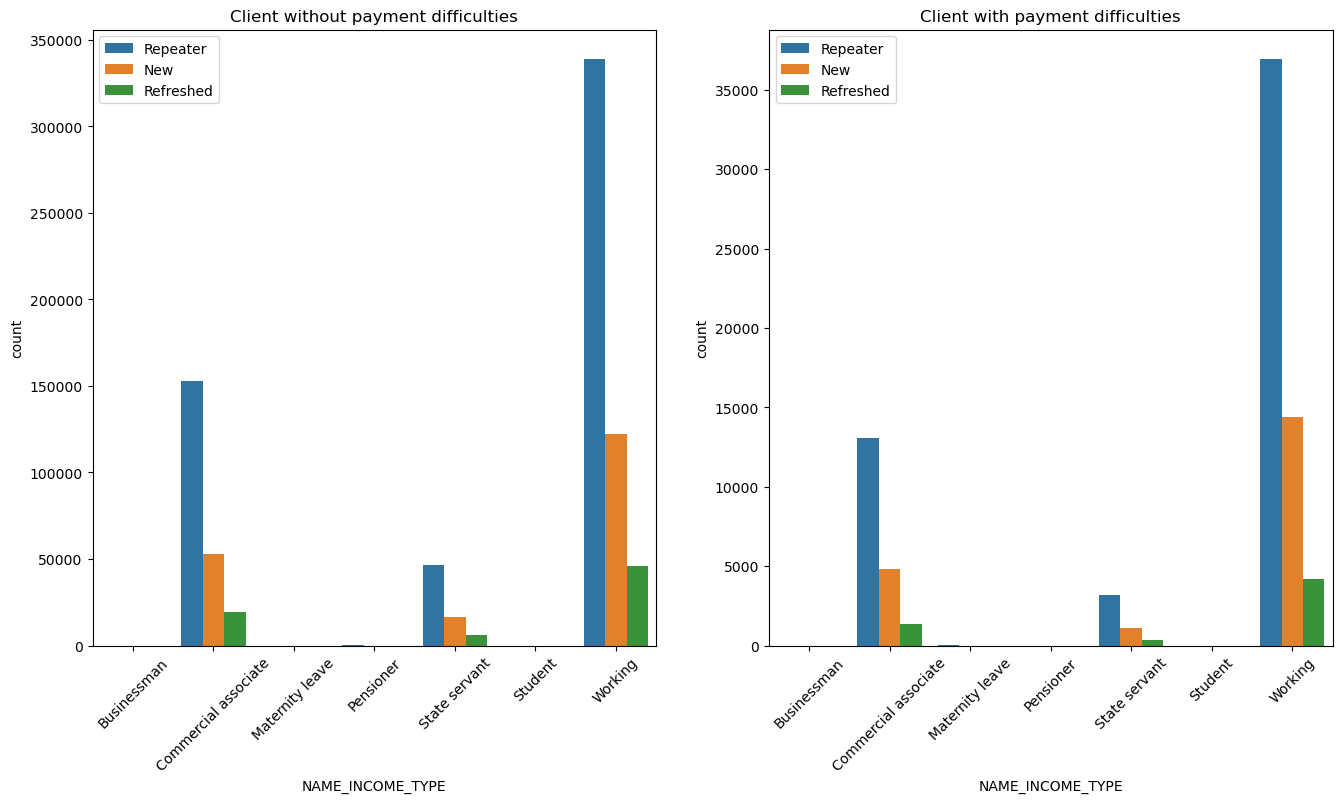

In [497]:
##Plot Distribution of 'NAME_CLIENT_TYPE' with 'NAME_INCOME_TYPE'
plt.figure(figsize=(16,8)) 

plt.subplot(1,2,1)
sns.countplot(data=Merge_Df_target_0,x='NAME_INCOME_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=45)
plt.legend(loc=2)

plt.subplot(1,2,2)
sns.countplot(data=Merge_Df_target_1,x='NAME_INCOME_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=45)
plt.legend(loc=2)

plt.show()

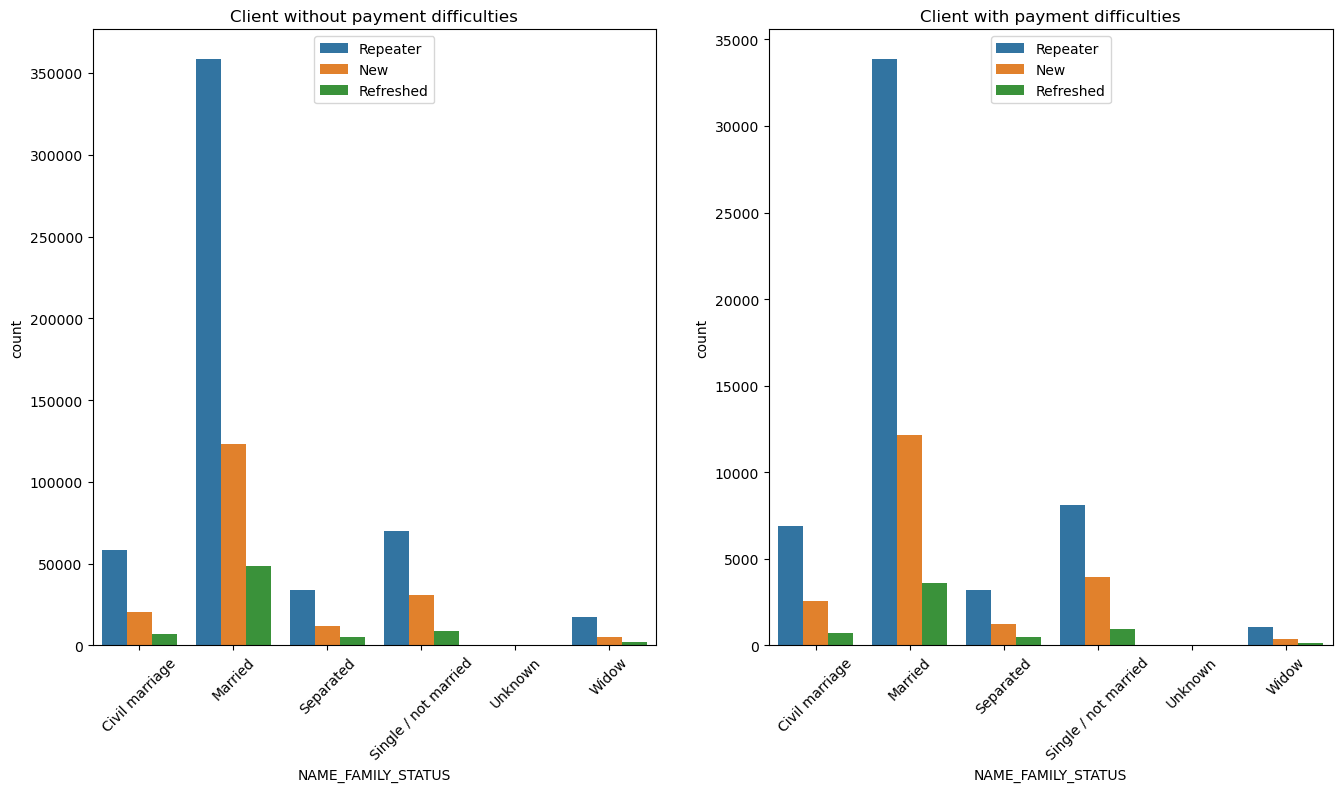

In [498]:
##Plot Distribution of 'NAME_CLIENT_TYPE' with 'NAME_FAMILY_STATUS'
plt.figure(figsize=(16,8)) 

plt.subplot(1,2,1)
sns.countplot(data=Merge_Df_target_0,x='NAME_FAMILY_STATUS',hue='NAME_CLIENT_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=45)
plt.legend(loc='best')

plt.subplot(1,2,2)
sns.countplot(data=Merge_Df_target_1,x='NAME_FAMILY_STATUS',hue='NAME_CLIENT_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

In [499]:
## Observation From above Distribution
 ## Married clients are heighest among the all categories
   ## Widow Clients are lowest among all categories


In [500]:
#Overall Analysis Conclusion :
  ###Occupation type such as IT staff , HR staff , Managers etc have lower difficulty in repayment when observed in comparison to drivers, Cleaning staff ,laborers
###To increases the chances of repaying the loan provided by the companies should less focus on the clients having income type as Working
  ###In general more number of Cash loans are provided by bank in comparison to Revolving loan post chances to get defaulted increases
  ###People with higher education and older people default less
  ###Higher amount of income, less default
  ###Loans which previously refused or cancelled, high chance of default
  ###Giving loan to married people rather than single or widow if safer
